**1. Upload the dataset and drop unnecessary columns**

In [1]:
import pandas as pd

# Specify the file path where the CSV file is located
csv_file_path = "Data/youtube_comments.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df

Search     video_id                  comment_id  \
0           iPhone  pV0ud2B8WfQ  UgwuZ0IvcR2eBzmPwax4AaABAg   
1           iPhone  pV0ud2B8WfQ  UgzguuMuaAx24szlaAp4AaABAg   
2           iPhone  pV0ud2B8WfQ  UgyGaqW4zXg9OvvN9014AaABAg   
3           iPhone  pV0ud2B8WfQ  UgzbV3ptoU69pXWsJ-V4AaABAg   
4           iPhone  pV0ud2B8WfQ  Ugx7_-E4N4MVG3oN2q14AaABAg   
...            ...          ...                         ...   
43351  Apple Watch  bFaukZe0uSk  UgzxwmoinS3v_MgBO_N4AaABAg   
43352  Apple Watch  bFaukZe0uSk  UgyjJEN7VwJ-6IB19Qd4AaABAg   
43353  Apple Watch  bFaukZe0uSk  Ugzc_FkNY7JXKz6nmPF4AaABAg   
43354  Apple Watch  bFaukZe0uSk  Ugx6ruHzlpjb6UEBeGB4AaABAg   
43355  Apple Watch  bFaukZe0uSk  UgwbNkzJnwK5-xvrkKF4AaABAg   

                                                    text  \
0                        iPhone 4s was the perfect size.   
1      I went from the iPhone 3GS to 4 to 4S to 5 to ...   
2      Beginning 0:01\niPhone 0:02\niPhone 3G 0:13\ni...   
3      My evolution of owning an iPhone \n3Gs\n4s\n5s...   
4      Every iPhone: Our subtitles are revolations!\n...   
...                                                  ...   
43351  Many of us are comfortable with Android phones...   
43352  I went with the Apple Watch Ultra mainly for t...   
43353  Just buy last year Apple Watch Series 7. Skip ...   
43354  Does de Apple Watch Ultra will be compatible w...   
43355  I'm glad I got the SE 1, the SE 2 doesn't seem...   

                                   author                  date  like_count  \
0                             Carlos Vega  2023-11-07T04:49:36Z           0   
1                                    user  2023-11-06T22:33:16Z           0   
2                               iPhone 5s  2023-11-06T00:48:43Z           1   
3                              Sunshine19  2023-10-29T22:29:27Z           0   
4      J-D Flash Studios { Discontinued }  2023-10-29T14:14:16Z           0   
...                                   ...                   ...         ...   
43351                        Anish Thomas  2022-09-14T14:57:52Z          10   
43352                                  BP  2022-09-14T14:20:49Z          84   
43353                        Csaba Teplan  2022-09-14T14:19:26Z           0   
43354                   antonio caballero  2022-09-14T14:15:03Z           0   
43355                            Apple Pi  2022-09-14T14:14:03Z          17   

       reply_count  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
43351            0  
43352            7  
43353            3  
43354            1  
43355            3  

[43356 rows x 8 columns]

In [3]:
df.rename(columns={'text': 'Comment_Body', 'date': 'Date', 'author': 'Author'}, inplace=True)
df.drop(['video_id', 'comment_id'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43356 entries, 0 to 43355
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Search        43356 non-null  object
 1   Comment_Body  43356 non-null  object
 2   Author        43349 non-null  object
 3   Date          43356 non-null  object
 4   like_count    43356 non-null  int64 
 5   reply_count   43356 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


**2. Adjust the type of the columns**

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43356 entries, 0 to 43355
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Search        43356 non-null  object             
 1   Comment_Body  43356 non-null  object             
 2   Author        43349 non-null  object             
 3   Date          43356 non-null  datetime64[ns, UTC]
 4   like_count    43356 non-null  int64              
 5   reply_count   43356 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 2.0+ MB


**3. Check the duplicates**

In [6]:
df = df.drop_duplicates()
df


Search                                       Comment_Body  \
0           iPhone                    iPhone 4s was the perfect size.   
1           iPhone  I went from the iPhone 3GS to 4 to 4S to 5 to ...   
2           iPhone  Beginning 0:01\niPhone 0:02\niPhone 3G 0:13\ni...   
3           iPhone  My evolution of owning an iPhone \n3Gs\n4s\n5s...   
4           iPhone  Every iPhone: Our subtitles are revolations!\n...   
...            ...                                                ...   
43351  Apple Watch  Many of us are comfortable with Android phones...   
43352  Apple Watch  I went with the Apple Watch Ultra mainly for t...   
43353  Apple Watch  Just buy last year Apple Watch Series 7. Skip ...   
43354  Apple Watch  Does de Apple Watch Ultra will be compatible w...   
43355  Apple Watch  I'm glad I got the SE 1, the SE 2 doesn't seem...   

                                   Author                      Date  \
0                             Carlos Vega 2023-11-07 04:49:36+00:00   
1                                    user 2023-11-06 22:33:16+00:00   
2                               iPhone 5s 2023-11-06 00:48:43+00:00   
3                              Sunshine19 2023-10-29 22:29:27+00:00   
4      J-D Flash Studios { Discontinued } 2023-10-29 14:14:16+00:00   
...                                   ...                       ...   
43351                        Anish Thomas 2022-09-14 14:57:52+00:00   
43352                                  BP 2022-09-14 14:20:49+00:00   
43353                        Csaba Teplan 2022-09-14 14:19:26+00:00   
43354                   antonio caballero 2022-09-14 14:15:03+00:00   
43355                            Apple Pi 2022-09-14 14:14:03+00:00   

       like_count  reply_count  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0  
...           ...          ...  
43351          10            0  
43352          84            7  
43353           0            3  
43354           0            1  
43355          17            3  

[43356 rows x 6 columns]

**4. Filter out the unrelated comments**

In [7]:
df.Search.value_counts()

iPad           16960
iPhone         15984
Macbook         4779
AirPods         2845
Apple Watch     2788
Name: Search, dtype: int64

In [8]:
df = df[~((df['Search'] == 'iPhone') & (~df['Comment_Body'].str.contains('iPhone', na=False, case=False))) | (df['Search'] != 'iPhone')]
df = df[~((df['Search'] == 'Apple Watch') & (~df['Comment_Body'].str.contains('Apple Watch', na=False, case=False))) | (df['Search'] != 'Apple Watch')]
df = df[~((df['Search'] == 'iPad') & (~df['Comment_Body'].str.contains('iPad', na=False, case=False))) | (df['Search'] != 'iPad')]
df = df[~((df['Search'] == 'AirPods') & (~df['Comment_Body'].str.contains('AirPods', na=False, case=False))) | (df['Search'] != 'AirPods')]
df = df[~((df['Search'] == 'Macbook') & (~df['Comment_Body'].str.contains('Macbook', na=False, case=False))) | (df['Search'] != 'Macbook')]
df.Search.value_counts()


iPad           16960
iPhone         15984
Macbook         4779
AirPods         2845
Apple Watch     2788
Name: Search, dtype: int64

**5. Anonymize the comments**

In [9]:
df = df.drop('Author', axis=1)
df


Search                                       Comment_Body  \
0           iPhone                    iPhone 4s was the perfect size.   
1           iPhone  I went from the iPhone 3GS to 4 to 4S to 5 to ...   
2           iPhone  Beginning 0:01\niPhone 0:02\niPhone 3G 0:13\ni...   
3           iPhone  My evolution of owning an iPhone \n3Gs\n4s\n5s...   
4           iPhone  Every iPhone: Our subtitles are revolations!\n...   
...            ...                                                ...   
43351  Apple Watch  Many of us are comfortable with Android phones...   
43352  Apple Watch  I went with the Apple Watch Ultra mainly for t...   
43353  Apple Watch  Just buy last year Apple Watch Series 7. Skip ...   
43354  Apple Watch  Does de Apple Watch Ultra will be compatible w...   
43355  Apple Watch  I'm glad I got the SE 1, the SE 2 doesn't seem...   

                           Date  like_count  reply_count  
0     2023-11-07 04:49:36+00:00           0            0  
1     2023-11-06 22:33:16+00:00           0            0  
2     2023-11-06 00:48:43+00:00           1            0  
3     2023-10-29 22:29:27+00:00           0            0  
4     2023-10-29 14:14:16+00:00           0            0  
...                         ...         ...          ...  
43351 2022-09-14 14:57:52+00:00          10            0  
43352 2022-09-14 14:20:49+00:00          84            7  
43353 2022-09-14 14:19:26+00:00           0            3  
43354 2022-09-14 14:15:03+00:00           0            1  
43355 2022-09-14 14:14:03+00:00          17            3  

[43356 rows x 5 columns]

**6. Detect the language**

In [69]:
from langdetect import detect

def detect_language(comment):
    try:
        return detect(comment)
    except:
        return None

df['Language'] = df['Comment_Body'].apply(detect_language)
df['Language'].value_counts()

en       35327
ru        1463
pt        1405
id        1214
de         888
es         467
nl         287
tl         275
it         229
et         224
fr         211
af         162
so         141
sw         121
cy         104
hr          95
no          91
sl          84
bg          72
ca          60
da          51
uk          44
pl          38
sv          37
sk          34
tr          30
mk          25
hi          24
fi          22
sq          22
lv          19
ro          18
vi          16
th          15
lt           8
hu           6
ja           6
ko           4
cs           4
zh-cn        3
ar           1
ml           1
zh-tw        1
Name: Language, dtype: int64

In [70]:
df[df['Language']=='ar']

Search                                       Comment_Body  \
10487  iPhone  أتمنى أني أجدك يوما ما و أنت في المتجر و تلعبي...   

                           Date  like_count  reply_count Language  
10487 2023-11-05 11:07:37+00:00           0            0       ar

In [71]:
df[df['Language']=='ml']


Search                                       Comment_Body  \
35190   iPad  20 രൂപ കൊടുത്തു നോട്ട് ബുക്ക്‌ വാങ്ങുമോ അതോ ഒന...   

                           Date  like_count  reply_count Language  
35190 2021-11-24 10:20:43+00:00           0            0       ml

In [72]:
df[df['Language']=='ko']


Search                                       Comment_Body  \
18840     iPad                                     🎉🎉🎉🎉🎉🎉🎉ipad 好聽   
24178     iPad  나는 당신과 같은 iPad를 갖고 싶습니다 아름다워 😭😭💖💖💖🫶\n나는 보라색을 좋...   
40067  Macbook                  不懂為什麼蘋果macbook換晶片的速度要這麼快？ 庫存都清完了？   
40071  Macbook  拿 intel 出來 比較絕對不是講廢話，像我還在用 2015 macbook pro 的人...   

                           Date  like_count  reply_count Language  
18840 2023-05-07 06:06:46+00:00           0            0       ko  
24178 2022-12-27 18:12:51+00:00           0            0       ko  
40067 2023-11-01 09:47:22+00:00           1            0       ko  
40071 2023-10-31 07:34:39+00:00           3            2       ko

In [73]:
df[df['Language']=='zh-tw']


Search                                   Comment_Body  \
40073  Macbook  我覺得鞭一下intel時代的產品我很有感阿\n我就拿到19年的MacBook\n超想換的😂   

                           Date  like_count  reply_count Language  
40073 2023-10-31 04:56:37+00:00           7            5    zh-tw

In [74]:
df[df['Language']=='zh-cn']


Search                                       Comment_Body  \
28244         iPad  iPad 应该不可以用。因为当温度很高的时候，ipad是会出故障的。但是汽车工厂里面的生产的...   
40068      Macbook  哈哈！我猜对了！先前我就说不会有M3 的macbook air (估计iPad Air 也不...   
43332  Apple Watch  是的，s7比s8更有性价比。如果对apple watch的设计感觉到厌倦并且追求更好的电池续...   

                           Date  like_count  reply_count Language  
28244 2023-11-02 04:07:58+00:00           0            0    zh-cn  
40068 2023-10-31 15:22:33+00:00           1            0    zh-cn  
43332 2022-09-15 13:52:49+00:00           1            0    zh-cn

In [75]:
df[df['Language']=='hu']


Search                                       Comment_Body  \
9154   iPhone                              Regálame ese iPhone 😊   
12144  iPhone      O meu deu isso várias vezes kkkkkkk iPhone 13   
12193  iPhone              dps falam q iphone é melhor kkkkkkkkk   
24970    iPad  YOU ARE A MOTHERF**KING IPAD KILLER\n\n\n\n\n\...   
28249    iPad  Sajnos megvettem az ipad pro t, de nincs benne...   
31188    iPad  I want the ipad pleazzzzzzzzzzzzzzzzzzzzzzzzzz...   

                           Date  like_count  reply_count Language  
9154  2023-09-19 15:01:06+00:00           0            0       hu  
12144 2023-10-19 22:46:29+00:00           0            0       hu  
12193 2023-10-17 16:23:31+00:00           0            0       hu  
24970 2022-11-26 23:54:43+00:00           0            1       hu  
28249 2023-11-01 15:23:13+00:00           0            0       hu  
31188 2023-09-19 10:37:55+00:00           0            0       hu

In [76]:
df.loc[df['Comment_Body'].str.contains('O meu deu isso várias vezes kkkkkkk iPhone 13'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('dps falam q iphone é melhor kkkkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('teri ek copy kho gai fat gai gili ho gai to'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Macbook A1342: am I joke for you'), 'Language'] = 'en'
df[df['Language']=='hu']


Search                                       Comment_Body  \
9154   iPhone                              Regálame ese iPhone 😊   
24970    iPad  YOU ARE A MOTHERF**KING IPAD KILLER\n\n\n\n\n\...   
28249    iPad  Sajnos megvettem az ipad pro t, de nincs benne...   
31188    iPad  I want the ipad pleazzzzzzzzzzzzzzzzzzzzzzzzzz...   

                           Date  like_count  reply_count Language  
9154  2023-09-19 15:01:06+00:00           0            0       hu  
24970 2022-11-26 23:54:43+00:00           0            1       hu  
28249 2023-11-01 15:23:13+00:00           0            0       hu  
31188 2023-09-19 10:37:55+00:00           0            0       hu

In [77]:
df[df['Language']=='cs']


Search                         Comment_Body                      Date  \
26704   iPad                      Sticky iPad kid 2022-11-19 02:33:13+00:00   
27846   iPad                Ipad pro m2 price plz 2023-03-13 16:04:18+00:00   
28520   iPad               Lucky you have an ipad 2023-06-09 20:17:25+00:00   
33962   iPad  1 iPad k price m 100 copy askti h 😏 2022-08-19 06:34:00+00:00   

       like_count  reply_count Language  
26704           0            0       cs  
27846           8            1       cs  
28520           1            0       cs  
33962           0            0       cs

In [78]:
df.loc[df['Comment_Body'].str.contains('Ipad pro m2 12.9'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Sticky iPad kid'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ipad pro m2 price plz'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Lucky you have an ipad'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('1 iPad k price m 100 copy askti h'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ye ipad leny k 1 lakh hona b zaroori h'), 'Language'] = 'hi'
df[df['Language']=='cs']


Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [79]:
df[df['Language']=='ja']

Search                                       Comment_Body  \
14634  iPhone   iPhone ビデオがここで行われていますインドやその他多くの iPhone を取り上げたいです   
15982  iPhone  iPhone15Pro MAXって20万?ぐらいするんですよ!?\nマジ凄すぎワロタｧｧｧｧ...   
15983  iPhone                                   iPhoneめっちゃ良いですね✨   
18852    iPad           iPadだとフルスクリーンで見れる数少ないmvの1つです\nGreat job👍   
18944    iPad                         これiPadで再生したらピッタリのサイズの動画だった   
24451    iPad                        ｖ(・ε・ｖ) ? IPad 😮🪓⛏️🗡⚔️🔨🏹🔫🪚🛠   

                           Date  like_count  reply_count Language  
14634 2023-10-16 13:54:37+00:00           1            0       ja  
15982 2023-10-15 01:10:29+00:00           3            0       ja  
15983 2023-10-14 09:53:13+00:00           6            0       ja  
18852 2022-09-27 12:33:24+00:00           5            1       ja  
18944 2022-03-13 08:41:27+00:00           0            0       ja  
24451 2023-06-25 16:30:23+00:00           0            0       ja

In [80]:
df[df['Language']=='lt']

Search                                     Comment_Body  \
11885   iPhone               Please iphone 15 gift karo kai gai   
16195  AirPods     AirPods Pro’s 3s max pro XR lite 321 minis 😂   
24545     iPad  Ipad:mini 1❌ mini 3❌ gen 4❌ air 2❌ pro 1st gen✅   
25081     iPad                                  I’m is pro iPad   
28509     iPad                                  Tantos iPads? 😮   
29213     iPad                                       IPAD mini🥰   
29917     iPad                                iPad Pro m1 12,9😊   
38973  Macbook                               macbook air m2????   

                           Date  like_count  reply_count Language  
11885 2023-10-31 10:34:28+00:00           0            1       lt  
16195 2022-11-26 10:20:57+00:00           1            0       lt  
24545 2023-05-06 10:26:02+00:00          22            0       lt  
25081 2022-11-02 20:18:24+00:00           0            0       lt  
28509 2023-06-24 14:10:01+00:00           1            0       lt  
29213 2022-12-17 05:32:51+00:00           0            0       lt  
29917 2022-12-14 02:43:58+00:00           0            0       lt  
38973 2023-04-25 15:30:35+00:00           0            0       lt

In [81]:
df.loc[df['Comment_Body'].str.contains('Samsung - trava \niPhone 15 - eu travo mais'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Please iphone 15 gift karo kai gai'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('AirPods Pros 3S Max Pro XR Lite 3 2 1 Minis V2'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ipad:mini 1❌ mini 3❌ gen 4❌ air 2❌ pro 1st gen✅'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I’m is pro iPad'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Tantos iPads?'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('IPAD mini'), 'Language'] = 'en'
df[df['Language']=='lt']


Search                                  Comment_Body  \
16195  AirPods  AirPods Pro’s 3s max pro XR lite 321 minis 😂   
29917     iPad                             iPad Pro m1 12,9😊   
38973  Macbook                            macbook air m2????   

                           Date  like_count  reply_count Language  
16195 2022-11-26 10:20:57+00:00           1            0       lt  
29917 2022-12-14 02:43:58+00:00           0            0       lt  
38973 2023-04-25 15:30:35+00:00           0            0       lt

In [82]:
df[df['Language']=='th']

Search                                       Comment_Body  \
28440         iPad  iPad รุ่น a5 มีสีชมพู😮😮😊😊แม่หนูบอกว่าเก็บเงินซ...   
42126  Apple Watch  watchOS8.3 บน aw4 ขึ้นไป ก็มี AssistiveTouch o...   
42127  Apple Watch  อยากให้ Apple Watch ดีไซน์ หน้าปัดตัวเรือน แบบ...   
42128  Apple Watch  ใช้ Apple Watch คุ้มมากค่ะเพราะสุขภาพไม่ดี ขาด...   
42129  Apple Watch  อยากฟังเรื่อง apple watch รุ่นแรกที่ net zero ...   
42130  Apple Watch  สอบถามครับถ้าเราซื้อ Apple Watch Ultra 2 แต่ไม...   
42132  Apple Watch  ถึงแม้เราจะไม่ได้เปลี่ยน Apple Watch ใหม่ทุกปี...   
42133  Apple Watch  ใช้ apple watch reries 4 stainless อยู่ อยากเป...   
42134  Apple Watch                    รอ Apple watch x เหลี่ยมแน่ 555   
42135  Apple Watch  รอ apple watch X ครบรอบ 10ปี คาดหวังต้องว้าวแน...   
42136  Apple Watch  ผมใช้สินค้า apple มาหลากหลายตัวมากๆครับ apple ...   
42137  Apple Watch                 Apple Watch 7 ก็ใช้ ดับเบิลแท็ปได้   
42138  Apple Watch  Apple Watch ultra ถ้าทำมา Outdoor จัดๆแล้วยังไ...   
42139  Apple Watch  ตอนนี้ผมยังใช้ Apple Watch 4 อยู่เลยครับ ว่าจะ...   
42140  Apple Watch  หวั่นใจว่า Apple Watch รุ่นต่อไป จะครบ10Gen หร...   

                           Date  like_count  reply_count Language  
28440 2023-10-24 15:41:02+00:00           0            0       th  
42126 2023-10-18 14:33:15+00:00           3            0       th  
42127 2023-10-18 02:56:14+00:00           1            0       th  
42128 2023-10-16 15:06:03+00:00           0            0       th  
42129 2023-10-16 14:28:30+00:00           0            0       th  
42130 2023-10-16 11:46:33+00:00           1            1       th  
42132 2023-10-16 10:43:40+00:00           6            3       th  
42133 2023-10-16 07:48:28+00:00           0            0       th  
42134 2023-10-16 07:23:00+00:00           0            0       th  
42135 2023-10-16 06:45:32+00:00           5            2       th  
42136 2023-10-16 03:27:55+00:00           4            0       th  
42137 2023-10-16 02:47:56+00:00           4            1       th  
42138 2023-10-16 02:18:57+00:00          33            1       th  
42139 2023-10-16 01:15:11+00:00           4            0       th  
42140 2023-10-16 01:11:10+00:00          28            0       th

In [83]:
df[df['Language']=='vi']

Search                                       Comment_Body  \
4394    iPhone  HI SARAH CAN YOU GIVE ME THE IPHONE XR OR 12 P...   
7599    iPhone                             PENGEN BANGET IPHONE 😢   
7797    iPhone                     IPHONE TIDAK PERLU ROG NOMOR 1   
8633    iPhone                                  iPhone XR tô safe   
9641    iPhone  IPHONE NAO TRAVA NE BANDO DE C4D3L4 QUE CURTE ...   
10538   iPhone                              PLEASE IPHONE GIVE ME   
10819   iPhone                                   那刷新率真的很iPhone 呢😂   
11652   iPhone                                     iPhone Chungus   
12499   iPhone           HI CAN YOU PLZZZZZ GIVE ME THE IPHONE 11   
14994   iPhone                    THE DOG HAS AN IPHONE TEN🎊😳😳😳😳😳   
15163   iPhone                                 NEW IPHONE ALREADY   
15357   iPhone                              BRUH IPHONE 14MAX PRO   
17556  AirPods                 HE-\nHE ACTUALLY THREW THE AIRPODS   
24541     iPad  iPad mini 6 có thêm 90 hz nữa là quá đáng mua ...   
24956     iPad                          NO NOT THE BRAND NEW IPAD   
34314     iPad  Bhai tum hi pdho IPad pe 😂hm kg wale copy khri...   

                           Date  like_count  reply_count Language  
4394  2023-11-02 15:44:44+00:00           0            0       vi  
7599  2023-08-28 04:49:17+00:00           0            0       vi  
7797  2023-08-08 12:32:38+00:00           0            0       vi  
8633  2023-08-03 23:11:50+00:00           0            0       vi  
9641  2023-10-30 13:52:29+00:00           0            0       vi  
10538 2023-06-24 10:29:39+00:00           0            1       vi  
10819 2023-10-05 06:52:27+00:00           0            0       vi  
11652 2023-06-22 14:59:33+00:00           0            0       vi  
12499 2023-11-02 15:53:06+00:00           0            0       vi  
14994 2022-10-08 11:52:52+00:00           0            0       vi  
15163 2022-09-25 16:19:21+00:00           0            0       vi  
15357 2022-09-23 06:50:30+00:00           0            0       vi  
17556 2022-06-13 21:31:28+00:00           0            0       vi  
24541 2023-05-07 07:42:24+00:00           0            0       vi  
24956 2022-11-28 22:39:30+00:00           0            0       vi  
34314 2021-12-21 11:05:10+00:00           1            0       vi

In [84]:
df.loc[df['Comment_Body'].str.contains('HI SARAH CAN YOU GIVE ME THE IPHONE XR OR'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('PENGEN BANGET IPHONE'), 'Language'] = 'id'
df.loc[df['Comment_Body'].str.contains('IPHONE TIDAK PERLU ROG NOMOR 1'), 'Language'] = 'id'
df.loc[df['Comment_Body'].str.contains('iPhone XR tô safe'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('IPHONE NAO TRAVA NE BANDO DE C4D3L4 QUE'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('PLEASE IPHONE GIVE ME'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('那刷新率真的很iPhone 呢'), 'Language'] = 'zh'
df.loc[df['Comment_Body'].str.contains('iPhone Chungus'), 'Language'] = 'sw'
df.loc[df['Comment_Body'].str.contains('IPHONE TRAVANDO?'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('HI CAN YOU PLZZZZZ GIVE ME THE IPHONE 11'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('MORE THAN MY IPHONE 11'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('THE DOG HAS AN IPHONE TEN'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('NEW IPHONE ALREADY'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('BRUH IPHONE 14MAX PRO'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('HE-\nHE ACTUALLY THREW THE AIRPODS'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('NO NOT THE BRAND NEW IPAD'), 'Language'] = 'en'
df[df['Language']=='vi']


Search                                       Comment_Body  \
24541   iPad  iPad mini 6 có thêm 90 hz nữa là quá đáng mua ...   
34314   iPad  Bhai tum hi pdho IPad pe 😂hm kg wale copy khri...   

                           Date  like_count  reply_count Language  
24541 2023-05-07 07:42:24+00:00           0            0       vi  
34314 2021-12-21 11:05:10+00:00           1            0       vi

In [85]:
df[df['Language']=='lv']

Search                                       Comment_Body  \
16268  AirPods                                        🍎 airpods ❤   
16488  AirPods                         AirPods Pro vs pulsar buds   
16682  AirPods                                     Airpods sucks!   
17060  AirPods                              Temu AirPods link pls   
17425  AirPods                         I got yoda but not airpods   
17450  AirPods          Airpods opens* beans just go not airpods*   
17500  AirPods                                   Yoda airpods sus   
17665  AirPods                                           *airpods   
18316  AirPods               Pov: Du kuckst das Video mit Airpods   
18496  AirPods  diese ironie dass ich das video mit airpods gucke   
18823  AirPods                                       *airpods 1 😂   
24377     iPad                                         😬😣😣😝 iPads   
24629     iPad                                        RIP IPads 😭   
24651     iPad                                           İpads :(   
25021     iPad                                        Rp iPads 😭😭   
28165     iPad                                  На ipad air также   
28527     iPad                             IPads iPads iPads 😣🥱😤🙄   
35015     iPad              iPad gir gaya to ram ram pura notes 😆   
35297     iPad                                 Ipad airs are junk   

                           Date  like_count  reply_count Language  
16268 2023-10-05 10:29:30+00:00           0            0       lv  
16488 2020-09-02 07:02:27+00:00           0            0       lv  
16682 2020-01-04 06:31:30+00:00           0            0       lv  
17060 2023-09-08 16:36:31+00:00           0            0       lv  
17425 2022-06-17 08:35:33+00:00           0            0       lv  
17450 2022-06-16 10:50:31+00:00           0            0       lv  
17500 2022-06-15 09:49:03+00:00           0            0       lv  
17665 2022-06-09 02:23:45+00:00           0            0       lv  
18316 2021-09-09 13:24:28+00:00           0            0       lv  
18496 2021-09-08 19:36:12+00:00           0            0       lv  
18823 2023-08-21 22:31:49+00:00           1            0       lv  
24377 2023-08-16 08:56:12+00:00           0            0       lv  
24629 2023-03-23 18:29:25+00:00           0            0       lv  
24651 2023-03-12 09:21:38+00:00           0            0       lv  
25021 2022-11-15 08:40:01+00:00           0            0       lv  
28165 2023-04-08 10:15:40+00:00           0            0       lv  
28527 2023-05-22 00:35:04+00:00           1            0       lv  
35015 2021-11-24 20:47:01+00:00           0            0       lv  
35297 2023-06-01 14:19:19+00:00           0            1       lv

In [86]:
df.loc[df['Comment_Body'].str.contains('Pov: Du kuckst das Video mit Airpods'), 'Language'] = 'de'
df.loc[df['Comment_Body'].str.contains('Yoda airpods sus'), 'Language'] = 'es'
df.loc[df['Comment_Body'].str.contains('На ipad air также'), 'Language'] = 'ru'
df.loc[df['Comment_Body'].str.contains('А где iPad air 4'), 'Language'] = 'sr'
df['Language'] = df['Language'].str.replace('lv', 'en')
df[df['Language']=='lv']


Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [87]:
df[df['Language']=='mk']

Search                                       Comment_Body  \
15952   iPhone                    Я видела за 28000 15 iPhone про   
18035  AirPods  Не берите airpods лучше возьмите Soundcore ank...   
28192     iPad                            iPad Air 5 так же умеет   
28198     iPad                          Так же как на iPad mini 6   
28925     iPad                                 5:36 просто ipad 2   
28970     iPad              Вилс тут iPad на 1500000 где-то так??   
28991     iPad           ГДЕЕЕ? Где он нашел iPad Air за 45₽?????   
29020     iPad  где интересно он нашел ipad air 2022 за 45 тыс...   
29172     iPad                                          Хочу iPad   
29265     iPad                  Хочу iPad Air 64 ГБ синего цвета!   
29266     iPad                                Хочу тоже себе IPad   
29365     iPad                   Купил iPad Pro m2 после iPad 8😂🔥   
29464     iPad                    Жду видео: битва macbook и ipad   
29647     iPad              Всегда хотел iPad, но так и не купил😅   
29772     iPad                                   Спасибо за ipad)   
29809     iPad                    Просто напишу, что хочу iPad ;)   
29923     iPad                              Давно хотел ipad себе   
30257     iPad                                 Ipad mini пусичка)   
30367     iPad  Пока не какого нет, но смотрю на  iPad Pro 11(...   
30388     iPad                          Ipada нету, вдруг повезет   
30398     iPad                              Ipad хочу под елочку🎉   
30422     iPad                                    А вот нет iPad(   
30427     iPad                    У моего друга iPad mini 2\n2/16   
30446     iPad           Хочу  iPad Air 64 ГБ на M1 синего цвета.   
30470     iPad                           iPad Ultra надо брать!!!   

                           Date  like_count  reply_count Language  
15952 2023-10-14 15:30:48+00:00           0            0       mk  
18035 2022-10-12 16:10:45+00:00           0            0       mk  
28192 2022-11-10 14:57:02+00:00           0            0       mk  
28198 2022-11-10 11:00:37+00:00           3            1       mk  
28925 2023-07-28 15:03:15+00:00           0            0       mk  
28970 2023-03-18 01:22:02+00:00           1            0       mk  
28991 2023-02-10 12:55:52+00:00           1            0       mk  
29020 2023-01-17 17:55:24+00:00           0            0       mk  
29172 2022-12-17 17:10:51+00:00           0            0       mk  
29265 2022-12-16 10:17:52+00:00           0            0       mk  
29266 2022-12-16 10:14:51+00:00           0            0       mk  
29365 2022-12-15 11:25:10+00:00           0            0       mk  
29464 2022-12-14 19:04:10+00:00           0            0       mk  
29647 2022-12-14 10:53:44+00:00           0            0       mk  
29772 2022-12-14 07:13:52+00:00           0            0       mk  
29809 2022-12-14 06:26:54+00:00           0            0       mk  
29923 2022-12-14 02:28:52+00:00           0            0       mk  
30257 2022-12-13 18:53:07+00:00           1            0       mk  
30367 2022-12-13 17:58:49+00:00           0            0       mk  
30388 2022-12-13 17:53:09+00:00           0            0       mk  
30398 2022-12-13 17:50:20+00:00           0            0       mk  
30422 2022-12-13 17:36:22+00:00           0            0       mk  
30427 2022-12-13 17:34:29+00:00           0            0       mk  
30446 2022-12-13 17:22:40+00:00           0            0       mk  
30470 2022-12-13 16:56:57+00:00           0            0       mk

In [88]:
df['Language'] = df['Language'].str.replace('mk', 'ru')
df[df['Language']=='mk']


Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [89]:
df[df['Language']=='fi']

Search                                       Comment_Body  \
3292   iPhone                              IPhone suckkkkkkkssss   
8183   iPhone                                   Suka iphone asli   
8691   iPhone                      Siuuuuuuuuuuuu iPhone SE 2020   
9617   iPhone  iphonekkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...   
9679   iPhone                     O s24 vai amassar o iPhone  15   
9681   iPhone         Uai kkkkk achei q iPhone n travava kkkkkkk   
9694   iPhone     Carai, meu j4 ta melhor q o iphone 15 kkkkkkkk   
9930   iPhone                                           iphonekk   
10152  iPhone                                  Toma iphone kkkkk   
10205  iPhone  iPhone 15 é uma lixo melhor usar Nokia kkkkkkk...   
12007  iPhone  Até o meu iphone 8 plus trava menos que o 15 p...   
12034  iPhone  Kkkkkkkkkkkkkkk meu a03s umilhando o iphone 15...   
12088  iPhone       Kkkk trava mais q o meu q é iPhone 7 kkkkkkk   
12093  iPhone                      "iPhone não trava" kkkkkkkkkk   
12094  iPhone          iPhone travando hihihihihihihi kkkkkkkkkk   
13546  iPhone  can i please get iphone 13 pro pleasssssssssss...   
14103  iPhone                                       iPhone kaa14   
15121  iPhone  Ma ni Rai kosaile malai ta iphone deko chaina ...   
15215  iPhone                                 iphone suckkkkkkkk   
19543    iPad  I agree with you the ipad air 5 gen suckssssss...   
34259    iPad  aur hr kisi ko iPad kharidne ka paisa tu dega ...   
34479    iPad  Are bhai jo hein vahi rehane do naa kyu ipad l...   

                           Date  like_count  reply_count Language  
3292  2023-02-25 18:27:53+00:00           0            0       fi  
8183  2023-07-28 10:57:34+00:00           0            0       fi  
8691  2023-07-07 14:07:02+00:00           0            0       fi  
9617  2023-10-30 22:52:17+00:00           0            0       fi  
9679  2023-10-29 19:09:51+00:00           0            0       fi  
9681  2023-10-29 18:43:43+00:00           0            0       fi  
9694  2023-10-29 15:25:34+00:00           0            0       fi  
9930  2023-10-26 13:46:59+00:00           0            0       fi  
10152 2023-10-23 18:23:42+00:00           0            0       fi  
10205 2023-10-23 01:35:24+00:00           0            0       fi  
12007 2023-11-01 15:52:50+00:00           0            0       fi  
12034 2023-10-30 00:24:45+00:00           0            0       fi  
12088 2023-10-23 17:03:08+00:00           0            0       fi  
12093 2023-10-23 01:03:28+00:00           0            0       fi  
12094 2023-10-23 00:56:49+00:00           0            0       fi  
13546 2023-05-21 07:18:52+00:00           1            0       fi  
14103 2023-10-02 08:47:18+00:00           0            0       fi  
15121 2022-09-26 11:33:57+00:00           0            0       fi  
15215 2022-09-25 09:03:32+00:00           0            1       fi  
19543 2022-04-26 21:41:29+00:00           0            0       fi  
34259 2022-01-04 08:56:10+00:00           0            0       fi  
34479 2021-12-02 08:58:05+00:00           0            0       fi

In [90]:
df.loc[df['Comment_Body'].str.contains('Uai kkkkk achei q iPhone n travava kkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Ta ai a prova q iphone e uma bosta ate nokia'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Carai, meu j4 ta melhor q o iphone 15 kkkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Toma iphone kkkkk'), 'Language'] = 'bn'
df.loc[df['Comment_Body'].str.contains('iPhone 15 é uma lixo melhor usar Nokia kkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Até o meu iphone 8 plus trava menos que o'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Kkkkkkkkkkkkkkk meu a03s umilhando o iphone 15'), 'Language'] = 'mi'
df.loc[df['Comment_Body'].str.contains('Kkkk trava mais q o meu q é iPhone 7 kkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('"iPhone não trava" kkkkkkkkkk'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('iPhone travando hihihihihihihi kkkkkkkkkk'), 'Language'] = 'mi'
df.loc[df['Comment_Body'].str.contains('iPhone kaa14'), 'Language'] = 'ml'
df.loc[df['Comment_Body'].str.contains('IPhone kitane ka hai mujhko bhee lena'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Ma ni Rai kosaile malai ta iphone deko'), 'Language'] = 'haw'
df.loc[df['Comment_Body'].str.contains('Are bhai jo hein vahi rehane do naa kyu ipad'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Bhai copy hi theek hai kyunki exam mai'), 'Language'] = 'hi'
df['Language'] = df['Language'].str.replace('fi', 'en')
df[df['Language']=='fi']

Empty DataFrame
Columns: [Search, Comment_Body, Date, like_count, reply_count, Language]
Index: []

In [91]:
df[df['Language']=='ro']

Search                                       Comment_Body  \
8559        iPhone  EiiiTA COMPREI O MEU IPHONE 14 AMARELO E VC MO...   
8756        iPhone                          Iphone 16: 1 câmera extra   
9956        iPhone                         Nunca gostei de iPhone slk   
9986        iPhone   nunca trocarei meu samsung a50 por nenhum iphone   
10138       iPhone                             nunca gostei de iphone   
12391       iPhone                        Bhai pz iPhone gipte 😢😢😢😢😢😢   
12820       iPhone  Denim eu iPhone 10 și ca teme trebuie mie iPho...   
14618       iPhone                 I s videoclip  re am soriii iphone   
20999         iPad                         iPad Mini 7! update please   
23999         iPad                             Soo cute i dreams İPad   
24046         iPad  ipad pro apple pencil dream purple like color ...   
27792         iPad                           Ipad xmx price plz \n😂😂😂   
30002         iPad                                   Noice. хочу iPad   
33885         iPad          10 copy = 300 maximum but 1 iPad ari maia   
42151  Apple Watch  Am avut Apple Watch SE Gen 1 si mi l-am schimb...   
42153  Apple Watch  Eu am apple watch seria 5 si iphone 15 pro max...   
42154  Apple Watch  Nu am apple watch..și as lua s9 doar ca mi se ...   
42156  Apple Watch  N-am de gand sa-mi cumpar niciun model de Appl...   

                           Date  like_count  reply_count Language  
8559  2023-09-15 12:56:17+00:00           0            0       ro  
8756  2023-10-15 13:24:41+00:00           0            0       ro  
9956  2023-10-26 01:30:05+00:00           0            0       ro  
9986  2023-10-25 21:37:05+00:00           0            0       ro  
10138 2023-10-23 21:55:21+00:00           0            0       ro  
12391 2023-10-27 13:40:03+00:00           0            0       ro  
12820 2023-06-21 14:50:24+00:00           0            0       ro  
14618 2023-07-31 10:56:28+00:00           0            0       ro  
20999 2023-11-02 15:22:15+00:00           0            0       ro  
23999 2023-04-24 15:10:03+00:00           0            0       ro  
24046 2023-02-28 00:22:46+00:00           0            0       ro  
27792 2023-06-25 13:20:02+00:00           0            0       ro  
30002 2022-12-13 22:04:53+00:00           0            0       ro  
33885 2022-09-27 14:11:08+00:00           0            0       ro  
42151 2023-11-03 16:19:47+00:00           0            0       ro  
42153 2023-10-19 23:51:04+00:00           1            0       ro  
42154 2023-10-19 18:21:57+00:00           0            0       ro  
42156 2023-10-19 16:17:58+00:00           5            0       ro

In [92]:
df.loc[df['Comment_Body'].str.contains('EiiiTA COMPREI O MEU IPHONE 14 AMARELO E VC'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Iphone 16: 1 câmera extra'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Nunca'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('nunca'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('iPhone e um celular?'), 'Language'] = 'pt'
df.loc[df['Comment_Body'].str.contains('Bhai pz iPhone gipte'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains("Couldn't a Mac mini could run an actual"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('iPad Mini 7! update please'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Cellular. 😊🥲'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Soo cute i dreams İPad'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Noice. хочу iPad'), 'Language'] = 'ru'
df.loc[df['Comment_Body'].str.contains('У меня iPad Pro 12,9” 512 Gb Cellular'), 'Language'] = 'ru'
df.loc[df['Comment_Body'].str.contains('ipad kyu hi lena hai.. Overpriced.. same cheez'), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Bhaii tu muje ipad hi de gift '), 'Language'] = 'hi'
df.loc[df['Comment_Body'].str.contains('Eu am apple watch seria 5 si iphone 15 pro'), 'Language'] = 'pt'
df[df['Language']=='ro']


Search                                       Comment_Body  \
12820       iPhone  Denim eu iPhone 10 și ca teme trebuie mie iPho...   
14618       iPhone                 I s videoclip  re am soriii iphone   
24046         iPad  ipad pro apple pencil dream purple like color ...   
27792         iPad                           Ipad xmx price plz \n😂😂😂   
33885         iPad          10 copy = 300 maximum but 1 iPad ari maia   
42151  Apple Watch  Am avut Apple Watch SE Gen 1 si mi l-am schimb...   
42154  Apple Watch  Nu am apple watch..și as lua s9 doar ca mi se ...   
42156  Apple Watch  N-am de gand sa-mi cumpar niciun model de Appl...   

                           Date  like_count  reply_count Language  
12820 2023-06-21 14:50:24+00:00           0            0       ro  
14618 2023-07-31 10:56:28+00:00           0            0       ro  
24046 2023-02-28 00:22:46+00:00           0            0       ro  
27792 2023-06-25 13:20:02+00:00           0            0       ro  
33885 2022-09-27 14:11:08+00:00           0            0       ro  
42151 2023-11-03 16:19:47+00:00           0            0       ro  
42154 2023-10-19 18:21:57+00:00           0            0       ro  
42156 2023-10-19 16:17:58+00:00           5            0       ro

In [93]:
df[df['Language']=='hi']

Search                                       Comment_Body  \
11885  iPhone                 Please iphone 15 gift karo kai gai   
12285  iPhone  10,000 भी बहुत महंगा नही है ! \nमै सोच रहा हुँ...   
12351  iPhone  गुरुजी एक बात का जवाब दे दो प्लीज ,प्लीज यारो ...   
12371  iPhone  कृपया नकली iphone की सुंदरता पर ना जायें.....स...   
12391  iPhone                        Bhai pz iPhone gipte 😢😢😢😢😢😢   
14724  iPhone  दोस्तो को जलाने के लिए ले सकते हो।😂 iPhone 14 ...   
14799  iPhone          😂हिमत होंगी तों miniiphone14 कि लिंक  भेज   
14819  iPhone         IPhone kitane ka hai mujhko bhee lena😢😮😅❤🎉   
33846    iPad                                  कौनसा iPad है भाई   
33862    iPad  Or ipad सस्ता भि है य भि बोल्ते तो or मजा आता ...   
33878    iPad  नोटबुक भीग गयी या फट गयी  या खो गयी तो नुकसान ...   
33958    iPad  ipad kyu hi lena hai.. Overpriced.. same cheez...   
33983    iPad  Means kuchh bhi \nपहली बात नीचे गिर गया तो बचे...   
33995    iPad  ला दे रे बाब एक लाख दे, मैं ipad ले लेगा,\nतू ...   
34189    iPad  iPad आंखों की बैंड बजा देगा ।। बुक्स से पड़ने ...   
34367    iPad  जिसको सही से पढ़ना होगा वो कॉपी में भी पढ़ लेगा ...   
34452    iPad  इंसान अमीर हो या गरीब टैलेंट को कोई नहीं छुपा ...   
34469    iPad                               पैसे दे मग घेतो iPad   
34479    iPad  Are bhai jo hein vahi rehane do naa kyu ipad l...   
34546    iPad  में 1000 की बुक्स से लिख लिख के जॉब लूंगा ओर ऐ...   
34586    iPad  भईया हमाई औकात ही नहीं है ipad खरीदने की बाकी ...   
34587    iPad  Note book....iPad ki कीमत हजार करोड़ भी कर दो,...   
34603    iPad  फिर एक दिन ये ipad स्टार्ट होना बंद हो जाएगा य...   
34758    iPad           Ye ipad leny k 1 lakh hona b zaroori h 😅   
34764    iPad  Bhai copy hi theek hai kyunki exam mai sheets ...   
34788    iPad  अपनी बकचोदी अपने पास रखो \nपहले ये देखो कि कित...   
34859    iPad                  Bhaii tu muje ipad hi de gift 😂😂🤣   
34947    iPad                           Ipad बकवास है नोटबुक सही   
34986    iPad  teri ek copy kho gai fat gai gili ho gai to ek...   
35006    iPad                              IPad ख़राब हो गया तो?   
35098    iPad  गरीब आदमी के लिए ipad pro ठीक रहेगा। यदि यदि g...   
35113    iPad  लेकिन हम बुक फेक के मार सकते वैसे ipad नहीं मा...   
35121    iPad  अब जो iPad नही खरीद सकते वह gandfad भाषण देंगे...   

                           Date  like_count  reply_count Language  
11885 2023-10-31 10:34:28+00:00           0            1       hi  
12285 2023-10-31 00:21:19+00:00           0            0       hi  
12351 2023-10-27 16:18:08+00:00           1            0       hi  
12371 2023-10-27 14:19:59+00:00           1            0       hi  
12391 2023-10-27 13:40:03+00:00           0            0       hi  
14724 2022-11-28 17:40:53+00:00           0            0       hi  
14799 2023-09-13 19:37:09+00:00           1            0       hi  
14819 2023-06-27 05:57:19+00:00           5            2       hi  
33846 2023-10-03 14:34:55+00:00           0            0       hi  
33862 2023-05-22 01:55:31+00:00           0            0       hi  
33878 2022-09-29 17:52:48+00:00           0            0       hi  
33958 2022-08-20 02:08:54+00:00           0            0       hi  
33983 2022-08-10 13:14:58+00:00           1            0       hi  
33995 2022-08-07 20:19:40+00:00           0            0       hi  
34189 2022-02-10 15:29:42+00:00           0            0       hi  
34367 2021-12-13 13:25:12+00:00           0            0       hi  
34452 2021-12-05 02:59:48+00:00           0            0       hi  
34469 2021-12-02 19:04:15+00:00           0            0       hi  
34479 2021-12-02 08:58:05+00:00           0            0       hi  
34546 2021-11-27 18:13:46+00:00           0            0       hi  
34586 2021-11-27 07:15:14+00:00           0            0       hi  
34587 2021-11-27 07:07:26+00:00           0            0       hi  
34603 2021-11-27 02:40:05+00:00           0            0       hi  
34758 2021-11-26 02:32:34+00:00           0            0      

In [94]:
df[df['Language']=='sq']

Search                                       Comment_Body  \
96     iPhone                              i have iphone 13 mini   
7565   iPhone  Kya nya mimpi deh dpt hp iphone dri jess no li...   
8198   iPhone                          More like: regular iphone   
9670   iPhone                        Ate meu iPhone 7 e mlhr ;-;   
10421  iPhone                              hme dilado koi iphone   
10702  iPhone  Lao bhai ek iphone mujhe do mai deta hu ache t...   
10719  iPhone  Iqoo neo 7 pro vs iphone 14 konsa thik rhega f...   
11342  iPhone                                  shaqs iphone mini   
12343  iPhone           Guruji be like caught fake iPhone in 4K😂   
12395  iPhone      sir ek iphone mujhe gift kr dijye na plz 🙏🥺❤️   
12397  iPhone            sir mujhe iPhone gift kar do 15 Pro Max   
19015    iPad                                  i like this IPAD!   
24703    iPad                  Iflos shu ipadlarga kimlardir zor   
25480    iPad                             i have the same ipad😍😍   
28779    iPad                              No shit .ipad is ipad   
30700    iPad                               i don't have an ipad   
33321    iPad                     i dont have 1 i have 0,3 ipads   
33867    iPad  ipad me notes padhte padhe chrome me jaaane ka...   
34528    iPad                      iPad pe likh bhi sakte he 😂😂😭   
34827    iPad  IPad mei theft ka khtra aur notebook mei koi t...   
35146    iPad               Mujhe jarurat he dila do yrrr iPad 😉   
35223    iPad  I don't have 1lakh ka ipad🤣 but i have ipad mi...   

                           Date  like_count  reply_count Language  
96    2023-09-14 12:03:51+00:00           0            0       sq  
7565  2023-09-04 16:29:54+00:00           0            0       sq  
8198  2023-09-29 12:10:00+00:00           0            0       sq  
9670  2023-10-29 22:43:44+00:00           0            0       sq  
10421 2023-10-08 12:08:55+00:00           0            0       sq  
10702 2023-11-05 04:25:57+00:00           0            0       sq  
10719 2023-11-04 16:31:37+00:00           0            0       sq  
11342 2023-06-28 22:35:20+00:00           0            0       sq  
12343 2023-10-27 17:16:42+00:00           5            0       sq  
12395 2023-10-27 13:38:52+00:00           0            0       sq  
12397 2023-10-27 13:38:22+00:00           0            0       sq  
19015 2022-03-11 08:49:53+00:00           1            0       sq  
24703 2023-02-07 17:47:54+00:00           0            0       sq  
25480 2023-04-26 19:04:17+00:00           0            0       sq  
28779 2023-08-23 14:14:53+00:00           0            0       sq  
30700 2023-09-25 06:07:34+00:00           0            0       sq  
33321 2023-09-16 17:59:50+00:00           0            1       sq  
33867 2023-02-08 08:20:36+00:00           0            0       sq  
34528 2021-11-28 08:59:48+00:00           1            0       sq  
34827 2021-11-25 17:00:22+00:00           0            0       sq  
35146 2021-11-24 11:28:14+00:00           0            0       sq  
35223 2021-11-24 09:31:29+00:00           0            0       sq

In [95]:
df.loc[df['Comment_Body'].str.contains("i dont have ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i don't have an ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("just give me that ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("jailbreak the ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i like this IPAD!"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Guruji be like caught fake iPhone in 4K"), 'Language'] = 'en'
df[df['Language']=='sq']


Search                                       Comment_Body  \
96     iPhone                              i have iphone 13 mini   
7565   iPhone  Kya nya mimpi deh dpt hp iphone dri jess no li...   
8198   iPhone                          More like: regular iphone   
9670   iPhone                        Ate meu iPhone 7 e mlhr ;-;   
10421  iPhone                              hme dilado koi iphone   
10702  iPhone  Lao bhai ek iphone mujhe do mai deta hu ache t...   
10719  iPhone  Iqoo neo 7 pro vs iphone 14 konsa thik rhega f...   
11342  iPhone                                  shaqs iphone mini   
12395  iPhone      sir ek iphone mujhe gift kr dijye na plz 🙏🥺❤️   
12397  iPhone            sir mujhe iPhone gift kar do 15 Pro Max   
24703    iPad                  Iflos shu ipadlarga kimlardir zor   
25480    iPad                             i have the same ipad😍😍   
28779    iPad                              No shit .ipad is ipad   
33321    iPad                     i dont have 1 i have 0,3 ipads   
33867    iPad  ipad me notes padhte padhe chrome me jaaane ka...   
34528    iPad                      iPad pe likh bhi sakte he 😂😂😭   
34827    iPad  IPad mei theft ka khtra aur notebook mei koi t...   
35146    iPad               Mujhe jarurat he dila do yrrr iPad 😉   
35223    iPad  I don't have 1lakh ka ipad🤣 but i have ipad mi...   

                           Date  like_count  reply_count Language  
96    2023-09-14 12:03:51+00:00           0            0       sq  
7565  2023-09-04 16:29:54+00:00           0            0       sq  
8198  2023-09-29 12:10:00+00:00           0            0       sq  
9670  2023-10-29 22:43:44+00:00           0            0       sq  
10421 2023-10-08 12:08:55+00:00           0            0       sq  
10702 2023-11-05 04:25:57+00:00           0            0       sq  
10719 2023-11-04 16:31:37+00:00           0            0       sq  
11342 2023-06-28 22:35:20+00:00           0            0       sq  
12395 2023-10-27 13:38:52+00:00           0            0       sq  
12397 2023-10-27 13:38:22+00:00           0            0       sq  
24703 2023-02-07 17:47:54+00:00           0            0       sq  
25480 2023-04-26 19:04:17+00:00           0            0       sq  
28779 2023-08-23 14:14:53+00:00           0            0       sq  
33321 2023-09-16 17:59:50+00:00           0            1       sq  
33867 2023-02-08 08:20:36+00:00           0            0       sq  
34528 2021-11-28 08:59:48+00:00           1            0       sq  
34827 2021-11-25 17:00:22+00:00           0            0       sq  
35146 2021-11-24 11:28:14+00:00           0            0       sq  
35223 2021-11-24 09:31:29+00:00           0            0       sq

In [96]:
df[df['Language']=='tr']

Search                                       Comment_Body  \
8840        iPhone                        Mudança na iPhone ???? Kkkk   
11110       iPhone                 Abi onasıl iPhone YouTube bile var   
12310       iPhone            Choor bazar ma ye iphones jaldi milenge   
12321       iPhone  Sir plzz mujhe dedo maine kabhi iphone use nhi...   
12348       iPhone                      Ye nakli vala iphone hi dedo🫤   
14749       iPhone           Chaprigiri karne ke liye iPhone 14 clone   
14852       iPhone  The dog is even using an iPhone X ;(\nHi from ...   
15094       iPhone                      Köpeğin bile iPhone X var amk   
16264      AirPods    Sir mujhe ek de dijiye ye AirPods Pro please 🙏🏻   
21655         iPad                               Can i have your ipad   
22060         iPad                                  give me your iPad   
22250         iPad                      Can you give me your iPad😅😅😅😅   
23924         iPad  Gerçekten çok güzel videolar çekiyorsun bu ipa...   
24100         iPad  Ipad pro aldı diye girdiği havala4 sanki görme...   
24326         iPad  Hayalim bir iPad'e sahip olmak ve sen onu zeng...   
24564         iPad  öyle sen hayali ipad olanların hayalarını kırı...   
24675         iPad                                 You broke old iPad   
24848         iPad  Abi niye çalışan ipad ları kırıyorsunuz yazıkt...   
24923         iPad  Mən 1 ipad üçün o çalışıram bu isə  bu qədər i...   
27831         iPad  Bhai jaan mujhe bhi iPad chahiye .but meri fam...   
28508         iPad                                         Sahte ıpad   
28633         iPad  4. Sınıfı bitireceğim zaman ailem hediye olara...   
30425         iPad  Ayfonum çox olub amma heç ipad im olmayıb, gör...   
34033         iPad  don't like your video because kabhi \ninhi 100...   
34442         iPad                   Ipad 2000years k lye save krta h   
34505         iPad         Ye to 30 Hazari ipad me bhi hai. Save 70k.   
37841      Macbook                           MacBook air vs Dell lmao   
38633      Macbook  Bas MacBook ke liye aap ki eak kidney bik jayg...   
39873      Macbook    macbook pro m3 max'da oyun testi'de yaparmısın?   
41867  Apple Watch  Do'stlar bilasizmi TASMASINI O'ZI 100$TURADI. ...   

                           Date  like_count  reply_count Language  
8840  2023-09-29 12:27:26+00:00           0            0       tr  
11110 2023-07-18 12:41:26+00:00           0            0       tr  
12310 2023-10-28 14:43:07+00:00           1            0       tr  
12321 2023-10-28 06:37:20+00:00           0            0       tr  
12348 2023-10-27 16:43:50+00:00           0            0       tr  
14749 2022-11-21 09:21:08+00:00           1            0       tr  
14852 2023-04-22 00:51:28+00:00           0            0       tr  
15094 2022-09-27 17:09:57+00:00           0            0       tr  
16264 2023-10-10 21:07:33+00:00           1            0       tr  
21655 2023-10-29 07:37:31+00:00           0            0       tr  
22060 2023-07-16 18:20:58+00:00           0            0       tr  
22250 2023-07-12 03:04:23+00:00           0            0       tr  
23924 2023-06-14 11:37:55+00:00           0            0       tr  
24100 2023-01-31 21:22:35+00:00           0            0       tr  
24326 2023-09-26 14:27:55+00:00           0            0       tr  
24564 2023-04-27 10:36:30+00:00           0            0       tr  
24675 2023-02-21 15:03:37+00:00           0            0       tr  
24848 2022-12-28 20:05:28+00:00           0            0       tr  
24923 2022-12-07 15:46:46+00:00           0            0       tr  
27831 2023-04-24 11:05:10+00:00           1            0       tr  
28508 2023-06-24 15:55:25+00:00           1            0       tr  
28633 2022-11-20 14:02:34+00:00           1            0       tr  
30425 2022-12-13 17:35:32+00:00           0            0       tr  
34033 2022-07-20 17:27:30+00:00           0            0       tr  
34442 2021-12-05 19:56:47+00:00           0     

In [97]:
df.loc[df['Comment_Body'].str.contains("The dog is even using an iPhone X"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("give me your iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can you give me your iPad"), 'Language'] = 'en'
df[df['Language']=='tr']


Search                                       Comment_Body  \
8840        iPhone                        Mudança na iPhone ???? Kkkk   
11110       iPhone                 Abi onasıl iPhone YouTube bile var   
12310       iPhone            Choor bazar ma ye iphones jaldi milenge   
12321       iPhone  Sir plzz mujhe dedo maine kabhi iphone use nhi...   
12348       iPhone                      Ye nakli vala iphone hi dedo🫤   
14749       iPhone           Chaprigiri karne ke liye iPhone 14 clone   
15094       iPhone                      Köpeğin bile iPhone X var amk   
16264      AirPods    Sir mujhe ek de dijiye ye AirPods Pro please 🙏🏻   
21655         iPad                               Can i have your ipad   
23924         iPad  Gerçekten çok güzel videolar çekiyorsun bu ipa...   
24100         iPad  Ipad pro aldı diye girdiği havala4 sanki görme...   
24326         iPad  Hayalim bir iPad'e sahip olmak ve sen onu zeng...   
24564         iPad  öyle sen hayali ipad olanların hayalarını kırı...   
24675         iPad                                 You broke old iPad   
24848         iPad  Abi niye çalışan ipad ları kırıyorsunuz yazıkt...   
24923         iPad  Mən 1 ipad üçün o çalışıram bu isə  bu qədər i...   
27831         iPad  Bhai jaan mujhe bhi iPad chahiye .but meri fam...   
28508         iPad                                         Sahte ıpad   
28633         iPad  4. Sınıfı bitireceğim zaman ailem hediye olara...   
30425         iPad  Ayfonum çox olub amma heç ipad im olmayıb, gör...   
34033         iPad  don't like your video because kabhi \ninhi 100...   
34442         iPad                   Ipad 2000years k lye save krta h   
34505         iPad         Ye to 30 Hazari ipad me bhi hai. Save 70k.   
37841      Macbook                           MacBook air vs Dell lmao   
38633      Macbook  Bas MacBook ke liye aap ki eak kidney bik jayg...   
39873      Macbook    macbook pro m3 max'da oyun testi'de yaparmısın?   
41867  Apple Watch  Do'stlar bilasizmi TASMASINI O'ZI 100$TURADI. ...   

                           Date  like_count  reply_count Language  
8840  2023-09-29 12:27:26+00:00           0            0       tr  
11110 2023-07-18 12:41:26+00:00           0            0       tr  
12310 2023-10-28 14:43:07+00:00           1            0       tr  
12321 2023-10-28 06:37:20+00:00           0            0       tr  
12348 2023-10-27 16:43:50+00:00           0            0       tr  
14749 2022-11-21 09:21:08+00:00           1            0       tr  
15094 2022-09-27 17:09:57+00:00           0            0       tr  
16264 2023-10-10 21:07:33+00:00           1            0       tr  
21655 2023-10-29 07:37:31+00:00           0            0       tr  
23924 2023-06-14 11:37:55+00:00           0            0       tr  
24100 2023-01-31 21:22:35+00:00           0            0       tr  
24326 2023-09-26 14:27:55+00:00           0            0       tr  
24564 2023-04-27 10:36:30+00:00           0            0       tr  
24675 2023-02-21 15:03:37+00:00           0            0       tr  
24848 2022-12-28 20:05:28+00:00           0            0       tr  
24923 2022-12-07 15:46:46+00:00           0            0       tr  
27831 2023-04-24 11:05:10+00:00           1            0       tr  
28508 2023-06-24 15:55:25+00:00           1            0       tr  
28633 2022-11-20 14:02:34+00:00           1            0       tr  
30425 2022-12-13 17:35:32+00:00           0            0       tr  
34033 2022-07-20 17:27:30+00:00           0            0       tr  
34442 2021-12-05 19:56:47+00:00           0            0       tr  
34505 2021-11-29 15:46:32+00:00           0            0       tr  
37841 2023-08-19 04:39:41+00:00           1            0       tr  
38633 2023-08-17 02:48:25+00:00           0            0       tr  
39873 2023-10-31 06:52:01+00:00           0            0       tr  
41867 2023-11-05 17:34:06+00:00           0            0       tr

In [98]:
df[df['Language']=='sk']

Search                                       Comment_Body  \
7959    iPhone                  Aku mau iphone ko jess\n@dzaaky19   
8516    iPhone                   Meu iPhone XS Max já está 17.0.3   
8637    iPhone                            sim, irá.😍😍😍\niPhone 13   
9337    iPhone                                  probre  IPHONE 😔👊   
9775    iPhone                     Pov: vc é baba ovo do iPhone =   
10037   iPhone                  Olk , até meu iPhone 6s tá melhor   
16891  AirPods                            I love my AirPods Pro 💙   
17576  AirPods                       I have vodka airpods cover 😂   
18788  AirPods                                Love my airpods pro   
19409     iPad                                   Love my ipad pro   
20171     iPad                                I love my iPad 12.9   
21942     iPad                                   I love my ipad ❤   
22893     iPad                            I love my iPad Pro 12.9   
25042     iPad  Him  mom, I'm, broke\nMom bc you broke to many...   
25306     iPad                     you - you just broke my ipad 😭   
28858     iPad                      I love my iPad Pro m2 so much   
29200     iPad                                         xochu ipad   
34191     iPad          Notebook na hoti to iPad bhi nahi hota ok   
34324     iPad                  Ipad chori ho sakta hai copy nahi   
34349     iPad  Note book chori nahi hoti....ipad chori ho sak...   
34650     iPad  Agar koi achha student hoga toh yeh sab k bina...   
34798     iPad  Ipad ko charge karna notebook mey apun charge ...   
35004     iPad  Ipad de do muje toh copies sb bohit bhari ho j...   
35078     iPad                   Ok to book chodke ipad lenna hai   
35089     iPad     Bhai tu compare bhi ky kr rha notebook or ipad   
35305     iPad                           I love my iPad pro 12.9❤   
36066  Macbook                            2:40 m1 max macbook pro   
36996  Macbook            Il keep my macbook pro 13 inc m1 2020 😂   
37239  Macbook                                 Macbook Pro M1 pro   
37532  Macbook                                       MacBook Pro?   
37546  Macbook                                        MacBook pro   
39481  Macbook  MacBook m2 plz plz plz 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😭😭...   
40070  Macbook                              m2 macbook pro 好快被淘汰啊   
40075  Macbook                   剛剛看了一下官網 現在MacBook pro 已經沒有M2晶片了   

                           Date  like_count  reply_count Language  
7959  2023-08-03 12:14:35+00:00           0            0       sk  
8516  2023-10-21 12:12:21+00:00           0            1       sk  
8637  2023-08-02 23:45:05+00:00           0            0       sk  
9337  2023-08-30 21:46:25+00:00           0            0       sk  
9775  2023-10-28 13:14:52+00:00           0            0       sk  
10037 2023-10-25 13:17:14+00:00           0            0       sk  
16891 2019-12-27 04:00:05+00:00           0            0       sk  
17576 2022-06-13 07:09:51+00:00           0            0       sk  
18788 2021-05-24 16:20:25+00:00           1            0       sk  
19409 2022-09-04 01:29:55+00:00           0            0       sk  
20171 2022-03-16 19:54:27+00:00           0            0       sk  
21942 2023-07-26 12:40:28+00:00           0            0       sk  
22893 2023-08-01 22:48:28+00:00           0            0       sk  
25042 2022-11-08 23:03:12+00:00           0            0       sk  
25306 2022-10-16 22:05:44+00:00           0            0       sk  
28858 2023-08-17 22:59:04+00:00           0            0       sk  
29200 2022-12-17 09:29:52+00:00           0            0       sk  
34191 2022-02-08 14:52:59+00:00           0            0       sk  
34324 2021-12-19 15:17:14+00:00           1            0       sk  
34349 2021-12-16 07:05:57+00:00           0            0       sk  
34650 2021-11-26 14:03:59+00:00           0            0       sk  
34798 2021-11-25 18:18:32+00:00           0            0       sk  
35004 2021-11-25 03:29:07+00

In [99]:
df.loc[df['Comment_Body'].str.contains("Love my iphone 14 pro max"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i love my iPhone."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love my AirPods Pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have vodka airpods cover"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Love my airpods pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Love my ipad pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love my iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Love my iPad mini 6"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love my iPad Pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Macbook Pro M1 pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MacBook pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MacBook m2 plz plz plz"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("macbook pro 15'' rename haha"), 'Language'] = 'en'
df[df['Language']=='sk']


Search                                       Comment_Body  \
7959    iPhone                  Aku mau iphone ko jess\n@dzaaky19   
8516    iPhone                   Meu iPhone XS Max já está 17.0.3   
8637    iPhone                            sim, irá.😍😍😍\niPhone 13   
9337    iPhone                                  probre  IPHONE 😔👊   
9775    iPhone                     Pov: vc é baba ovo do iPhone =   
10037   iPhone                  Olk , até meu iPhone 6s tá melhor   
21942     iPad                                   I love my ipad ❤   
25042     iPad  Him  mom, I'm, broke\nMom bc you broke to many...   
25306     iPad                     you - you just broke my ipad 😭   
29200     iPad                                         xochu ipad   
34191     iPad          Notebook na hoti to iPad bhi nahi hota ok   
34324     iPad                  Ipad chori ho sakta hai copy nahi   
34349     iPad  Note book chori nahi hoti....ipad chori ho sak...   
34650     iPad  Agar koi achha student hoga toh yeh sab k bina...   
34798     iPad  Ipad ko charge karna notebook mey apun charge ...   
35004     iPad  Ipad de do muje toh copies sb bohit bhari ho j...   
35078     iPad                   Ok to book chodke ipad lenna hai   
35089     iPad     Bhai tu compare bhi ky kr rha notebook or ipad   
36066  Macbook                            2:40 m1 max macbook pro   
36996  Macbook            Il keep my macbook pro 13 inc m1 2020 😂   
37532  Macbook                                       MacBook Pro?   
40070  Macbook                              m2 macbook pro 好快被淘汰啊   

                           Date  like_count  reply_count Language  
7959  2023-08-03 12:14:35+00:00           0            0       sk  
8516  2023-10-21 12:12:21+00:00           0            1       sk  
8637  2023-08-02 23:45:05+00:00           0            0       sk  
9337  2023-08-30 21:46:25+00:00           0            0       sk  
9775  2023-10-28 13:14:52+00:00           0            0       sk  
10037 2023-10-25 13:17:14+00:00           0            0       sk  
21942 2023-07-26 12:40:28+00:00           0            0       sk  
25042 2022-11-08 23:03:12+00:00           0            0       sk  
25306 2022-10-16 22:05:44+00:00           0            0       sk  
29200 2022-12-17 09:29:52+00:00           0            0       sk  
34191 2022-02-08 14:52:59+00:00           0            0       sk  
34324 2021-12-19 15:17:14+00:00           1            0       sk  
34349 2021-12-16 07:05:57+00:00           0            0       sk  
34650 2021-11-26 14:03:59+00:00           0            0       sk  
34798 2021-11-25 18:18:32+00:00           0            0       sk  
35004 2021-11-25 03:29:07+00:00           0            0       sk  
35078 2021-11-24 14:25:33+00:00           0            0       sk  
35089 2021-11-24 13:36:58+00:00           0            0       sk  
36066 2023-10-31 12:10:40+00:00           0            0       sk  
36996 2023-11-01 17:32:22+00:00           0            1       sk  
37532 2023-01-23 17:38:33+00:00           0            0       sk  
40070 2023-10-31 12:28:01+00:00           0            0       sk

In [100]:
df[df['Language']=='sv']

Search                                       Comment_Body  \
534     iPhone  Even if your getting an iPhone ur still gonna ...   
1021    iPhone                                  IPhones are junk.   
4024    iPhone                I'm still nvr gonna buy an iPhone 😄   
5282    iPhone                Man fuck iphone i'm getting android   
7351    iPhone          btu i still like android more than iPhone   
11739   iPhone                                     lvde ka iPhone   
13240   iPhone  plssssssssss iphone 11\nplsss plssplsslspslspsl📱📱   
17969  AirPods                   Still rocking my AirPods 1st gen   
19248     iPad           Still no native Instagram app on iPad :/   
19424     iPad                                    Ken Carson iPad   
19765     iPad                       I’m still using iPad Air 2 🥲   
22964     iPad  I still have 10 year old iPad mini 2 looking f...   
23414     iPad                         i still have my old ipad 2   
24641     iPad                                    I haven't iPad.   
24725     iPad                          Can i get my Ipad Ba- 👁👄👁   
24988     iPad                     1st Gen iPad: I am titanium!!!   
24991     iPad                                        iPad Z flip   
25180     iPad                  Son:mom dad took my iPads mom:WTH   
25299     iPad          Bros got iPads from dollar store smh🤦🏼‍♀️   
27465     iPad                              I just have an iPad..   
27590     iPad              i am getting an ipad just for games 💀   
27753     iPad                                          gift ipad   
27778     iPad                                       Ipad gift do   
27783     iPad  Referbesh ipad h iska model number or serial n...   
27790     iPad                                       IPad gift 🇮🇳   
27814     iPad    Plz bhai aap mujhe v iPad gift kr de from india   
27848     iPad                        Ipad pro gift kr dn🙏🙏🙏🙏🙏🥺🥺🥺   
29369     iPad                                    Hmmmmm ipad 65”   
33612     iPad          When ur an iPad kid…\n\n\n\n\n\n\n\n… 😳 😂   
34193     iPad  😎par ipad tum schll le jake teacher ko ni deek...   
34343     iPad                 Ek iPad gift kardo🙂main gareeb hu🙂   
34577     iPad  Mr hr admi ipad arrange nhi kr skta ...copy hi...   
34593     iPad        Copy me hi padh likh ke iPad khrid skte h❤️   
35193     iPad  iPad ki bettery bhi khtm hoti hai paper copy k...   
38627  Macbook          accha 😂jara  macbook ka speed check karna   

                           Date  like_count  reply_count Language  
534   2023-05-30 16:34:11+00:00           0            0       sv  
1021  2023-03-03 21:47:41+00:00           0            0       sv  
4024  2023-02-25 15:27:26+00:00           0            0       sv  
5282  2023-10-19 17:21:20+00:00           0            0       sv  
7351  2023-09-12 19:46:43+00:00           1            0       sv  
11739 2023-06-22 09:44:13+00:00           0            0       sv  
13240 2023-05-23 12:44:27+00:00           0            0       sv  
17969 2021-10-25 16:03:58+00:00           0            0       sv  
19248 2023-10-24 17:01:19+00:00           0            0       sv  
19424 2022-08-18 07:19:58+00:00           0            0       sv  
19765 2022-03-19 05:24:55+00:00           0            0       sv  
22964 2023-04-16 20:35:16+00:00           0            0       sv  
23414 2022-11-04 17:03:07+00:00           0            1       sv  
24641 2023-03-17 12:21:39+00:00           0            0       sv  
24725 2023-02-02 09:39:24+00:00           0            0       sv  
24988 2022-11-23 20:24:24+00:00           1            0       sv  
24991 2022-11-23 12:20:18+00:00           0            0       sv  
25180 2022-10-21 04:12:30+00:00           0            0       sv  
25299 2022-10-17 00:24:33+00:00           0            0       sv  
27465 2023-06-29 19:44:10+00:00           0            0       sv  
27590 2023-06-06 19:03:38+00:00           0            0       sv  
27753 2023-08-31 18:37:02+0

In [101]:
df.loc[df['Comment_Body'].str.contains("Even if your getting an iPhone ur still gonna"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone i'm getting android"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("btu i still like android more than iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Damn a dog got a iPhone and i still don't"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Still rocking my AirPods 1st gen"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My fav iPad is iPad Mini"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I haven't iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Me: dad can i have a laptop\nDad:oh ok starts"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Son:mom dad took my iPads mom:"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bros got iPads from dollar store"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Next Ipad vs s23 ultra"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I just have an iPad.."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("gift ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Ipad gift do"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i’m def getting that matte black macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My M1 MacBook Pro still kicking! Handles my"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can i get my Ipad Ba"), 'Language'] = 'en'
df[df['Language']=='sv']


Search                                       Comment_Body  \
1021    iPhone                                  IPhones are junk.   
4024    iPhone                I'm still nvr gonna buy an iPhone 😄   
11739   iPhone                                     lvde ka iPhone   
13240   iPhone  plssssssssss iphone 11\nplsss plssplsslspslspsl📱📱   
19248     iPad           Still no native Instagram app on iPad :/   
19424     iPad                                    Ken Carson iPad   
19765     iPad                       I’m still using iPad Air 2 🥲   
22964     iPad  I still have 10 year old iPad mini 2 looking f...   
23414     iPad                         i still have my old ipad 2   
24988     iPad                     1st Gen iPad: I am titanium!!!   
24991     iPad                                        iPad Z flip   
27590     iPad              i am getting an ipad just for games 💀   
27783     iPad  Referbesh ipad h iska model number or serial n...   
27790     iPad                                       IPad gift 🇮🇳   
27814     iPad    Plz bhai aap mujhe v iPad gift kr de from india   
27848     iPad                        Ipad pro gift kr dn🙏🙏🙏🙏🙏🥺🥺🥺   
29369     iPad                                    Hmmmmm ipad 65”   
33612     iPad          When ur an iPad kid…\n\n\n\n\n\n\n\n… 😳 😂   
34193     iPad  😎par ipad tum schll le jake teacher ko ni deek...   
34343     iPad                 Ek iPad gift kardo🙂main gareeb hu🙂   
34577     iPad  Mr hr admi ipad arrange nhi kr skta ...copy hi...   
34593     iPad        Copy me hi padh likh ke iPad khrid skte h❤️   
35193     iPad  iPad ki bettery bhi khtm hoti hai paper copy k...   
38627  Macbook          accha 😂jara  macbook ka speed check karna   

                           Date  like_count  reply_count Language  
1021  2023-03-03 21:47:41+00:00           0            0       sv  
4024  2023-02-25 15:27:26+00:00           0            0       sv  
11739 2023-06-22 09:44:13+00:00           0            0       sv  
13240 2023-05-23 12:44:27+00:00           0            0       sv  
19248 2023-10-24 17:01:19+00:00           0            0       sv  
19424 2022-08-18 07:19:58+00:00           0            0       sv  
19765 2022-03-19 05:24:55+00:00           0            0       sv  
22964 2023-04-16 20:35:16+00:00           0            0       sv  
23414 2022-11-04 17:03:07+00:00           0            1       sv  
24988 2022-11-23 20:24:24+00:00           1            0       sv  
24991 2022-11-23 12:20:18+00:00           0            0       sv  
27590 2023-06-06 19:03:38+00:00           0            0       sv  
27783 2023-07-08 13:16:53+00:00           0            0       sv  
27790 2023-06-30 14:59:18+00:00           1            0       sv  
27814 2023-05-28 03:57:56+00:00           0            0       sv  
27848 2023-03-06 04:36:43+00:00           0            0       sv  
29369 2022-12-15 10:35:53+00:00           0            0       sv  
33612 2022-10-13 02:40:20+00:00           0            0       sv  
34193 2022-02-03 18:36:31+00:00           0            0       sv  
34343 2021-12-16 17:32:29+00:00           0            0       sv  
34577 2021-11-27 10:01:59+00:00           0            0       sv  
34593 2021-11-27 05:45:16+00:00           0            0       sv  
35193 2021-11-24 10:16:30+00:00           0            0       sv  
38627 2023-09-06 10:43:26+00:00           0            0       sv

In [102]:
df[df['Language']=='uk']

Search                                       Comment_Body  \
10442       iPhone                                          IPHONE 15   
11178       iPhone                                       IPHONE 50...   
15076       iPhone                                    У меня iphone x   
25933         iPad                              Калькулятор на iPad😳😳   
28171         iPad                        У меня iPad 10 у него также   
28903         iPad                                      У меня ipad 9   
28926         iPad  У меня iPad 8th 2020 на 128гб мне очень нравит...   
28936         iPad              Я який дивлюсь цей ролик з iPad air 2   
29011         iPad           У меня до сих пор дома лежит ipad mini 2   
29012         iPad                                  У меня Ipad Air 2   
29077         iPad                    Даа Air лучше у меня İpad Air 4   
29106         iPad                                      У меня iPad 9   
29137         iPad   iPad Air 64 ГБ на M1 - агонь, но пока дораха...(   
29243         iPad                                          хочу Ipad   
29316         iPad                            У меня iPad Pro 11 2020   
29329         iPad            Мій вибір це iPad Air 3 або iPad mini 6   
29343         iPad                              Очень хочу iPad Air 5   
29371         iPad                                    У меня iPad 7 😅   
29437         iPad                                     У меня iPad 4😂   
29454         iPad                Я користуюся iPad Air4 і дуже радий   
29472         iPad                                  У меня IPad 2020❤   
29484         iPad                                Надо прикупить iPad   
29540         iPad                          До сих пор сижу на iPad 8   
29566         iPad                                          Нету ipad   
29661         iPad              Давно хочу ipad. Считаю, надо брать 😅   
29747         iPad                            нету ipad но очень хочу   
29840         iPad                       К сожалению у меня нету ipad   
29852         iPad                             У меня даже нету iPada   
29854         iPad                                  Опять хочу iPad 😍   
29973         iPad                                    У меня нет iPad   
29977         iPad                                  У меня нет iPad (   
29982         iPad                                    У меня нет Ipad   
30012         iPad                       У меня дома лежат два iPad 2   
30040         iPad                                У меня iPad Air 4 😂   
30073         iPad                                 У меня нет IPad'a.   
30107         iPad                                          хочу iPad   
30128         iPad                                   У меня нет iPad.   
30150         iPad                   У меня iPad 9 \nДумаю взять мини   
30358         iPad                          Ipad'a нет, но очень хочу   
30362         iPad                                      У меня 9 iPad   
30399         iPad             Хочу ipad) у детей есть, а у меня нет)   
30408         iPad                                      У меня ipad 1   
42017  Apple Watch  Нові фішки Apple watch я батя який пішов по хл...   
42089  Apple Watch  У меня кстати Apple Watch SE:) Очень доволен п...   

                           Date  like_count  reply_count Language  
10442 2023-09-24 06:47:37+00:00           0            0       uk  
11178 2023-07-06 19:47:01+00:00           0            0       uk  
15076 2022-09-30 07:01:53+00:00           0            0       uk  
25933 2023-06-02 13:52:31+00:00           0            0       uk  
28171 2023-01-07 16:14:50+00:00           0            0       uk  
28903 2023-10-30 09:21:01+00:00           0            0       uk  
28926 2023-07-17 21:54:26+00:00           0            0       uk  
28936 2023-06-20 16:50:38+00:00           0            0       uk  
29011 2023-01-23 08:07:09+00:00           0            0       uk  
29012 2023-01-22 20:33:41+00:00           0   

In [103]:
df[df['Language']=='pl']

Search                                       Comment_Body  \
775     iPhone                                    Me w/ iPhone XS   
4350    iPhone               wow iPhone 15 pro max❤❤❤❤❤❤❤😂😂😂😂😮😮😮😮   
4862    iPhone  Ma ktoś iphone 15 pro max? Grzeje się przy krę...   
10588   iPhone                                        Lego iPhone   
11184   iPhone                                         wow iphone   
23843     iPad                                   So nice IPad pro   
24294     iPad  Gdy na ostatnim Ipadzie patrzę na napis hello ...   
24680     iPad                                 iPad mini iOS iPod   
24681     iPad                                czego psujesz iPady   
24763     iPad  Ludzie ale po co to robicie PRZECIEŻ te iPady ...   
27726     iPad     iPade mini 6\nSIM + WiFi\n256 GB\nNew prize???   
28507     iPad                   Zazdroszczę pani takiego iPada ❤   
28646     iPad  Bardzo często pytacie: Jakiego iPada wybrać? A...   
28647     iPad  Wiadomo już, czy w tym roku Apple pokaże noweg...   
28648     iPad    czy warto wymienić iPada 11 pro 2020 na nowszy?   
28649     iPad  mam pytanie bo za niedługo chciałbym zakupić i...   
28650     iPad  Ja na iPad 6 gen (2018) obrabiam amatorsko gra...   
28651     iPad  Cały ból z zakupem czegoś od Apple' a jest tak...   
28652     iPad  Mam iPada 9 gen. od sierpnia 2022 i dopiero te...   
28653     iPad  mam ipada 9 gen, do podstawowych czynności tak...   
28654     iPad  mam ipad pro 256 gb 11 cali i polecam więcej p...   
28655     iPad  Ja posiadam iPada 9 gen obecnie tania alternat...   
28656     iPad  Ja mam iPad Pro 10.5 który posiadam 5.5roku i ...   
28657     iPad  Myślę nad zmianą iPada 5 generacji na 9 albo 1...   
28658     iPad  Czy na iPadzie pro 12,9 6gen, macie  w aplikac...   
28659     iPad  Ja zdecydowałam się wymienić stary tablet Len...   
28660     iPad  Jakiego iPada polecacie w zasadzie tylko do tw...   
28661     iPad  ipad gen 9 za 1500 widze na  x kom sztos jak k...   
28662     iPad  U mnie wybór wisi pomiędzy 10 a Air 5 generacj...   
28663     iPad  Właśnie kupiłam iPad air 2023 5 gen 256 GB  i ...   
28664     iPad  Używam od premiery, czyli 2 lata iPada 9 256GB...   
30942     iPad                          i want a iPad bcz im poor   
33406     iPad                                       Nowy ipad 10   
34726     iPad              Jo maja copy m h , wo is ipad m nhi h   
35278     iPad                                         Now iPad 😇   
36167  Macbook                      wen raw titanium MacBook Pro?   
39235  Macbook                          Windows laptop > macbook.   
39330  Macbook                                  powerbook>macbook   

                           Date  like_count  reply_count Language  
775   2023-03-22 18:13:37+00:00           0            0       pl  
4350  2023-09-25 23:11:58+00:00           2            0       pl  
4862  2023-10-13 12:23:25+00:00           0            0       pl  
10588 2023-06-19 06:59:42+00:00           0            1       pl  
11184 2023-07-05 13:14:20+00:00           0            0       pl  
23843 2023-10-15 10:03:26+00:00           0            0       pl  
24294 2023-10-21 08:48:51+00:00           1            0       pl  
24680 2023-02-20 11:54:05+00:00           0            0       pl  
24681 2023-02-19 05:43:12+00:00           0            0       pl  
24763 2023-01-11 18:36:49+00:00           0            0       pl  
27726 2023-10-30 03:48:11+00:00           0            0       pl  
28507 2023-06-26 18:09:38+00:00           0            0       pl  
28646 2023-11-05 17:17:48+00:00           1            1       pl  
28647 2023-11-06 15:50:40+00:00           0            0       pl  
28648 2023-11-06 13:51:27+00:00           0            0       pl  
28649 2023-11-06 12:52:49+00:00           1            0       pl  
28650 2023-11-06 09:11:16+00:00           0            0       pl  
28651 2023-11-06 07:18:50+00:00           0            0       pl  
28652 2023-11-05 22:38:3

In [104]:
df.loc[df['Comment_Body'].str.contains("Android. Now powering iPhone."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("erm now i want airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("So nice IPad pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPad Pro mini would be nice"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nice Apple watch i1like"), 'Language'] = 'en'
df[df['Language']=='pl']


Search                                       Comment_Body  \
775     iPhone                                    Me w/ iPhone XS   
4350    iPhone               wow iPhone 15 pro max❤❤❤❤❤❤❤😂😂😂😂😮😮😮😮   
4862    iPhone  Ma ktoś iphone 15 pro max? Grzeje się przy krę...   
10588   iPhone                                        Lego iPhone   
11184   iPhone                                         wow iphone   
24294     iPad  Gdy na ostatnim Ipadzie patrzę na napis hello ...   
24680     iPad                                 iPad mini iOS iPod   
24681     iPad                                czego psujesz iPady   
24763     iPad  Ludzie ale po co to robicie PRZECIEŻ te iPady ...   
27726     iPad     iPade mini 6\nSIM + WiFi\n256 GB\nNew prize???   
28507     iPad                   Zazdroszczę pani takiego iPada ❤   
28646     iPad  Bardzo często pytacie: Jakiego iPada wybrać? A...   
28647     iPad  Wiadomo już, czy w tym roku Apple pokaże noweg...   
28648     iPad    czy warto wymienić iPada 11 pro 2020 na nowszy?   
28649     iPad  mam pytanie bo za niedługo chciałbym zakupić i...   
28650     iPad  Ja na iPad 6 gen (2018) obrabiam amatorsko gra...   
28651     iPad  Cały ból z zakupem czegoś od Apple' a jest tak...   
28652     iPad  Mam iPada 9 gen. od sierpnia 2022 i dopiero te...   
28653     iPad  mam ipada 9 gen, do podstawowych czynności tak...   
28654     iPad  mam ipad pro 256 gb 11 cali i polecam więcej p...   
28655     iPad  Ja posiadam iPada 9 gen obecnie tania alternat...   
28656     iPad  Ja mam iPad Pro 10.5 który posiadam 5.5roku i ...   
28657     iPad  Myślę nad zmianą iPada 5 generacji na 9 albo 1...   
28658     iPad  Czy na iPadzie pro 12,9 6gen, macie  w aplikac...   
28659     iPad  Ja zdecydowałam się wymienić stary tablet Len...   
28660     iPad  Jakiego iPada polecacie w zasadzie tylko do tw...   
28661     iPad  ipad gen 9 za 1500 widze na  x kom sztos jak k...   
28662     iPad  U mnie wybór wisi pomiędzy 10 a Air 5 generacj...   
28663     iPad  Właśnie kupiłam iPad air 2023 5 gen 256 GB  i ...   
28664     iPad  Używam od premiery, czyli 2 lata iPada 9 256GB...   
30942     iPad                          i want a iPad bcz im poor   
33406     iPad                                       Nowy ipad 10   
34726     iPad              Jo maja copy m h , wo is ipad m nhi h   
35278     iPad                                         Now iPad 😇   
36167  Macbook                      wen raw titanium MacBook Pro?   
39235  Macbook                          Windows laptop > macbook.   
39330  Macbook                                  powerbook>macbook   

                           Date  like_count  reply_count Language  
775   2023-03-22 18:13:37+00:00           0            0       pl  
4350  2023-09-25 23:11:58+00:00           2            0       pl  
4862  2023-10-13 12:23:25+00:00           0            0       pl  
10588 2023-06-19 06:59:42+00:00           0            1       pl  
11184 2023-07-05 13:14:20+00:00           0            0       pl  
24294 2023-10-21 08:48:51+00:00           1            0       pl  
24680 2023-02-20 11:54:05+00:00           0            0       pl  
24681 2023-02-19 05:43:12+00:00           0            0       pl  
24763 2023-01-11 18:36:49+00:00           0            0       pl  
27726 2023-10-30 03:48:11+00:00           0            0       pl  
28507 2023-06-26 18:09:38+00:00           0            0       pl  
28646 2023-11-05 17:17:48+00:00           1            1       pl  
28647 2023-11-06 15:50:40+00:00           0            0       pl  
28648 2023-11-06 13:51:27+00:00           0            0       pl  
28649 2023-11-06 12:52:49+00:00           1            0       pl  
28650 2023-11-06 09:11:16+00:00           0            0       pl  
28651 2023-11-06 07:18:50+00:00           0            0       pl  
28652 2023-11-05 22:38:34+00:00           0            0       pl  
28653 2023-11-05 21:33:51+00:00           0            0       pl  
28654 2023-11-05 19:42:59

In [105]:
df[df['Language']=='da']


Search                                       Comment_Body  \
20      iPhone                            3:53 best budget iphone   
1669    iPhone            No back gesture is iPhone killer for me   
3760    iPhone                                     iphone garbage   
4198    iPhone          Except me Arun i don't like iPhone at all   
5874    iPhone                    Me using IPhone 15 be like- Hmm   
6074    iPhone  IPhone 15\nFor $1,500 it better be indestructible   
6337    iPhone                                Iphone ads be like:   
7232    iPhone  MFI(made for Iphone) USB-C be like: let me int...   
9408    iPhone                      can i  get iphone 12 for 299?   
10230   iPhone                             Iphone fanboy be like:   
10763   iPhone                   So, biggest iPhone is Android? 🤣   
10966   iPhone        Android is even better at being an iPhone 💀   
10986   iPhone                       iPhone 50 design got leaked!   
10999   iPhone             Worlds biggest iPhone runs android lol   
11128   iPhone                    So androids make better iPhones   
11322   iPhone        Tech burner made biggest iPhone before you😂   
11428   iPhone                Bri tech burner make biggest iphone   
11757   iPhone               Biggest iPhone runs on android lmfao   
11820   iPhone                  The biggest iPhone runs Android 😂   
14675   iPhone  Carder be like: 10000 me me de deta real iPhon...   
14875   iPhone                      Dog: iphone 10\n\nMe: android   
15534   iPhone                             Doggy gets iphone xddd   
16196  AirPods                     Hold on, lemme get my airpods.   
16421  AirPods                 Can i have one AirPods silver?🙁😥😟😪   
16560  AirPods                          Samsung Buds over AirPods   
16617  AirPods  Ngl- even if i had fake gen 1 airpods.. i woul...   
16672  AirPods             You can get AirPods gen 2 for like £80   
16731  AirPods               I don’t even have earbuds or airpods   
17268  AirPods                       Where do I get black airpods   
17414  AirPods                i just remembered i lost my airpods   
17894  AirPods                       Airpods pro forever …! 🌟❤️‍🔥   
22252     iPad                                   I have 3 iPads 😅   
22730     iPad                              I get iPad 10 at $430   
24496     iPad                    iPad 8 gen indestructible fr fr   
24499     iPad                                    Goodbye İpads 🥀   
24764     iPad             iPhone android iPad tablet broker user   
24883     iPad                                 iPad fold be like:   
25129     iPad              4th iPad ended before even starting 😂   
25132     iPad                       bro got already broken ipads   
25381     iPad  Some people dont even have a bed and he is bre...   
27902     iPad                             I have 5 missing ipads   
30359     iPad                               iPad mini - forever)   
31125     iPad  Your vide are so great I never mis one vide  b...   
31755     iPad     i dont have one and i never had an ipad before   
32020     iPad  Pls me i don't have a tablet or iPad and I am ...   
32287     iPad                I don't have Ipad 😢 give me give me   
33297     iPad                 Mine broke i hope i get that iPad.   
34637     iPad             Imagine iPad gets broken before exam 😂   
34660     iPad                                        I have iPad   
34851     iPad                Legends use ipad for PUBG Mobile 😂😂   
38711  Macbook   Macbook made big jumps after Steve Jobs died ...   

                           Date  like_count  reply_count Language  
20    2023-10-18 18:02:49+00:00           0            0       da  
1669  2023-02-28 07:02:45+00:00           0            0       da  
3760  2023-02-25 16:05:41+00:00           0            0       da  
4198  2023-02-25 15:01:19+00:00           1            0       da  
5874  2023-09-24 08:04:01+00:00           0            0       da  
6074  2023-

In [106]:
df.loc[df['Comment_Body'].str.contains("3:53 best budget iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("No back gesture is iPhone killer for me"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone garbage"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Except me Arun i don't like iPhone at all"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("So, biggest iPhone is Android?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Android is even better at being an iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("even if i had fake gen 1 airpods."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("You can get AirPods gen 2 for like £80"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Fake AirPods are for fake people"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I don’t even have earbuds or airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Where do I get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Airpods pro forever"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have 3 iPads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPad 8 gen indestructible fr fr"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Goodbye İpads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("bro got already broken ipads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Stop breaking iPads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have 5 missing ipads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPad mini - forever"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I hope i get the ipad i love her videos"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Mine broke i hope i get that iPad."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i dont have 1 i have 0,3 ipads"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Imagine iPad gets broken before exam"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I have iPad"), 'Language'] = 'en'
df[df['Language']=='da']


Search                                       Comment_Body  \
5874    iPhone                    Me using IPhone 15 be like- Hmm   
6074    iPhone  IPhone 15\nFor $1,500 it better be indestructible   
6337    iPhone                                Iphone ads be like:   
7232    iPhone  MFI(made for Iphone) USB-C be like: let me int...   
9408    iPhone                      can i  get iphone 12 for 299?   
10230   iPhone                             Iphone fanboy be like:   
10986   iPhone                       iPhone 50 design got leaked!   
10999   iPhone             Worlds biggest iPhone runs android lol   
11128   iPhone                    So androids make better iPhones   
11322   iPhone        Tech burner made biggest iPhone before you😂   
11428   iPhone                Bri tech burner make biggest iphone   
11757   iPhone               Biggest iPhone runs on android lmfao   
11820   iPhone                  The biggest iPhone runs Android 😂   
14675   iPhone  Carder be like: 10000 me me de deta real iPhon...   
14875   iPhone                      Dog: iphone 10\n\nMe: android   
15534   iPhone                             Doggy gets iphone xddd   
16196  AirPods                     Hold on, lemme get my airpods.   
16421  AirPods                 Can i have one AirPods silver?🙁😥😟😪   
16560  AirPods                          Samsung Buds over AirPods   
17414  AirPods                i just remembered i lost my airpods   
22730     iPad                              I get iPad 10 at $430   
24764     iPad             iPhone android iPad tablet broker user   
24883     iPad                                 iPad fold be like:   
25129     iPad              4th iPad ended before even starting 😂   
25381     iPad  Some people dont even have a bed and he is bre...   
31125     iPad  Your vide are so great I never mis one vide  b...   
31755     iPad     i dont have one and i never had an ipad before   
32020     iPad  Pls me i don't have a tablet or iPad and I am ...   
32287     iPad                I don't have Ipad 😢 give me give me   
34851     iPad                Legends use ipad for PUBG Mobile 😂😂   
38711  Macbook   Macbook made big jumps after Steve Jobs died ...   

                           Date  like_count  reply_count Language  
5874  2023-09-24 08:04:01+00:00           0            0       da  
6074  2023-09-23 02:59:34+00:00           0            0       da  
6337  2023-09-22 00:00:49+00:00           1            0       da  
7232  2023-09-13 10:48:34+00:00           0            0       da  
9408  2023-10-27 16:50:21+00:00           0            0       da  
10230 2023-10-22 23:01:58+00:00           1            0       da  
10986 2023-08-14 02:38:02+00:00           0            0       da  
10999 2023-08-09 05:54:08+00:00           0            0       da  
11128 2023-07-15 03:34:23+00:00           0            0       da  
11322 2023-06-29 09:04:04+00:00           0            0       da  
11428 2023-06-27 05:07:55+00:00           0            0       da  
11757 2023-06-22 08:39:37+00:00           0            0       da  
11820 2023-06-22 05:50:17+00:00           0            0       da  
14675 2023-04-09 07:50:21+00:00           0            0       da  
14875 2023-01-05 05:17:44+00:00           0            0       da  
15534 2022-09-20 20:06:36+00:00           0            0       da  
16196 2022-11-22 01:43:15+00:00           0            0       da  
16421 2021-04-30 07:30:05+00:00           0            0       da  
16560 2020-02-14 15:54:14+00:00           0            0       da  
17414 2022-06-18 15:08:32+00:00           0            0       da  
22730 2023-10-07 15:33:12+00:00           0            0       da  
24764 2023-01-10 13:14:45+00:00           0            0       da  
24883 2022-12-18 05:46:12+00:00           1            0       da  
25129 2022-10-24 20:36:25+00:00           0            0       da  
25381 2022-10-16 17:41:06+00:00          24            3       da  
31125 2023-09-19 20:50:50+00:00

In [107]:
df[df['Language']=='ca']


Search                                       Comment_Body  \
398         iPhone                       Also iPhone got resell value   
4636        iPhone                       Pls Sarah can i get a iPhone   
4825        iPhone      I need a iPhone pls pls pls pls pls pls pls 😢   
5109        iPhone                                       El iPhone 1❤   
7786        iPhone  Udh gua follback dari 10 juta subscribe ga dap...   
8589        iPhone                              Meu iPhone X já era 😢   
8655        iPhone      ta, mas algum iphone vai receber a miui 14???   
8659        iPhone      O meu vai receber , o meu vai ser o iPhone 11   
8668        iPhone  E eu aqui q acabei de comprar o iPhone X, desc...   
8776        iPhone  Iphone com câmera de 48 megapixel 😮🥹\nEu com m...   
8899        iPhone                                   Pobre ama iphone   
9071        iPhone                                   El iPhone 15:🗿🗿🗿   
9101        iPhone           El iPhone:we q te pasa a mi me duele 😢😢😢   
9142        iPhone                                 Es falso el iphone   
9143        iPhone  Y chau tus 1000000000000 de plata para comprar...   
9144        iPhone                 Ay un celular que superó al iPhone   
9476        iPhone  iPhone é só status qualquer mongol com meio cé...   
9578        iPhone  Ae iPhone e pioe que a sansung aquí os que pre...   
9589        iPhone  Graças a Deus que eu ainda tô com o meu iPhone...   
9614        iPhone  o iphone conseguiu ficar pior q a samsung ????...   
9682        iPhone                 iPhone é lixo, só status essa merd   
9695        iPhone            xiaomi galera, esquece iPhone e samsung   
9700        iPhone           Só troxa compra iphone kk status e fama.   
9779        iPhone  Fica quieto cara só quer colocar a culpa no An...   
9833        iPhone  Mn, quanta baboseira  esse cara falou sobre an...   
10278       iPhone             So falta o s24 ultra ter usb de iphone   
10287       iPhone  Samsumg faz celulares bons e baratos s23 ultra...   
10353       iPhone                         Ele é ser igual o iphone x   
12083       iPhone            Mó bom véi vou comprar iPhone 15 confia   
12143       iPhone  Iphone bosta hihihihi meu s23 ultra tô de boa ...   
12152       iPhone  os iphoners que falavam que android só copiava...   
12157       iPhone  Kkkk facil diferenciar entre o iPhone 15 e o p...   
12219       iPhone                           Ta igual o meu iPhone 11   
17392      AirPods                              Airpods causes cancer   
23149         iPad                           Best deal is m1 ipad pro   
24788         iPad                                     turboflex ipad   
24996         iPad                        Bro i don't even got a ipad   
25194         iPad                                    Turbo flex ipad   
25271         iPad                                    Turbo flex iPad   
25273         iPad                          All iPads aren’t durable.   
25761         iPad                     google pixel tab vs ipad air 5   
29504         iPad   А что лучше \nIPad pro M1 & Galaxy tab s8 ultra?   
30639         iPad                                 Can l get a ipad😳😳   
31197         iPad                              Can i pls have a ipad   
31282         iPad                            i dont have an ipad : (   
31542         iPad                                        ipad pls.😢❤   
31780         iPad                               i dont have an ipad🥲   
31878         iPad                                i dont have an ipad   
31962         iPad                             can i have i ipad pls?   
32058         iPad               Pls me i want ipad i lovw your vids❤   
33117         iPad                                I dont have a ipad😅   
33567         iPad                     calls a samsung tablet an ipad   
34250         iPad               Upsc thodina ipad pe exam leta hai!😒   
34652         iPad                                 Ipad saves paper.. 

In [108]:
df.loc[df['Comment_Body'].str.contains("Also iPhone got resell value"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Pls Sarah can i get a iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I need a iPhone pls pls pls pls pls pls pls"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i came here for a decision and now i cant"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can i get ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can i pls have a ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i dont have an ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("can i have i ipad pls?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Sarah.pls help me l 'm from srebia end very"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I dont have a ipad"), 'Language'] = 'en'
df[df['Language']=='ca']


Search                                       Comment_Body  \
5109        iPhone                                       El iPhone 1❤   
7786        iPhone  Udh gua follback dari 10 juta subscribe ga dap...   
8589        iPhone                              Meu iPhone X já era 😢   
8655        iPhone      ta, mas algum iphone vai receber a miui 14???   
8659        iPhone      O meu vai receber , o meu vai ser o iPhone 11   
8668        iPhone  E eu aqui q acabei de comprar o iPhone X, desc...   
8776        iPhone  Iphone com câmera de 48 megapixel 😮🥹\nEu com m...   
8899        iPhone                                   Pobre ama iphone   
9071        iPhone                                   El iPhone 15:🗿🗿🗿   
9101        iPhone           El iPhone:we q te pasa a mi me duele 😢😢😢   
9142        iPhone                                 Es falso el iphone   
9143        iPhone  Y chau tus 1000000000000 de plata para comprar...   
9144        iPhone                 Ay un celular que superó al iPhone   
9476        iPhone  iPhone é só status qualquer mongol com meio cé...   
9578        iPhone  Ae iPhone e pioe que a sansung aquí os que pre...   
9589        iPhone  Graças a Deus que eu ainda tô com o meu iPhone...   
9614        iPhone  o iphone conseguiu ficar pior q a samsung ????...   
9682        iPhone                 iPhone é lixo, só status essa merd   
9695        iPhone            xiaomi galera, esquece iPhone e samsung   
9700        iPhone           Só troxa compra iphone kk status e fama.   
9779        iPhone  Fica quieto cara só quer colocar a culpa no An...   
9833        iPhone  Mn, quanta baboseira  esse cara falou sobre an...   
10278       iPhone             So falta o s24 ultra ter usb de iphone   
10287       iPhone  Samsumg faz celulares bons e baratos s23 ultra...   
10353       iPhone                         Ele é ser igual o iphone x   
12083       iPhone            Mó bom véi vou comprar iPhone 15 confia   
12143       iPhone  Iphone bosta hihihihi meu s23 ultra tô de boa ...   
12152       iPhone  os iphoners que falavam que android só copiava...   
12157       iPhone  Kkkk facil diferenciar entre o iPhone 15 e o p...   
12219       iPhone                           Ta igual o meu iPhone 11   
17392      AirPods                              Airpods causes cancer   
23149         iPad                           Best deal is m1 ipad pro   
24788         iPad                                     turboflex ipad   
24996         iPad                        Bro i don't even got a ipad   
25194         iPad                                    Turbo flex ipad   
25271         iPad                                    Turbo flex iPad   
25273         iPad                          All iPads aren’t durable.   
25761         iPad                     google pixel tab vs ipad air 5   
29504         iPad   А что лучше \nIPad pro M1 & Galaxy tab s8 ultra?   
30639         iPad                                 Can l get a ipad😳😳   
31542         iPad                                        ipad pls.😢❤   
32058         iPad               Pls me i want ipad i lovw your vids❤   
33567         iPad                     calls a samsung tablet an ipad   
34250         iPad               Upsc thodina ipad pe exam leta hai!😒   
34652         iPad                                 Ipad saves paper..   
42152  Apple Watch  Cat costa abonamentul ptr apple watch cellular...   

                           Date  like_count  reply_count Language  
5109  2023-10-16 01:38:58+00:00           0            0       ca  
7786  2023-08-09 01:59:17+00:00           0            0       ca  
8589  2023-08-21 16:16:57+00:00           0            0       ca  
8655  2023-07-28 13:38:34+00:00           0            0       ca  
8659  2023-07-24 23:24:44+00:00           1            0       ca  
8668  2023-07-15 14:40:47+00:00           0            4       ca  
8776  2023-10-08 01:46:19+00:00           0            0       ca  
8899  2023-09-13 01:23:22+00:00     

In [109]:
df[df['Language']=='bg']


Search                                       Comment_Body  \
15941       iPhone                               Команда IPhone 5 SE👇   
15954       iPhone  ЧТО ТЫ ВЫБЕРЕШ МАШИНУ ИЛИ IPHONE 15 2 ТЕРАБАЙТ...   
15971       iPhone  ❗IPHONE 14 \nЕГО ОБЫЧНО ПОКУПАЮТ КИНООПЕРАТОРЫ...   
15972       iPhone                          У iPhone 14-го нет челки.   
15973       iPhone        Вообще-то оба iPhone 13 там нет iPhone 14 😅   
...            ...                                                ...   
30428         iPad                                 Зашли мне Ipad Air   
30436         iPad                    Еще жив прапрадед iPad mini2!!!   
42075  Apple Watch              А что если взят Apple watch 3, или 4.   
42082  Apple Watch        Я с mi band 5 хожу, apple watch не нравятся   
42084  Apple Watch      Apple Watch 3 тоже хороши, стоят 15 , а не 25   

                           Date  like_count  reply_count Language  
15941 2023-10-22 19:14:27+00:00           0            0       bg  
15954 2023-10-14 10:07:21+00:00           0            0       bg  
15971 2023-02-05 23:25:03+00:00           0            0       bg  
15972 2023-02-01 10:44:29+00:00           0            1       bg  
15973 2023-01-26 20:00:33+00:00           0            1       bg  
...                         ...         ...          ...      ...  
30428 2022-12-13 17:33:14+00:00           0            0       bg  
30436 2022-12-13 17:28:48+00:00           0            0       bg  
42075 2022-12-12 08:28:07+00:00           1            0       bg  
42082 2022-05-25 15:43:45+00:00           3            0       bg  
42084 2022-05-24 18:58:50+00:00           0            0       bg  

[72 rows x 6 columns]

In [110]:
df[df['Language']=='sl']


Search                                       Comment_Body  \
21     iPhone                                   iPhone 6 so slim   
4033   iPhone           Plz give me iPhone  plz 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏   
7428   iPhone                              Aku pilih iPhone asli   
7571   iPhone                        Semohga dpt iPhone asli dog   
8861   iPhone                         O iPhone refez o Nokia slk   
...       ...                                                ...   
34885    iPad                           To muje iPad lekar do na   
34963    iPad                        E gawr ipad ki izzat kar le   
35041    iPad                                Aur ipad kitne ki h   
35061    iPad  Jo maja paper pe likhne ka h wo is ipad gpad p...   
35191    iPad  Ipad ko charge karna padega ,notebook karte ho...   

                           Date  like_count  reply_count Language  
21    2023-10-16 19:23:36+00:00           0            0       sl  
4033  2023-02-25 15:25:37+00:00           1            1       sl  
7428  2023-10-15 11:25:36+00:00           0            0       sl  
7571  2023-09-03 23:01:57+00:00           0            0       sl  
8861  2023-09-23 14:49:16+00:00           1            0       sl  
...                         ...         ...          ...      ...  
34885 2021-11-25 14:43:39+00:00           0            0       sl  
34963 2021-11-25 10:27:02+00:00           0            0       sl  
35041 2021-11-24 16:39:31+00:00           0            0       sl  
35061 2021-11-24 15:08:29+00:00           0            0       sl  
35191 2021-11-24 10:19:13+00:00           1            0       sl  

[84 rows x 6 columns]

In [111]:
df[df['Language']=='cy'][:50]


Search                                       Comment_Body  \
3149    iPhone                            oh hell nah iphone bad!   
5039    iPhone                  you can drop huwei and iPhone 😂🙏🏻   
5744    iPhone                       nah iam gonna wait iphone 20   
5751    iPhone                                   Android > iPhone   
7523    iPhone                                         mau iphone   
7718    iPhone                                      mau iphonee:(   
7791    iPhone                                     Mau iPhone 😢😢😢   
7856    iPhone                              Mau iphone yg aslinya   
8220    iPhone                           bcs its a goddamn iphone   
8901    iPhone          eu olhando o iPhone ispludinu :meu Deus😨😱   
9747    iPhone                                Véi eu odeio iPhone   
9796    iPhone  Android >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...   
9904    iPhone                                   Eu odeio aiphone   
10587   iPhone                   I can help you if you buy iPhone   
12320   iPhone               iPhone mein andha hogya hu dosto😵‍💫😂   
12694   iPhone                                 can i get a iphone   
13971   iPhone       Hi i am a huge fan do u think i can a iphone   
14013   iPhone                        Oh god 500 iphone 😮😮😮😮😮😮😮😅😅   
14638   iPhone                                iPhone mai android😂   
15025   iPhone                             My dad has a iPhone 14   
15416   iPhone                                         iPhone dog   
15959   iPhone                        Oh my god iPhone тудудуддуд   
16023  AirPods                                Good airpods ad😂😂😂😂   
16790  AirPods  5:20 you wanna be different? Don't buy airpods...   
17097  AirPods                       how do you get black airpods   
17139  AirPods                                         Go airpods   
17175  AirPods                           My guy got black airpods   
17391  AirPods                      How did you get black airpods   
17462  AirPods                         Bruh i wish i had airpods💀   
17598  AirPods                      How did you get black AirPods   
17675  AirPods  My dad finally got airpods if he saw the Yoda ...   
18905     iPad                                             iPad 🔥   
18964     iPad                                          why iPad?   
18987     iPad                                             iPad 💜   
19009     iPad                                           iPad :-)   
19776     iPad                   IPad Air doesn’t have hdr either   
19948     iPad  not good new ipad air so good M1 ipad pro me 🇲🇲😁😍   
20151     iPad                                      iPad Air M1 🔵   
20387     iPad                          I got iPad Air 4 I’m good   
20795     iPad                         Add MacOS for iPad already   
21085     iPad                            i would draw on my ipad   
22543     iPad  iPad 10: 0:26\niPad Mini: 4:15 \niPad Air: 7:5...   
22879     iPad                                    I wantt ipadddd   
22934     iPad                                     Ipad air 5 Gen   
23200     iPad  I got brand new 12.9 iPad Pro M1 256 gb only $...   
23994     iPad                  8:54 \nI saw my dream iPad case.😮   
24275     iPad                                             iPad ✨   
24281     iPad                                          iPad flip   
24365     iPad                    Bro can I get my iPad bac-👁️👄👁️   
24478     iPad                                    😠😠 mi Off iPads   

                           Date  like_count  reply_count Language  
3149  2023-02-25 19:41:46+00:00           0            0       cy  
5039  2023-09-29 19:40:06+00:00           0            0       cy  
5744  2023-09-25 14:00:36+00:00           0            0       cy  
5751  2023-09-25 11:43:52+00:00           0            0       cy  
7523  2023-09-15 17:42:29+00:00           0            0       cy  
7718  2023-08-14 12:33:52+00:00           0            0       cy  
7791  2023-0

In [114]:
df.loc[df['Comment_Body'].str.contains("you can drop huwei and iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nah iam gonna wait iphone 20"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I can help you if you buy iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("And if you do can I get a iPhone?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Hi i am a huge fan do u think i can a iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Good airpods ad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("how do you get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Go airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My guy got black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("how’d you get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("How did you get black airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bruh i wish i had airpods"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I got iPad Air 4 I’m good"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Add MacOS for iPad already"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i would draw on my ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Will ipad air 6 price big diffrent? Can fight"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I wantt ipadddd	"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i want ipad mini with m2"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bro can I get my iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("why did you destroy your ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Why my IPad will not change anymore"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("bcs its a goddamn iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Everybody can't buy iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("1:33 you said 14 inch MacBook Air"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("my dad had a MacBook air m1 chip"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("you: i got a 1dollar apple watch\nME: where di"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("bro we are rich we can afford golden ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i always wanted an ipad but sadly i cant "), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i want ipad for study nd drawing"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i want ipaddd"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i wan an ipad"), 'Language'] = 'en'
df[df['Language']=='cy']

Search             Comment_Body                      Date  like_count  \
3149   iPhone  oh hell nah iphone bad! 2023-02-25 19:41:46+00:00           0   
5751   iPhone         Android > iPhone 2023-09-25 11:43:52+00:00           0   
7523   iPhone               mau iphone 2023-09-15 17:42:29+00:00           0   
7718   iPhone            mau iphonee:( 2023-08-14 12:33:52+00:00           0   
7791   iPhone           Mau iPhone 😢😢😢 2023-08-08 13:53:07+00:00           0   
...       ...                      ...                       ...         ...   
30349    iPad          iPad Air - топ. 2022-12-13 18:06:56+00:00           0   
30365    iPad           Хочу a iPad... 2022-12-13 17:59:38+00:00           0   
30366    iPad                iPad 2018 2022-12-13 17:59:12+00:00           0   
34139    iPad  iPad chori ho gayi to 🤔 2022-03-14 08:07:22+00:00           0   
35627    iPad  M1 iPad Pro Renewed FTW 2022-10-21 14:22:31+00:00           1   

       reply_count Language  
3149             0       cy  
5751             0       cy  
7523             0       cy  
7718             0       cy  
7791             0       cy  
...            ...      ...  
30349            0       cy  
30365            0       cy  
30366            0       cy  
34139            0       cy  
35627            0       cy  

[76 rows x 6 columns]

In [116]:
df[df['Language']=='sl']

Search                                       Comment_Body  \
21     iPhone                                   iPhone 6 so slim   
4033   iPhone           Plz give me iPhone  plz 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏   
7428   iPhone                              Aku pilih iPhone asli   
7571   iPhone                        Semohga dpt iPhone asli dog   
8861   iPhone                         O iPhone refez o Nokia slk   
...       ...                                                ...   
34885    iPad                           To muje iPad lekar do na   
34963    iPad                        E gawr ipad ki izzat kar le   
35041    iPad                                Aur ipad kitne ki h   
35061    iPad  Jo maja paper pe likhne ka h wo is ipad gpad p...   
35191    iPad  Ipad ko charge karna padega ,notebook karte ho...   

                           Date  like_count  reply_count Language  
21    2023-10-16 19:23:36+00:00           0            0       sl  
4033  2023-02-25 15:25:37+00:00           1            1       sl  
7428  2023-10-15 11:25:36+00:00           0            0       sl  
7571  2023-09-03 23:01:57+00:00           0            0       sl  
8861  2023-09-23 14:49:16+00:00           1            0       sl  
...                         ...         ...          ...      ...  
34885 2021-11-25 14:43:39+00:00           0            0       sl  
34963 2021-11-25 10:27:02+00:00           0            0       sl  
35041 2021-11-24 16:39:31+00:00           0            0       sl  
35061 2021-11-24 15:08:29+00:00           0            0       sl  
35191 2021-11-24 10:19:13+00:00           1            0       sl  

[84 rows x 6 columns]

In [127]:
df[df['Language']=='no']

Search                                       Comment_Body  \
4149   iPhone                          ik fr all i see if iphone   
5384   iPhone                Iphone?\nMore like I-like-scamming!   
5514   iPhone                            iPhone 15\n\nMy backkkk   
8397   iPhone                                     Iphone be like   
8531   iPhone                              Eu com iPhone 7 kkkkk   
...       ...                                                ...   
34645    iPad  Bhai mere address le lo  or mere lia ak IPad v...   
34648    iPad  But ipad ko roll krke irritating friend ko nah...   
34717    iPad  IPad use karne ka ek faayda hai jisse paper ka...   
34964    iPad  Bhai ye bhi bta dete iska iPad use krne se hm ...   
35172    iPad  Page ke karan itne tree brabad hote hai to gov...   

                           Date  like_count  reply_count Language  
4149  2023-02-25 15:07:38+00:00           0            0       no  
5384  2023-10-16 10:58:55+00:00           0            0       no  
5514  2023-10-21 04:22:08+00:00           0            0       no  
8397  2023-06-07 04:05:19+00:00           0            0       no  
8531  2023-10-09 22:53:38+00:00           0            0       no  
...                         ...         ...          ...      ...  
34645 2021-11-26 14:48:03+00:00           0            0       no  
34648 2021-11-26 14:15:52+00:00           0            0       no  
34717 2021-11-26 07:36:24+00:00           0            0       no  
34964 2021-11-25 10:23:47+00:00           0            0       no  
35172 2021-11-24 10:52:38+00:00           1            0       no  

[72 rows x 6 columns]

In [128]:
df.loc[df['Comment_Body'].str.contains("Advert advertising MacBook on it"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I still love my m1 MacBook Air. Best Laptop"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("R u here for marketing apple iPad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I never have iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhones are just better."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I like iphone but its not affordable for me"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Umm I like blue and green and pink iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i still perfer Samsung, hate iphones"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I like iPhoneX"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Hi Sarah i ask for an fake iphone 15"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone evolves like roblox"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 14 better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Fr my iPhone runs out after like 20 mins"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Sames like my old iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 14 better"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Seems like a average iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 14 better"), 'Language'] = 'en'
df[df['Language']=='no']

Search                                       Comment_Body  \
4149   iPhone                          ik fr all i see if iphone   
5384   iPhone                Iphone?\nMore like I-like-scamming!   
5514   iPhone                            iPhone 15\n\nMy backkkk   
8397   iPhone                                     Iphone be like   
8531   iPhone                              Eu com iPhone 7 kkkkk   
...       ...                                                ...   
34645    iPad  Bhai mere address le lo  or mere lia ak IPad v...   
34648    iPad  But ipad ko roll krke irritating friend ko nah...   
34717    iPad  IPad use karne ka ek faayda hai jisse paper ka...   
34964    iPad  Bhai ye bhi bta dete iska iPad use krne se hm ...   
35172    iPad  Page ke karan itne tree brabad hote hai to gov...   

                           Date  like_count  reply_count Language  
4149  2023-02-25 15:07:38+00:00           0            0       no  
5384  2023-10-16 10:58:55+00:00           0            0       no  
5514  2023-10-21 04:22:08+00:00           0            0       no  
8397  2023-06-07 04:05:19+00:00           0            0       no  
8531  2023-10-09 22:53:38+00:00           0            0       no  
...                         ...         ...          ...      ...  
34645 2021-11-26 14:48:03+00:00           0            0       no  
34648 2021-11-26 14:15:52+00:00           0            0       no  
34717 2021-11-26 07:36:24+00:00           0            0       no  
34964 2021-11-25 10:23:47+00:00           0            0       no  
35172 2021-11-24 10:52:38+00:00           1            0       no  

[72 rows x 6 columns]

In [131]:
df[df['Language']=='hr']

Search                                       Comment_Body  \
554    iPhone                          Iphone uvijek drži cijenu   
7366   iPhone                Di sini iPhone asli cuma 3 juta kok   
7534   iPhone                                    iPhone kak jess   
7563   iPhone                                   ko mau iPhone ko   
7839   iPhone                              Aku Milih IPhone Asli   
...       ...                                                ...   
34065    iPad                                         iPad name?   
34264    iPad  Upsc me ipad leke nhi ja sakte , hardcopy me l...   
34345    iPad                                           iPad pro   
34632    iPad                                       iPad pro😃😃❤❤   
35207    iPad                               iPad ka  price Kya h   

                           Date  like_count  reply_count Language  
554   2023-05-22 10:18:20+00:00           0            0       hr  
7366  2023-10-31 13:52:41+00:00           0            0       hr  
7534  2023-09-13 05:11:10+00:00           0            0       hr  
7563  2023-09-05 09:37:43+00:00           0            0       hr  
7839  2023-08-06 14:34:41+00:00           0            0       hr  
...                         ...         ...          ...      ...  
34065 2022-06-09 17:15:14+00:00           0            0       hr  
34264 2022-01-04 03:00:23+00:00           0            0       hr  
34345 2021-12-16 16:26:25+00:00           0            0       hr  
34632 2021-11-26 15:59:13+00:00           1            0       hr  
35207 2021-11-24 09:54:18+00:00           0            0       hr  

[89 rows x 6 columns]

In [132]:
df.loc[df['Comment_Body'].str.contains("Hi Sarah i love you pls give me i iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I like ipad"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i have a macbook pro"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i like macbooks"), 'Language'] = 'en'
df[df['Language']=='hr']


Search                                       Comment_Body  \
554    iPhone                          Iphone uvijek drži cijenu   
7366   iPhone                Di sini iPhone asli cuma 3 juta kok   
7534   iPhone                                    iPhone kak jess   
7563   iPhone                                   ko mau iPhone ko   
7839   iPhone                              Aku Milih IPhone Asli   
...       ...                                                ...   
34065    iPad                                         iPad name?   
34264    iPad  Upsc me ipad leke nhi ja sakte , hardcopy me l...   
34345    iPad                                           iPad pro   
34632    iPad                                       iPad pro😃😃❤❤   
35207    iPad                               iPad ka  price Kya h   

                           Date  like_count  reply_count Language  
554   2023-05-22 10:18:20+00:00           0            0       hr  
7366  2023-10-31 13:52:41+00:00           0            0       hr  
7534  2023-09-13 05:11:10+00:00           0            0       hr  
7563  2023-09-05 09:37:43+00:00           0            0       hr  
7839  2023-08-06 14:34:41+00:00           0            0       hr  
...                         ...         ...          ...      ...  
34065 2022-06-09 17:15:14+00:00           0            0       hr  
34264 2022-01-04 03:00:23+00:00           0            0       hr  
34345 2021-12-16 16:26:25+00:00           0            0       hr  
34632 2021-11-26 15:59:13+00:00           1            0       hr  
35207 2021-11-24 09:54:18+00:00           0            0       hr  

[89 rows x 6 columns]

In [133]:
df[df['Language']=='sw']

Search                                       Comment_Body  \
7528        iPhone                  MW tuh ka Yg Asli iPhone ny Wkwkw   
7621        iPhone                                Sama aja iphone-nya   
7657        iPhone                                  Mau iphone ka 😢😢😢   
7822        iPhone                         Hati hati IPHONE refurbish   
7922        iPhone                         Ka aku mau iPhone 14 nya 1   
...            ...                                                ...   
41855  Apple Watch                   Mujhe bhi Apple watch milegi kya   
42216  Apple Watch     Bhai apple watch ultra 2 ka video kab banao ge   
42217  Apple Watch  Tech master mujhe apna apple watch Ultra de di...   
42221  Apple Watch                   Apple watch k mujhe like karunga   
42229  Apple Watch  nhi bhai kilometres tak nhi sunayi de sakti ha...   

                           Date  like_count  reply_count Language  
7528  2023-09-14 12:07:58+00:00           0            0       sw  
7621  2023-08-24 23:45:53+00:00           0            0       sw  
7657  2023-08-20 09:38:44+00:00           0            0       sw  
7822  2023-08-07 13:55:48+00:00           0            0       sw  
7922  2023-08-04 10:28:31+00:00           0            0       sw  
...                         ...         ...          ...      ...  
41855 2023-09-27 07:42:45+00:00           0            0       sw  
42216 2023-10-28 14:36:03+00:00           0            0       sw  
42217 2023-10-24 05:28:20+00:00           0            0       sw  
42221 2023-09-14 10:57:04+00:00           0            0       sw  
42229 2023-02-04 14:09:24+00:00           0            0       sw  

[118 rows x 6 columns]

In [134]:
df[df['Language']=='so']

Search                                       Comment_Body  \
2304        iPhone                        CAN U GIVE ME AN IPHONE PLS   
6005        iPhone                  SOUTH INDIA ALSO SELLS IPHONE 15!   
7809        iPhone                      Bismillah iphone @shikaa_aaa0   
7957        iPhone              BISMILLAH SEMOGA DAPAT IPHONE AMIN 🎉🎉   
8061        iPhone            Semoga iPhone 14 nya jodoh akuuu aamiin   
...            ...                                                ...   
39445      Macbook                                  I want a macbook😢   
39493      Macbook                                            macbook   
39963      Macbook                                     macbook air 15   
40072      Macbook                               不曉得黑色的macbook會不會很沾指紋   
41827  Apple Watch  Are bhaiya apple watch fenko Mato mere liye de...   

                           Date  like_count  reply_count Language  
2304  2023-02-26 17:13:29+00:00           0            0       so  
6005  2023-09-23 13:20:44+00:00           0            0       so  
7809  2023-08-08 07:15:19+00:00           0            0       so  
7957  2023-08-03 12:47:06+00:00           0            0       so  
8061  2023-07-31 11:49:51+00:00           0            0       so  
...                         ...         ...          ...      ...  
39445 2023-04-22 15:30:59+00:00           0            0       so  
39493 2023-04-22 14:59:20+00:00           1            0       so  
39963 2023-11-05 14:35:53+00:00           0            0       so  
40072 2023-10-31 07:30:19+00:00           1            1       so  
41827 2023-11-07 10:44:02+00:00           0            0       so  

[140 rows x 6 columns]

In [137]:
df.loc[df['Comment_Body'].str.contains("CAN U GIVE ME AN IPHONE PLS"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("SOUTH INDIA ALSO SELLS IPHONE 15!"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I want a macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Inshaallah I want to buy iPhone inshaallah"), 'Language'] = 'en'
df[df['Language']=='so']


Search                                       Comment_Body  \
7809        iPhone                      Bismillah iphone @shikaa_aaa0   
7957        iPhone              BISMILLAH SEMOGA DAPAT IPHONE AMIN 🎉🎉   
8061        iPhone            Semoga iPhone 14 nya jodoh akuuu aamiin   
9062        iPhone                   Grax (: ya me iPhone ya no sirve   
10750       iPhone                                        Shaq iPhone   
...            ...                                                ...   
39316      Macbook                                  2015 macbook FTW!   
39493      Macbook                                            macbook   
39963      Macbook                                     macbook air 15   
40072      Macbook                               不曉得黑色的macbook會不會很沾指紋   
41827  Apple Watch  Are bhaiya apple watch fenko Mato mere liye de...   

                           Date  like_count  reply_count Language  
7809  2023-08-08 07:15:19+00:00           0            0       so  
7957  2023-08-03 12:47:06+00:00           0            0       so  
8061  2023-07-31 11:49:51+00:00           0            0       so  
9062  2023-11-04 21:12:18+00:00           0            0       so  
10750 2023-10-28 18:38:31+00:00           0            0       so  
...                         ...         ...          ...      ...  
39316 2023-04-22 18:22:01+00:00           0            0       so  
39493 2023-04-22 14:59:20+00:00           1            0       so  
39963 2023-11-05 14:35:53+00:00           0            0       so  
40072 2023-10-31 07:30:19+00:00           1            1       so  
41827 2023-11-07 10:44:02+00:00           0            0       so  

[136 rows x 6 columns]

In [138]:
df[df['Language']=='af']

Search                                       Comment_Body  \
221         iPhone  Ik hou mn Iphone 14 voorlopig. Iphone 15 is de...   
251         iPhone  Ik leg m’n iPhone hoesloos ‘tzelfde neer als m...   
269         iPhone               Ik gebruik nog steeds mijn iPhone XR   
291         iPhone  verstandig doen? wat is dat? iphone 15 pro max...   
3061        iPhone                                I like Apple iPhone   
...            ...                                                ...   
41837  Apple Watch              Kya aap mujhe Apple watch de sakte ho   
41857  Apple Watch   Apple watch mere ko gift nahi kar sakte aap free   
41863  Apple Watch  O bhai ek Apple watch mere ko bhej do deliver ...   
42155  Apple Watch  eu am apple watch seria 4 si merg gesturile di...   
42215  Apple Watch                  Mere ko apple watch series 7 dedo   

                           Date  like_count  reply_count Language  
221   2023-09-21 11:36:38+00:00           0            0       af  
251   2023-09-19 21:20:34+00:00           0            0       af  
269   2023-09-19 16:31:47+00:00           1            0       af  
291   2023-09-19 13:48:53+00:00           1            0       af  
3061  2023-02-25 20:42:03+00:00           0            0       af  
...                         ...         ...          ...      ...  
41837 2023-10-20 06:35:02+00:00           0            0       af  
41857 2023-09-25 15:00:30+00:00           0            0       af  
41863 2023-09-23 13:26:48+00:00           0            0       af  
42155 2023-10-19 18:17:33+00:00           1            0       af  
42215 2023-11-07 01:50:40+00:00           0            0       af  

[162 rows x 6 columns]

In [147]:
df.loc[df['Comment_Body'].str.contains("I like Apple iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone is like one night stand"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone is not good Android like"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My sister is getting an iphone 15 in like 2"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone died when Steve Jobs died"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("so iphones die in 8 mins"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My iPhone die every five minute two"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Doesn't every iphone die in 5 minutes"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("My iPhone 7 dies in 2 mins"), 'Language'] = 'en'
df[df['Language']=='af']

Search                                       Comment_Body  \
221         iPhone  Ik hou mn Iphone 14 voorlopig. Iphone 15 is de...   
251         iPhone  Ik leg m’n iPhone hoesloos ‘tzelfde neer als m...   
269         iPhone               Ik gebruik nog steeds mijn iPhone XR   
291         iPhone  verstandig doen? wat is dat? iphone 15 pro max...   
8452        iPhone                                   IPhones be like:   
...            ...                                                ...   
41837  Apple Watch              Kya aap mujhe Apple watch de sakte ho   
41857  Apple Watch   Apple watch mere ko gift nahi kar sakte aap free   
41863  Apple Watch  O bhai ek Apple watch mere ko bhej do deliver ...   
42155  Apple Watch  eu am apple watch seria 4 si merg gesturile di...   
42215  Apple Watch                  Mere ko apple watch series 7 dedo   

                           Date  like_count  reply_count Language  
221   2023-09-21 11:36:38+00:00           0            0       af  
251   2023-09-19 21:20:34+00:00           0            0       af  
269   2023-09-19 16:31:47+00:00           1            0       af  
291   2023-09-19 13:48:53+00:00           1            0       af  
8452  2023-06-05 03:02:04+00:00           0            0       af  
...                         ...         ...          ...      ...  
41837 2023-10-20 06:35:02+00:00           0            0       af  
41857 2023-09-25 15:00:30+00:00           0            0       af  
41863 2023-09-23 13:26:48+00:00           0            0       af  
42155 2023-10-19 18:17:33+00:00           1            0       af  
42215 2023-11-07 01:50:40+00:00           0            0       af  

[153 rows x 6 columns]

In [148]:
df[df['Language']=='fr']

Search                                       Comment_Body  \
30          iPhone                               Iphone 16 pro max ?😅   
562         iPhone                                Iphones last longer   
1097        iPhone  Merci à l'Union Européenne de "casser" ce mono...   
2924        iPhone                 Iphone se = iPhone still expensive   
3754        iPhone           I love ur content, ya I like iPhone more   
...            ...                                                ...   
40329      Macbook  Encore plus loin au niveau batterie apple perm...   
40330      Macbook  Vidéo sympa mais très honnêtement un peu Apple...   
40332      Macbook  Avoir ce genre de Macbook c'est littéralement ...   
40333      Macbook  Toi t’es rapide. Moi j’attends la vidéo  du te...   
41891  Apple Watch    Von you test a 20 dollar Aliexpress Apple Watch   

                           Date  like_count  reply_count Language  
30    2023-10-11 12:39:33+00:00           0            0       fr  
562   2023-05-17 17:35:18+00:00           0            0       fr  
1097  2023-03-02 09:18:13+00:00           0            0       fr  
2924  2023-02-25 22:31:33+00:00           0            0       fr  
3754  2023-02-25 16:07:19+00:00           1            0       fr  
...                         ...         ...          ...      ...  
40329 2023-11-06 16:58:25+00:00           0            0       fr  
40330 2023-11-06 16:13:52+00:00           5            0       fr  
40332 2023-11-06 14:08:54+00:00           0            3       fr  
40333 2023-11-06 14:01:38+00:00           0            0       fr  
41891 2023-08-16 12:54:23+00:00           0            0       fr  

[207 rows x 6 columns]

In [150]:
df.loc[df['Comment_Body'].str.contains("Iphones last longer"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone se = iPhone still expensive"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love ur content, ya I like iPhone more"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone supremacy"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("true, just got an iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Give me your iPhone 14pro max"), 'Language'] = 'en'
df[df['Language']=='fr']


Search                                       Comment_Body  \
30          iPhone                               Iphone 16 pro max ?😅   
1097        iPhone  Merci à l'Union Européenne de "casser" ce mono...   
4282        iPhone                                  iPhone > Android😅   
4319        iPhone  7:50 iPhone 14 Plus!?!?! iPhone 15 Plus? 14 Pl...   
4320        iPhone                                  @Iphone 2-15 9437   
...            ...                                                ...   
40329      Macbook  Encore plus loin au niveau batterie apple perm...   
40330      Macbook  Vidéo sympa mais très honnêtement un peu Apple...   
40332      Macbook  Avoir ce genre de Macbook c'est littéralement ...   
40333      Macbook  Toi t’es rapide. Moi j’attends la vidéo  du te...   
41891  Apple Watch    Von you test a 20 dollar Aliexpress Apple Watch   

                           Date  like_count  reply_count Language  
30    2023-10-11 12:39:33+00:00           0            0       fr  
1097  2023-03-02 09:18:13+00:00           0            0       fr  
4282  2023-02-25 14:53:13+00:00           1            0       fr  
4319  2023-10-20 21:50:48+00:00           0            0       fr  
4320  2023-10-20 14:24:41+00:00           0            0       fr  
...                         ...         ...          ...      ...  
40329 2023-11-06 16:58:25+00:00           0            0       fr  
40330 2023-11-06 16:13:52+00:00           5            0       fr  
40332 2023-11-06 14:08:54+00:00           0            3       fr  
40333 2023-11-06 14:01:38+00:00           0            0       fr  
41891 2023-08-16 12:54:23+00:00           0            0       fr  

[201 rows x 6 columns]

In [151]:
df[df['Language']=='et']

Search                                       Comment_Body  \
15      iPhone                             Ribbon likes iPhone 14   
16      iPhone                             Ribbon likes iPhone 13   
17      iPhone                             Ribbon likes iPhone 12   
946     iPhone                                 I just like iPhone   
4313    iPhone                             I liked iphone 15 plus   
...        ...                                                ...   
35238     iPad  Vai hamara mobile apple pencil ka price se v k...   
35259     iPad         Ha or me ipad school/college leke jauga? 😂   
35267     iPad                        School mein ipad le kar jau   
38915  Macbook  bhai itne paise hai toh ek lastest macbook idh...   
39211  Macbook                         hot take: macbooks are mid   

                           Date  like_count  reply_count Language  
15    2023-10-21 03:48:09+00:00           0            0       et  
16    2023-10-21 03:47:04+00:00           0            0       et  
17    2023-10-21 03:44:42+00:00           0            0       et  
946   2023-03-08 13:21:07+00:00           0            0       et  
4313  2023-10-25 09:34:00+00:00           0            0       et  
...                         ...         ...          ...      ...  
35238 2021-11-24 08:04:25+00:00           0            0       et  
35259 2021-11-23 12:43:53+00:00           0            0       et  
35267 2021-11-23 07:10:31+00:00           0            0       et  
38915 2023-04-27 18:28:03+00:00           0            0       et  
39211 2023-04-23 01:07:21+00:00           0            0       et  

[223 rows x 6 columns]

In [153]:
df.loc[df['Comment_Body'].str.contains("Ribbon likes iPhone 14"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Ribbon likes iPhone 13"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Ribbon likes iPhone 12"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I just like iPhone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I liked iphone 15 plus"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone 15 looks like iphone 14 same phones"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Didn’t iPhone 11 just release"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Bro iPhone 15’s like"), 'Language'] = 'en'
df[df['Language']=='et']

Search                                       Comment_Body  \
7379    iPhone                                    Aku mau iphonee   
7513    iPhone                                 iPhone palsu murah   
7540    iPhone                                    iPhone.asli.ka.   
7560    iPhone                         Semoga dapet iphone amiin🤲   
7588    iPhone                                 Bismillah iPhone 😢   
...        ...                                                ...   
35238     iPad  Vai hamara mobile apple pencil ka price se v k...   
35259     iPad         Ha or me ipad school/college leke jauga? 😂   
35267     iPad                        School mein ipad le kar jau   
38915  Macbook  bhai itne paise hai toh ek lastest macbook idh...   
39211  Macbook                         hot take: macbooks are mid   

                           Date  like_count  reply_count Language  
7379  2023-10-28 06:59:22+00:00           0            0       et  
7513  2023-09-20 03:16:00+00:00           0            0       et  
7540  2023-09-12 00:53:29+00:00           0            0       et  
7560  2023-09-06 01:22:33+00:00           0            0       et  
7588  2023-08-31 00:20:38+00:00           0            0       et  
...                         ...         ...          ...      ...  
35238 2021-11-24 08:04:25+00:00           0            0       et  
35259 2021-11-23 12:43:53+00:00           0            0       et  
35267 2021-11-23 07:10:31+00:00           0            0       et  
38915 2023-04-27 18:28:03+00:00           0            0       et  
39211 2023-04-23 01:07:21+00:00           0            0       et  

[215 rows x 6 columns]

In [154]:
df[df['Language']=='it']

Search                                       Comment_Body  \
35          iPhone  iPhone 15 pro big camera?\niPhone 15 pro max l...   
36          iPhone                        I LOVE iphone se1 rose gold   
148         iPhone                                 iPhone: Innovative   
819         iPhone                   Iphone 14 pro didn't sell well 😅   
1584        iPhone                iPhones are still anti-consumer lol   
...            ...                                                ...   
42121  Apple Watch  Utilizzo un Apple Watch 4, per l'uso che ne fa...   
42122  Apple Watch  Andrea HAI pienamente ragione, cambiare per mo...   
42123  Apple Watch  Ciao Andrea altro video super esaustivo. Hai r...   
42124  Apple Watch  Ho acquistato Apple Watch 9 45mm e venivo da u...   
42125  Apple Watch  Grande, manderò in pensione il mio Apple Watch...   

                           Date  like_count  reply_count Language  
35    2023-10-09 12:35:27+00:00           0            0       it  
36    2023-10-09 03:51:45+00:00           0            0       it  
148   2023-09-12 23:43:54+00:00           0            0       it  
819   2023-03-18 22:45:24+00:00           1            2       it  
1584  2023-02-28 11:27:10+00:00           2            0       it  
...                         ...         ...          ...      ...  
42121 2023-10-07 11:56:56+00:00           0            0       it  
42122 2023-10-07 11:56:49+00:00           9            0       it  
42123 2023-10-07 11:37:54+00:00           0            1       it  
42124 2023-10-07 11:36:56+00:00           1            0       it  
42125 2023-10-07 10:55:15+00:00           1            1       it  

[225 rows x 6 columns]

In [158]:
df.loc[df['Comment_Body'].str.contains("iPhone 15 pro big camera"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I LOVE iphone se1 rose gold"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone: Innovative"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Iphone 14 pro didn't sell well"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhones are still anti-consumer lol"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I love iPhone videos"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I LOVE IPHONE"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I Love iPhone 14"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("S23 ultra destroyed iPhone 15 pro max"), 'Language'] = 'en'
df[df['Language']=='it']

Search                                       Comment_Body  \
3218        iPhone  Iphone 100000000000000\nUltra pro max plus   X...   
4322        iPhone                                  Iphone. 11 pro rn   
4331        iPhone                                  iPhone ultra:-🗿🗿🗿   
4954        iPhone  Iphone 12 pro&max✅\n\nIphone 13 pro&max❌\nIpho...   
5106        iPhone                     La camara del iphone 1 le gana   
...            ...                                                ...   
42121  Apple Watch  Utilizzo un Apple Watch 4, per l'uso che ne fa...   
42122  Apple Watch  Andrea HAI pienamente ragione, cambiare per mo...   
42123  Apple Watch  Ciao Andrea altro video super esaustivo. Hai r...   
42124  Apple Watch  Ho acquistato Apple Watch 9 45mm e venivo da u...   
42125  Apple Watch  Grande, manderò in pensione il mio Apple Watch...   

                           Date  like_count  reply_count Language  
3218  2023-02-25 19:00:02+00:00           0            0       it  
4322  2023-10-19 16:20:22+00:00           0            0       it  
4331  2023-10-13 04:53:31+00:00           0            0       it  
4954  2023-09-30 09:34:23+00:00           0            0       it  
5106  2023-10-17 17:55:58+00:00           0            0       it  
...                         ...         ...          ...      ...  
42121 2023-10-07 11:56:56+00:00           0            0       it  
42122 2023-10-07 11:56:49+00:00           9            0       it  
42123 2023-10-07 11:37:54+00:00           0            1       it  
42124 2023-10-07 11:36:56+00:00           1            0       it  
42125 2023-10-07 10:55:15+00:00           1            1       it  

[216 rows x 6 columns]

In [160]:
df[df['Language']=='tl']

Search                                       Comment_Body  \
33      iPhone                      iPhone 15 pro max is 4441 mah   
153     iPhone                                         Yay iphone   
613     iPhone  Im not buying an Iphone. Im buying an S23 Ultra 😎   
1972    iPhone                                   Boring = iphone🙁   
2554    iPhone          nobody here is buying iPhones. pay piggy.   
...        ...                                                ...   
35523     iPad                                Don’t buy any IPAD😂   
36557  Macbook                    Gaming in Macbook AIr  Ha ha ha   
36958  Macbook                          Finally a big MacBook Air   
37626  Macbook                Not buying any MacBook until 2027 😂   
40335  Macbook                                    Amazing macbook   

                           Date  like_count  reply_count Language  
33    2023-10-09 23:31:51+00:00           0            0       tl  
153   2023-09-12 23:43:34+00:00           0            0       tl  
613   2023-04-28 10:28:03+00:00           2            0       tl  
1972  2023-02-27 16:52:57+00:00           0            1       tl  
2554  2023-02-26 07:25:51+00:00           0            0       tl  
...                         ...         ...          ...      ...  
35523 2022-10-21 18:04:58+00:00           0            0       tl  
36557 2023-06-21 12:47:17+00:00           0            0       tl  
36958 2023-06-12 13:04:13+00:00           0            0       tl  
37626 2023-01-23 14:32:27+00:00           1            0       tl  
40335 2023-10-12 20:25:27+00:00           0            0       tl  

[274 rows x 6 columns]

In [166]:
df.loc[df['Comment_Body'].str.contains("Im not buying an Iphone. Im buying an S23 Ultra"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Boring = iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nobody here is buying iPhones. pay piggy."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Don’t buy any IPAD"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Finally a big MacBook Air"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Not buying any MacBook until 2027"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Amazing macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I’m using an iPhone 12 Pro max"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Watching on iPhone 12 mini gang"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone no multitasking no thanks."), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Gaming in Macbook"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("may i have an iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("i am not buying a iphone"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I'm not buying an iPhone"), 'Language'] = 'en'
df[df['Language']=='tl']

Search                                       Comment_Body  \
33     iPhone                      iPhone 15 pro max is 4441 mah   
153    iPhone                                         Yay iphone   
3399   iPhone                                       iphone: noob   
3419   iPhone                              Samsung>>>>>>> iphone   
4117   iPhone                      Google pixel > iphone+samsung   
...       ...                                                ...   
34992    iPad                     Ipad gaya to 10 copy bhi gaya.   
35020    iPad       Bhai terako lagega school may ipad lane dega   
35034    iPad  Ipad par likhte likhte neeche haath lag gaya t...   
35067    iPad                   Bahana mil gaya ipad mangne ka 😁   
35165    iPad      Or rahi bta copy to peg pa hova gi ya ipad pa   

                           Date  like_count  reply_count Language  
33    2023-10-09 23:31:51+00:00           0            0       tl  
153   2023-09-12 23:43:34+00:00           0            0       tl  
3399  2023-02-25 17:44:32+00:00           1            0       tl  
3419  2023-02-25 17:38:25+00:00           0            0       tl  
4117  2023-02-25 15:13:40+00:00           0            0       tl  
...                         ...         ...          ...      ...  
34992 2021-11-25 06:54:14+00:00           0            0       tl  
35020 2021-11-24 19:07:13+00:00           0            0       tl  
35034 2021-11-24 17:05:24+00:00           0            0       tl  
35067 2021-11-24 14:54:57+00:00           0            0       tl  
35165 2021-11-24 11:05:22+00:00           0            0       tl  

[259 rows x 6 columns]

In [167]:
df[df['Language']=='nl']

Search                                       Comment_Body  \
205         iPhone  Meer van Erwins ervaringen met de iPhone 15? L...   
206         iPhone    Ik heb de iPhone 15 pro max bestelt ik ben blij   
207         iPhone                  Ik heb een iPhone 11 is heel goed   
208         iPhone  Hoi Erwin van Bright, ik ben overgestapt van e...   
209         iPhone  Mooie review weer! Ik was van plan van de Ipho...   
...            ...                                                ...   
40337      Macbook                            Best MacBook guide yet!   
40338      Macbook                                         MacBook ❤️   
41840  Apple Watch  Aap Apple watch factory mere ko hi de dena Moh...   
41841  Apple Watch                                1 apple watch de do   
41865  Apple Watch                   Bhai Apple watch hamen bhi de do   

                           Date  like_count  reply_count Language  
205   2023-09-20 14:23:33+00:00           6            0       nl  
206   2023-10-25 22:22:19+00:00           1            0       nl  
207   2023-10-22 13:17:07+00:00           1            0       nl  
208   2023-10-21 10:56:31+00:00           0            0       nl  
209   2023-10-05 08:18:41+00:00           0            0       nl  
...                         ...         ...          ...      ...  
40337 2023-10-03 21:08:03+00:00           0            0       nl  
40338 2023-09-28 09:06:54+00:00           0            0       nl  
41840 2023-10-08 16:20:57+00:00           0            0       nl  
41841 2023-10-08 01:48:22+00:00           0            0       nl  
41865 2023-09-23 03:18:50+00:00           0            0       nl  

[285 rows x 6 columns]

In [169]:
df.loc[df['Comment_Body'].str.contains("Best MacBook guide yet!"), 'Language'] = 'en'
df[df['Language']=='nl']

Search                                       Comment_Body  \
205         iPhone  Meer van Erwins ervaringen met de iPhone 15? L...   
206         iPhone    Ik heb de iPhone 15 pro max bestelt ik ben blij   
207         iPhone                  Ik heb een iPhone 11 is heel goed   
208         iPhone  Hoi Erwin van Bright, ik ben overgestapt van e...   
209         iPhone  Mooie review weer! Ik was van plan van de Ipho...   
...            ...                                                ...   
40069      Macbook           同 intel 比係想推動 intel MacBook Pro 用家換機，包括我   
40338      Macbook                                         MacBook ❤️   
41840  Apple Watch  Aap Apple watch factory mere ko hi de dena Moh...   
41841  Apple Watch                                1 apple watch de do   
41865  Apple Watch                   Bhai Apple watch hamen bhi de do   

                           Date  like_count  reply_count Language  
205   2023-09-20 14:23:33+00:00           6            0       nl  
206   2023-10-25 22:22:19+00:00           1            0       nl  
207   2023-10-22 13:17:07+00:00           1            0       nl  
208   2023-10-21 10:56:31+00:00           0            0       nl  
209   2023-10-05 08:18:41+00:00           0            0       nl  
...                         ...         ...          ...      ...  
40069 2023-10-31 13:07:39+00:00           0            0       nl  
40338 2023-09-28 09:06:54+00:00           0            0       nl  
41840 2023-10-08 16:20:57+00:00           0            0       nl  
41841 2023-10-08 01:48:22+00:00           0            0       nl  
41865 2023-09-23 03:18:50+00:00           0            0       nl  

[284 rows x 6 columns]

In [170]:
df[df['Language']=='es']

Search                                       Comment_Body  \
184         iPhone  IPhone 15 regular or Iphone 15 Plus? I can't d...   
3631        iPhone                  Can you do a iPhone 14 pro review   
4539        iPhone  Hola Sarah desde Colombia te mando Saludos y r...   
5052        iPhone  Lo que más me sorprende esque ese iPhone aún e...   
5053        iPhone  Tiempos donde iPhone se era un Fabricante inno...   
...            ...                                                ...   
42181  Apple Watch  Yo me enfocaría primeramente por el presupuest...   
42182  Apple Watch  Mi Apple Watch Series 5 viendo como lo voy a c...   
42183  Apple Watch  Les voy a contar una versión cortica de mi exp...   
42184  Apple Watch  Yo tengo el Apple Watch Series 5 mi batería ya...   
42185  Apple Watch  Tercer comentario me quedo como mi Apple Watch...   

                           Date  like_count  reply_count Language  
184   2023-09-27 18:30:01+00:00           0            1       es  
3631  2023-02-25 16:33:35+00:00           0            0       es  
4539  2023-10-09 19:07:20+00:00           2            2       es  
5052  2023-11-07 00:51:59+00:00           0            0       es  
5053  2023-11-06 16:06:50+00:00           0            0       es  
...                         ...         ...          ...      ...  
42181 2023-09-23 17:56:08+00:00          12            1       es  
42182 2023-09-23 17:34:35+00:00           0            0       es  
42183 2023-09-23 17:09:15+00:00           2            0       es  
42184 2023-09-23 15:47:22+00:00           1            0       es  
42185 2023-09-23 15:06:54+00:00           3            1       es  

[458 rows x 6 columns]

In [171]:
df.loc[df['Comment_Body'].str.contains("IPhone 15 regular or Iphone 15 Plus?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Can you do a iPhone 14 pro review"), 'Language'] = 'en'
df[df['Language']=='es']

Search                                       Comment_Body  \
4539        iPhone  Hola Sarah desde Colombia te mando Saludos y r...   
5052        iPhone  Lo que más me sorprende esque ese iPhone aún e...   
5053        iPhone  Tiempos donde iPhone se era un Fabricante inno...   
5055        iPhone  Eso demuestra que el iphone fue bueno en su ép...   
5056        iPhone  Hasta más natural se ve la foto del iPhone 1, ...   
...            ...                                                ...   
42181  Apple Watch  Yo me enfocaría primeramente por el presupuest...   
42182  Apple Watch  Mi Apple Watch Series 5 viendo como lo voy a c...   
42183  Apple Watch  Les voy a contar una versión cortica de mi exp...   
42184  Apple Watch  Yo tengo el Apple Watch Series 5 mi batería ya...   
42185  Apple Watch  Tercer comentario me quedo como mi Apple Watch...   

                           Date  like_count  reply_count Language  
4539  2023-10-09 19:07:20+00:00           2            2       es  
5052  2023-11-07 00:51:59+00:00           0            0       es  
5053  2023-11-06 16:06:50+00:00           0            0       es  
5055  2023-11-06 03:55:08+00:00           0            0       es  
5056  2023-11-06 03:29:03+00:00           0            0       es  
...                         ...         ...          ...      ...  
42181 2023-09-23 17:56:08+00:00          12            1       es  
42182 2023-09-23 17:34:35+00:00           0            0       es  
42183 2023-09-23 17:09:15+00:00           2            0       es  
42184 2023-09-23 15:47:22+00:00           1            0       es  
42185 2023-09-23 15:06:54+00:00           3            1       es  

[456 rows x 6 columns]

In [179]:
df[df['Language']=='de']

Search                                       Comment_Body  \
23     iPhone                                IPHONE xr 64Gb Like   
1237   iPhone                                  Iphone Werbung...   
4364   iPhone                   OMG IPHONE 15 OMGGGGGGGG 😱 😱😱😱😱😱   
4845   iPhone                                        Plz iphone❤   
7480   iPhone  DARI DULU SUBSCRIBE DAN SELALU LIKE TAPI GA PE...   
...       ...                                                ...   
27723    iPad  Ich hab das 120Hz iPad Pro 10.5 Zoll und das i...   
27768    iPad                Ji Bhai Mujhe iPad chahie free mein   
29585    iPad                             Ich benutze iPad 2017😂   
33713    iPad  Mom:TuRn OfF uR iPaD☺️\nMe:No\nMom:TURN IT OFF...   
34782    iPad      IPAD SE PADHAI KAM AUR DISTRACTIONS ZADA HOGA   

                           Date  like_count  reply_count Language  
23    2023-10-15 11:23:22+00:00           1            0       de  
1237  2023-03-01 12:01:38+00:00           0            0       de  
4364  2023-09-17 12:21:03+00:00           5            1       de  
4845  2023-10-07 17:11:55+00:00           0            0       de  
7480  2023-09-28 17:39:47+00:00           1            0       de  
...                         ...         ...          ...      ...  
27723 2023-05-23 17:03:53+00:00           1            0       de  
27768 2023-08-09 06:39:23+00:00           0            0       de  
29585 2022-12-14 13:08:24+00:00           0            0       de  
33713 2022-07-29 16:51:40+00:00           0            0       de  
34782 2021-11-25 19:25:16+00:00           0            0       de  

[874 rows x 6 columns]

In [178]:
df.loc[df['Comment_Body'].str.contains("iPhone is better "), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("15 MACBOOK IS GOOD SIZE"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("DOES THE NEW APPLE WATCH ULTRA 2 HAVE 5G?"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("1 DOLLAR WITH APPLE"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("APPLE WATCH ULTRA IS ONLY FOR BEAR GRYLLS"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iPhone 1 winner"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MY DAD DOES NOT HAVE ANY IPADS"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("MY BROTHER NEEDS AN IPAD FOR SCHOOL!"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Best iPhone ever"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Plz gift me iPad 5"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("When iphone 16 is better "), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("OMG I FOUND MY IPAD FROM 5 SECONDS AGO"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('"JuSt FoUnD mY iPaD 5 MiNuTeS aGo"'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("IPHONE FINALLY DID SOMETHING REAL"), 'Language'] = 'en'
df[df['Language']=='de']

Search                                       Comment_Body  \
23     iPhone                                IPHONE xr 64Gb Like   
1237   iPhone                                  Iphone Werbung...   
4364   iPhone                   OMG IPHONE 15 OMGGGGGGGG 😱 😱😱😱😱😱   
4845   iPhone                                        Plz iphone❤   
7480   iPhone  DARI DULU SUBSCRIBE DAN SELALU LIKE TAPI GA PE...   
...       ...                                                ...   
27723    iPad  Ich hab das 120Hz iPad Pro 10.5 Zoll und das i...   
27768    iPad                Ji Bhai Mujhe iPad chahie free mein   
29585    iPad                             Ich benutze iPad 2017😂   
33713    iPad  Mom:TuRn OfF uR iPaD☺️\nMe:No\nMom:TURN IT OFF...   
34782    iPad      IPAD SE PADHAI KAM AUR DISTRACTIONS ZADA HOGA   

                           Date  like_count  reply_count Language  
23    2023-10-15 11:23:22+00:00           1            0       de  
1237  2023-03-01 12:01:38+00:00           0            0       de  
4364  2023-09-17 12:21:03+00:00           5            1       de  
4845  2023-10-07 17:11:55+00:00           0            0       de  
7480  2023-09-28 17:39:47+00:00           1            0       de  
...                         ...         ...          ...      ...  
27723 2023-05-23 17:03:53+00:00           1            0       de  
27768 2023-08-09 06:39:23+00:00           0            0       de  
29585 2022-12-14 13:08:24+00:00           0            0       de  
33713 2022-07-29 16:51:40+00:00           0            0       de  
34782 2021-11-25 19:25:16+00:00           0            0       de  

[874 rows x 6 columns]

In [180]:
df[df['Language']=='id']

Search                                       Comment_Body  \
3252        iPhone  Beli iphone cuma buat kameranya....software bu...   
3565        iPhone                                             IPHONE   
4430        iPhone                              I want iPhone sarah 🤍   
4511        iPhone                                Sarah made Iphone 9   
4729        iPhone     iphone 5 turns on\nsarah: 🥳\nlove you sarah!!!   
...            ...                                                ...   
37750      Macbook  Cuma satu alesan gw coba Macbook, yaitu trackp...   
40453      Macbook  Kai bhava aata Ittka Mota Youtuber jhala ki Ma...   
42024  Apple Watch        Kahan mil rahi hai yah apple watch series 9   
42225  Apple Watch  Hello bro mein to bahut Garib mere pass to App...   
42226  Apple Watch  Bhai mein ek apple watch aultra li h aus m bha...   

                           Date  like_count  reply_count Language  
3252  2023-02-25 18:41:54+00:00           0            0       id  
3565  2023-02-25 16:48:31+00:00           0            0       id  
4430  2023-10-17 14:53:59+00:00           0            0       id  
4511  2023-10-10 13:54:00+00:00           1            1       id  
4729  2023-10-07 19:32:22+00:00           0            0       id  
...                         ...         ...          ...      ...  
37750 2023-09-01 14:44:29+00:00           0            0       id  
40453 2023-09-09 11:51:39+00:00           0            0       id  
42024 2023-10-09 15:28:50+00:00           0            0       id  
42225 2023-06-27 10:02:04+00:00           0            0       id  
42226 2023-06-23 06:33:46+00:00           0            0       id  

[1213 rows x 6 columns]

In [183]:
df.loc[df['Comment_Body'].str.contains("I want iPhone sarah"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Sarah made Iphone 9"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("iphone 5 turns on"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Yeah imma keep my iPhone 13"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("#IPHONEISBETTER"), 'Language'] = 'en'
df[df['Language']=='id']

Search                                       Comment_Body  \
3252        iPhone  Beli iphone cuma buat kameranya....software bu...   
3565        iPhone                                             IPHONE   
6726        iPhone                              Nah Damascus iphone??   
7357        iPhone  Bang boleh gak saya minta iPhone  karena saya ...   
7358        iPhone                   Halah mitos lu mau ngasih iphone   
...            ...                                                ...   
37750      Macbook  Cuma satu alesan gw coba Macbook, yaitu trackp...   
40453      Macbook  Kai bhava aata Ittka Mota Youtuber jhala ki Ma...   
42024  Apple Watch        Kahan mil rahi hai yah apple watch series 9   
42225  Apple Watch  Hello bro mein to bahut Garib mere pass to App...   
42226  Apple Watch  Bhai mein ek apple watch aultra li h aus m bha...   

                           Date  like_count  reply_count Language  
3252  2023-02-25 18:41:54+00:00           0            0       id  
3565  2023-02-25 16:48:31+00:00           0            0       id  
6726  2023-09-20 04:45:27+00:00           0            0       id  
7357  2023-11-06 12:02:19+00:00           0            0       id  
7358  2023-11-05 10:39:32+00:00           0            0       id  
...                         ...         ...          ...      ...  
37750 2023-09-01 14:44:29+00:00           0            0       id  
40453 2023-09-09 11:51:39+00:00           0            0       id  
42024 2023-10-09 15:28:50+00:00           0            0       id  
42225 2023-06-27 10:02:04+00:00           0            0       id  
42226 2023-06-23 06:33:46+00:00           0            0       id  

[1208 rows x 6 columns]

In [184]:
df[df['Language']=='pt']

Search                                       Comment_Body  \
6           iPhone  Tem br aqui também 😁🇧🇷 , Já tive alguns iPhone...   
4342        iPhone  Oi, Adorei o vídeo mas tem um erro, O iPhone 1...   
4942        iPhone         Você anda tentou trapacear para o iPhone 😂   
5051        iPhone  Viiixiiiii, iPhone 1 tem a câmera boa pá kraio...   
5073        iPhone  A câmera da Apple já era boa na quela época co...   
...            ...                                                ...   
40310      Macbook  Olá, Matheus! Estarei indo para NY no dia 08. ...   
41962  Apple Watch  Parabéns pelos detalhes informados em cada ver...   
42153  Apple Watch  Eu am apple watch seria 5 si iphone 15 pro max...   
42173  Apple Watch  Quiero comprar el series 9 ya que nunca he ten...   
42178  Apple Watch  Yo tenía un Apple Watch S7 y se me perdió en u...   

                           Date  like_count  reply_count Language  
6     2023-10-28 22:26:34+00:00           1            0       pt  
4342  2023-10-02 22:11:59+00:00           3            2       pt  
4942  2023-09-30 20:23:00+00:00           1            0       pt  
5051  2023-11-07 04:46:02+00:00           0            0       pt  
5073  2023-10-31 15:28:58+00:00           0            0       pt  
...                         ...         ...          ...      ...  
40310 2023-10-31 04:01:58+00:00           2            1       pt  
41962 2023-06-11 22:48:34+00:00           4            0       pt  
42153 2023-10-19 23:51:04+00:00           1            0       pt  
42173 2023-09-24 20:53:43+00:00           1            1       pt  
42178 2023-09-24 00:59:22+00:00           0            0       pt  

[1441 rows x 6 columns]

In [185]:
df[df['Language']=='ru']

Search                                       Comment_Body  \
5060        iPhone  То чувство когда iPhone 3G снимает лучше чем X...   
15936       iPhone  Зря вы купили iPhone 15 минус в том что корпус...   
15937       iPhone  Что вы врач никакой они у вас не iPhone 15 вы ...   
15938       iPhone        Купить iPhone 15 про😊 купить poco x3 pro 💀💀   
15940       iPhone                    У моих родителей есть iPhone 15   
...            ...                                                ...   
42086  Apple Watch  Для того что бы понять хотя бы что такое Apple...   
42087  Apple Watch  Как будто читаешь мои мысли, я как раз сегодня...   
42088  Apple Watch  У меня первые Apple watch были 3. Но тогда тол...   
42304  Apple Watch  ПОМОГИТЕ! Как подключить apple watch к двум те...   
42305  Apple Watch  Фишки конечно прикольные, но где мне их исполь...   

                           Date  like_count  reply_count Language  
5060  2023-11-05 22:38:52+00:00           0            0       ru  
15936 2023-11-06 07:58:39+00:00           0            0       ru  
15937 2023-11-05 15:05:57+00:00           0            0       ru  
15938 2023-11-02 23:00:21+00:00           1            0       ru  
15940 2023-10-26 17:02:51+00:00           0            0       ru  
...                         ...         ...          ...      ...  
42086 2022-05-22 22:11:35+00:00           0            1       ru  
42087 2022-05-22 17:42:49+00:00           1            1       ru  
42088 2022-05-22 17:31:49+00:00           0            0       ru  
42304 2023-08-20 05:29:20+00:00           0            0       ru  
42305 2023-03-31 09:03:49+00:00           0            2       ru  

[1491 rows x 6 columns]

In [186]:
df.Language.value_counts()

en       35568
ru        1491
pt        1441
id        1208
de         874
es         456
nl         284
tl         259
it         216
et         215
fr         201
af         153
so         136
sw         118
hr          89
sl          83
cy          76
no          72
bg          72
ca          46
uk          44
pl          37
hi          33
da          31
tr          27
sv          24
sk          22
sq          18
th          15
ro           8
ja           6
ko           4
hu           4
zh-cn        3
lt           3
mi           2
ml           2
vi           2
sr           1
ar           1
haw          1
zh           1
bn           1
zh-tw        1
Name: Language, dtype: int64

In [187]:
df = df[df['Language']=='en']
df.Language.value_counts()


en    35568
Name: Language, dtype: int64

In [188]:
df.Search.value_counts()

iPad           13699
iPhone         12517
Macbook         4698
Apple Watch     2643
AirPods         2011
Name: Search, dtype: int64

In [189]:
def top_1000_comments(group):
    sorted_group = group.sort_values(by='Comment_Body', key=lambda x: x.str.len(), ascending=False)
    return sorted_group.head(1000)

df = df.groupby('Search').apply(top_1000_comments)
df.reset_index(drop=True, inplace=True)
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**6. Visualize the dataset**

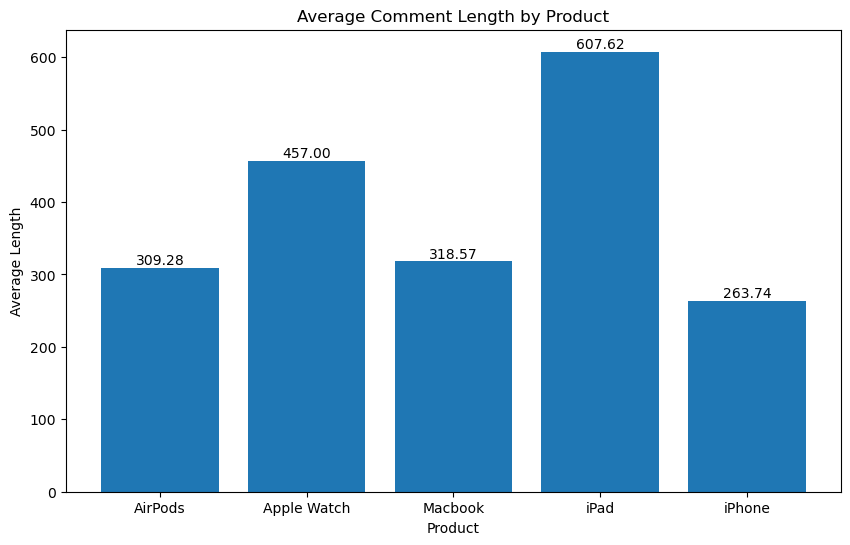

In [71]:
import matplotlib.pyplot as plt

average_lengths = df.groupby('Search')['Comment_Body'].apply(lambda x: x.str.len().mean()).reset_index()
average_lengths.rename(columns={'Comment_Body': 'Average_Length'}, inplace=True)

# Create a bigger bar chart,
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_plot = plt.bar(average_lengths['Search'], average_lengths['Average_Length'])

# Add text annotations with the average lengths on the bars
for i, value in enumerate(average_lengths['Average_Length']):
    plt.annotate(f'{value:.2f}', xy=(i, value), ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Average Length')
plt.title('Average Comment Length by Product')

plt.show()


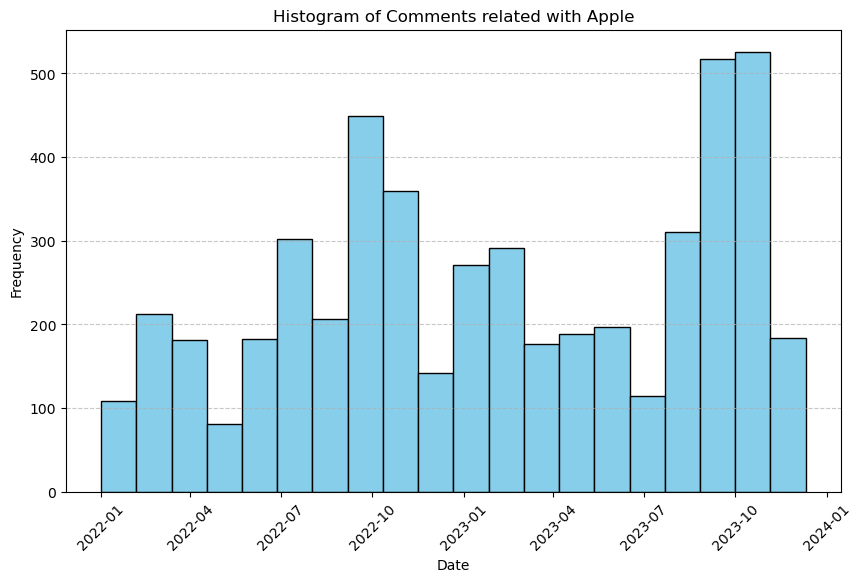

In [72]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()


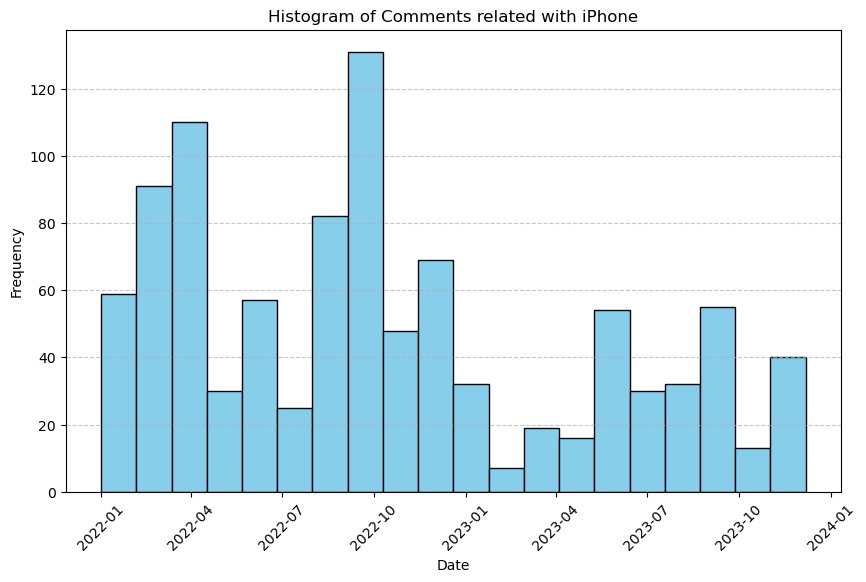

In [73]:
df_iphone = df[df['Search']=='iPhone']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_iphone['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPhone')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



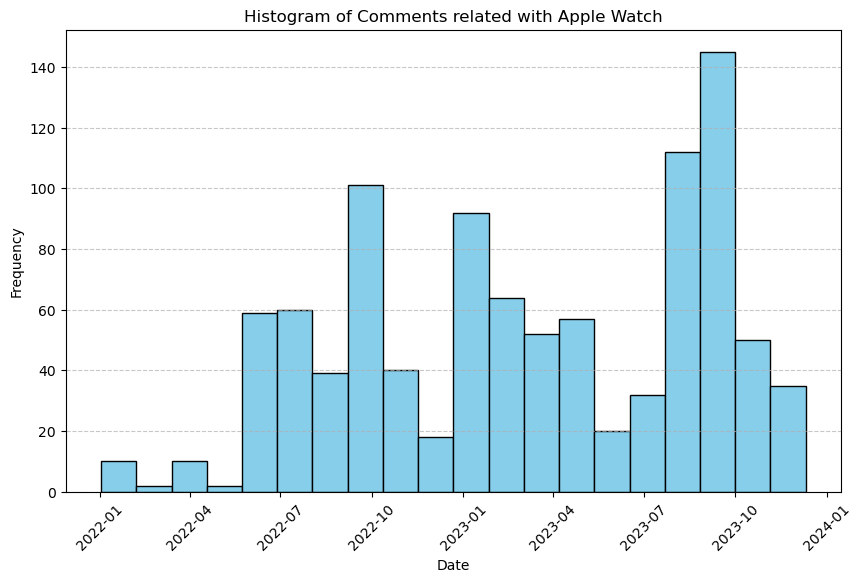

In [74]:
df_watch = df[df['Search']=='Apple Watch']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_watch['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple Watch')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



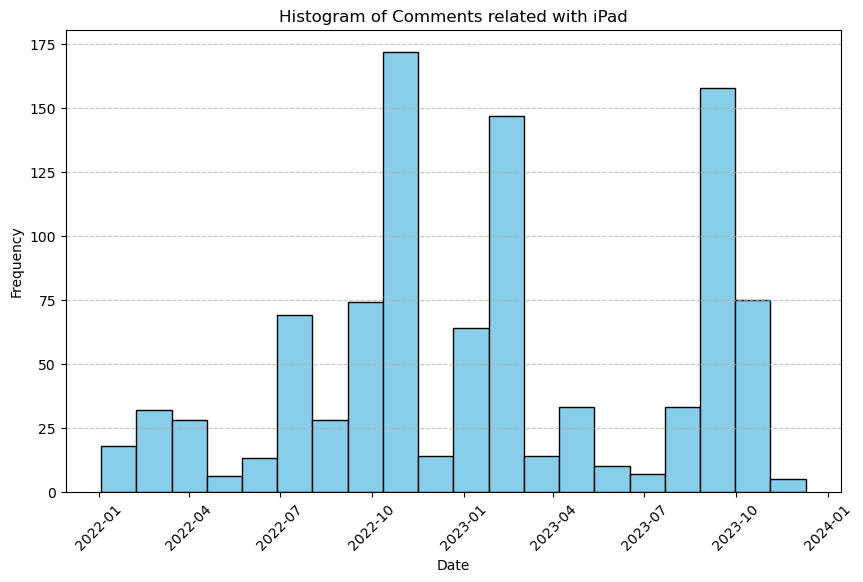

In [75]:
df_ipad = df[df['Search']=='iPad']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_ipad['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPad')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



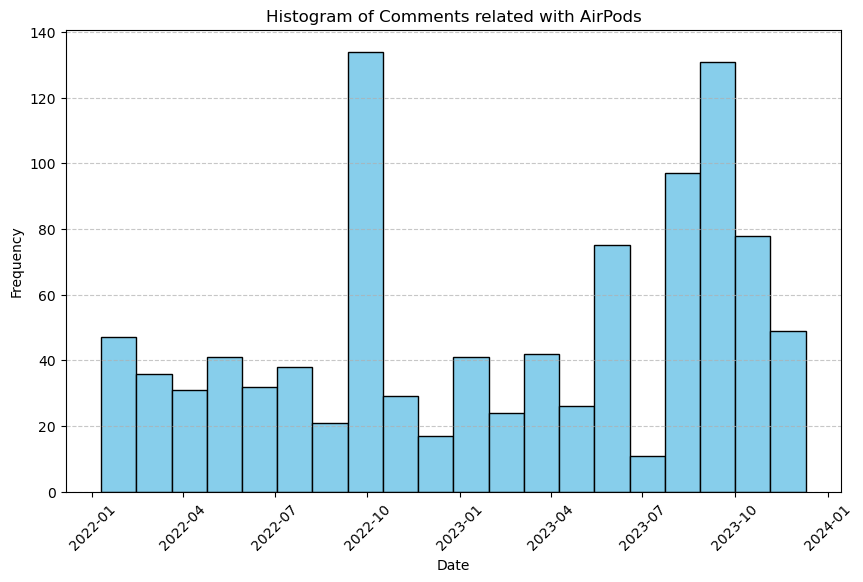

In [76]:
df_airpods = df[df['Search']=='AirPods']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_airpods['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with AirPods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



In [77]:
df_macbook = df[df['Search']=='Macbook']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_macbook['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Macbook')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



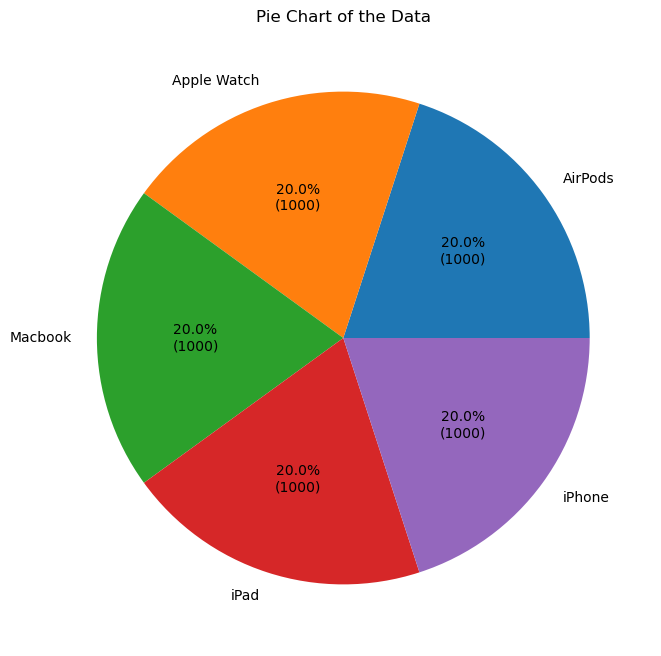

In [78]:
search_counts = df['Search'].value_counts()

# Function to format the text to be displayed on the pie chart
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(search_counts, labels=search_counts.index, autopct=lambda pct: func(pct, search_counts))

# To display both exact values and percentages, we use a custom lambda function in autopct
plt.title("Pie Chart of the Data")
plt.show()


In [79]:
sorted_df = df.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
263   Make sure you put them in LOST mode. They are ...    11779       0   
271   While landing at MDW I dropped my AirPods and ...    10317       0   
3895  Man, you had such an easy in just to say "Hey ...     7003       0   
3025  NTA - NO NO NO!\n\nHer dresses and wedding cos...     6169       0   
1916  She just wears the apple watch when you are ar...     5599       0   

                    Date       Search Language  
263  2022-04-08 23:45:00      AirPods       en  
271  2022-04-08 21:08:00      AirPods       en  
3895 2023-01-16 13:26:00         iPad       en  
3025 2022-09-17 04:43:00         iPad       en  
1916 2023-05-01 03:48:00  Apple Watch       en

In [80]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Make sure you put them in LOST mode. They are permanently tied to your APPLE ID, you can put a notice that will show up if someone goes to use them, etc

EDIT: Since so many people are interested in the Lost Mode settings. -> [Airpods FindMy Features](https://support.apple.com/en-us/HT207581)  
EDIT#2: Thank you everyone for all the upvotes!
---------------------------------------------------------------------------------------------------------
1 While landing at MDW I dropped my AirPods and they slid all the way to the front of the plane. Instead of turning the headphones in to a flight attendant the person has just been using them.

Update:
Their location hasn’t updated since yesterday at 4pm. I can only assume their battery died and the dude doesn’t have a charger for them.
---------------------------------------------------------------------------------------------------------
2 Man, you had such an easy in just to say "Hey I was watching Netflix on your iPad and accidentally sa

In [81]:
sorted_df = df_iphone.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
4000  #**Stop personal photos and videos from poppin...     2498       0   
4604  And just to add salt to the wound, iPhone in P...     1813       0   
4072  I think I’m the only person who remembers the ...     1711       0   
4846  I read a article saying that it was cheaper to...     1649       0   
4258  > A recent report\n\nThat’s a daily mail link,...     1630       0   

                    Date  Search Language  
4000 2022-09-13 06:05:00  iPhone       en  
4604 2022-12-09 13:38:00  iPhone       en  
4072 2022-01-09 11:50:00  iPhone       en  
4846 2022-12-09 13:36:00  iPhone       en  
4258 2022-03-17 17:10:00  iPhone       en

In [82]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 #**Stop personal photos and videos from popping up unexpectedly**

>Apple's artificial intelligence helps surface photos and videos in various places across your iPhone it thinks you might want to see, as a friendly reminder of family vacations, couple photos and holidays -- but you may not always want your personal photos to pop up unexpectedly, especially if they're private, embarrassing or inappropriate.

>Fortunately with iOS 16, you can now prevent Featured Photos, as well as curated collections known as Memories, from appearing in photo widgets on your home screen and the Search and For You sections in Photos. 

>To block these tailored photos, launch the Settings app, go into Photos and toggle off Show Featured Content. All featured content will no longer appear across your device -- instead, it'll only be available in your photo library and albums.

#**Prevent the side button from accidentally ending your phone calls**

>The side/power button on the side of your iPhone allows

In [83]:
sorted_df = df_watch.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
1916  She just wears the apple watch when you are ar...     5599       0   
1196  I'm kind of curious about how well the Apple W...     2046       0   
1985  No, Apple will just pay a fee instead of getti...     1774       0   
1284  I would credit my Apple Watch with saving me a...     1481       0   
1230  “Smit Metha, a 17-year old from India, suffere...     1400       0   

                    Date       Search Language  
1916 2023-05-01 03:48:00  Apple Watch       en  
1196 2022-10-26 01:02:00  Apple Watch       en  
1985 2023-10-29 11:23:00  Apple Watch       en  
1284 2023-01-22 19:08:00  Apple Watch       en  
1230 2022-11-19 16:20:00  Apple Watch       en

In [84]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 She just wears the apple watch when you are around to show she is appreciate for the gift. Im sure the wrist computer comes off as soon as you leave so she can be at peace with her rollie
---------------------------------------------------------------------------------------------------------
1 I'm kind of curious about how well the Apple Watch handles darker skin tones.  Those have been, and continue to be, a problem for "traditional" transdermal pulse oximeters.  [1] (https://www.apsf.org/article/apsf-statement-on-pulse-oximetry-and-skin-tone/) [2](https://hms.harvard.edu/news/skin-tone-pulse-oximetry) [3](https://pubs.asahq.org/anesthesiology/article/102/4/715/7364/Effects-of-Skin-Pigmentation-on-Pulse-Oximeter) [4](https://www.statnews.com/2022/07/05/pulse-oximeters-accuracy-skin-color/) [5](https://www.statnews.com/2021/02/10/pulse-oximeters-racial-disparities/)
---------------------------------------------------------------------------------------------------------
2 No, Apple 

In [85]:
sorted_df = df_airpods.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
263  Make sure you put them in LOST mode. They are ...    11779       0   
271  While landing at MDW I dropped my AirPods and ...    10317       0   
522  Can't wait for my airpods to update either ove...     5464       0   
755  Ok it sucks that someone took them but the lad...     4012       0   
450  I thought/think the original AirPods were ridi...     2551       0   

                   Date   Search Language  
263 2022-04-08 23:45:00  AirPods       en  
271 2022-04-08 21:08:00  AirPods       en  
522 2023-11-04 20:33:00  AirPods       en  
755 2023-03-24 19:11:00  AirPods       en  
450 2022-09-24 16:04:00  AirPods       en

In [86]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Make sure you put them in LOST mode. They are permanently tied to your APPLE ID, you can put a notice that will show up if someone goes to use them, etc

EDIT: Since so many people are interested in the Lost Mode settings. -> [Airpods FindMy Features](https://support.apple.com/en-us/HT207581)  
EDIT#2: Thank you everyone for all the upvotes!
---------------------------------------------------------------------------------------------------------
1 While landing at MDW I dropped my AirPods and they slid all the way to the front of the plane. Instead of turning the headphones in to a flight attendant the person has just been using them.

Update:
Their location hasn’t updated since yesterday at 4pm. I can only assume their battery died and the dude doesn’t have a charger for them.
---------------------------------------------------------------------------------------------------------
2 Can't wait for my airpods to update either overnight tonight or sometime in 8-12 weeks when the moon 

In [87]:
sorted_df = df_ipad.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
3895  Man, you had such an easy in just to say "Hey ...     7003       0   
3025  NTA - NO NO NO!\n\nHer dresses and wedding cos...     6169       0   
3389  NTA\n\nYour mum is enabling your sister’s beha...     5086       0   
3420  ESH and you two need to learn to communicate b...     2920       0   
3600  We have a whole group tasked with destroying d...     2469       0   

                    Date Search Language  
3895 2023-01-16 13:26:00   iPad       en  
3025 2022-09-17 04:43:00   iPad       en  
3389 2022-06-03 23:12:00   iPad       en  
3420 2022-09-17 05:00:00   iPad       en  
3600 2022-05-24 20:35:00   iPad       en

In [88]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Man, you had such an easy in just to say "Hey I was watching Netflix on your iPad and accidentally saw some gross message previews from some dude. What's that about?" but instead sent full seclusion inside your head. Very good example of why it's good to just immediately address issues and not let things stew.
---------------------------------------------------------------------------------------------------------
1 NTA - NO NO NO!

Her dresses and wedding costs do NOT take precedence over other bills and obligations.  Replacing the ipod is an obligation and expense. Her daughter took something that wasn't hers, that she had been told on numerous occasions not to touch, took it and ended up breaking it.  If it was someone else's ipad other than your daughters would she expect THEM to wait until after the wedding for a replacement? No. (and if yes - she is a major AH)   Would she be making HER daughter wait for a replacement if your daughter broke it?  Think about it, seriously.

It i

In [89]:
sorted_df = df_macbook.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
2203  more honest headline:\n\n\nM2 MacBook Air runs...     2749       0   
2184  I know a lot of people that bought MacBooks an...     2216       0   
2996  \*laughes as my 2018 macbook pro throttles dow...     2077       0   
2649  This is the perfect lineup. Now you don’t have...     1261       0   
2319  NTA this oblivion and refusal to change of her...     1022       0   

                    Date   Search Language  
2203 2022-08-23 11:07:00  Macbook       en  
2184 2023-10-18 18:18:00  Macbook       en  
2996 2022-07-17 11:33:00  Macbook       en  
2649 2022-12-15 15:47:00  Macbook       en  
2319 2023-08-22 20:00:00  Macbook       en

In [90]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 more honest headline:


M2 MacBook Air runs singlecore Geekbench under virtualized Windows 11 ARM (Parallels 18) faster than a Dell XPS. It also beats the XPS in multicore under the condition that the Dell is running on battery.



M2 single: 1681


M2 multi: 7260


Dell single on battery: 1182


Dell multi on battery: 5476


Dell single: 1548


Dell multi: 8103 



M2 price $1599


XPS Plus is $1849



I hoped that saved you a click.
---------------------------------------------------------------------------------------------------------
1 I know a lot of people that bought MacBooks and just new laptops in general at the start of the pandemic. I wouldn’t be surprised if a lot of this is just the pandemic driven growth dropping back towards more normal levels.

In the last 5 years I’d also say upgrading laptops has become much less important for those that don’t game. My main laptop is from early 2019 and I don’t have any compelling reason to upgrade. Most of the products I use are w

**7.Apply Contractions to fix the comments**

In [91]:
import contractions
df['Fixed_Comment'] = df['Comment_Body'].apply(contractions.fix)
df[df['Fixed_Comment'] != df['Comment_Body']][8:]

Comment_Body  Upvotes  Awards  \
8     I’m still massively confused as to what “adapt...        8       0   
9     Standard AirPods:\n\n> Apple plans to phase ou...      305       0   
10    I’m not the biggest fan of apple because of th...        3       0   
11    So I had the AirPods max for about 2 weeks bef...        1       0   
12    Hey guys.\n\n\nFirst of all i reckon this batc...       34       0   
...                                                 ...      ...     ...   
4989  Dont downvote but you can ignore. What do u do...        4       0   
4990  Is there any legal standing here?\n\nI don't t...        1       0   
4993  That's a hard pass straight for the iPhone, wh...        0       0   
4995  The new iphones are very boring and iterative....        5       0   
4997  Me sitting here with my iPhone 8 and some popc...        1       0   

                    Date   Search Language  \
8    2022-09-30 08:23:00  AirPods       en   
9    2023-10-25 17:34:00  AirPods       en   
10   2023-08-23 18:02:00  AirPods       en   
11   2022-07-08 13:13:00  AirPods       en   
12   2023-11-03 15:10:00  AirPods       en   
...                  ...      ...      ...   
4989 2022-06-05 16:32:00   iPhone       en   
4990 2023-05-25 19:36:00   iPhone       en   
4993 2023-12-02 12:54:00   iPhone       en   
4995 2022-09-28 02:54:00   iPhone       en   
4997 2022-10-09 06:56:00   iPhone       en   

                                          Fixed_Comment  
8     I am still massively confused as to what “adap...  
9     Standard AirPods:\n\n> Apple plans to phase ou...  
10    I am not the biggest fan of apple because of t...  
11    So I had the AirPods max for about 2 weeks bef...  
12    Hey guys.\n\n\nFirst of all i reckon this batc...  
...                                                 ...  
4989  Do Not downvote but you can ignore. What do yo...  
4990  Is there any legal standing here?\n\nI do not ...  
4993  That is a hard pass straight for the iPhone, w...  
4995  The new iphones are very boring and iterative....  
4997  Me sitting here with my iPhone 8 and some popc...  

[3681 rows x 7 columns]

**8. Patterns Substitution**

In [92]:
import re

price_pattern = r'\$\d+(\.\d{2})?'   # Matches prices in the format $X.XX or $X
size_pattern = r'\b\d+(?:\.\d+)?(?:x\d+(?:\.\d+)?)?\b'   # Matches sizes like 10x10 or 2.5x3.2
volume_pattern = r'\b\d+(?:\.\d+)?\s*[Ll]\b'   # Matches volumes like 1L or 0.5 l
weight_pattern = r'\b\d+(?:\.\d+)?\s*[Kk][Gg]\b'   # Matches weights like 2.5 kg or 10.2 Kg

def substitute_patterns(text):
    text = re.sub(price_pattern, '[PRICE]', text)
    text = re.sub(size_pattern, '[SIZE]', text)
    text = re.sub(volume_pattern, '[VOLUME]', text)
    text = re.sub(weight_pattern, '[WEIGHT]', text)
    return text

df['Substituted_Comment'] = df['Fixed_Comment'].apply(substitute_patterns)
df[df['Substituted_Comment'] != df['Fixed_Comment']][['Comment_Body','Substituted_Comment']][1:]

Comment_Body  \
1     This was a mistake. But it’s 99% your wife’s m...   
2     Wait so the only person who cared enough about...   
3     Picked up the Pro gen 2s today as well, migrat...   
4     Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5     I was wondering about this in recent days. Fin...   
...                                                 ...   
4984  iPhone 14 (A.K.A. iPhone 13S) the Pro was the ...   
4987  This isn't apple sucks. They discounted the la...   
4988  13 mini is missing on there. In my opinion it’...   
4994  If i was that girl i would stay atleast 10 met...   
4997  Me sitting here with my iPhone 8 and some popc...   

                                    Substituted_Comment  
1     This was a mistake. But it is [SIZE]% your wif...  
2     Wait so the only person who cared enough about...  
3     Picked up the Pro gen 2s today as well, migrat...  
4     Hi all, \r  \n\r  \nI would like to warn anyon...  
5     I was wondering about this in recent days. Fin...  
...                                                 ...  
4984  iPhone [SIZE] (A.K.A. iPhone 13S) the Pro was ...  
4987  This is not apple sucks. They discounted the l...  
4988  [SIZE] mini is missing on there. In my opinion...  
4994  If i was that girl i would stay atleast [SIZE]...  
4997  Me sitting here with my iPhone [SIZE] and some...  

[2542 rows x 2 columns]

**9. Http links replacement**

In [93]:
link_pattern = r'https?://\S+'

def substitute_links(text):
    return re.sub(link_pattern, '[LINK]', text)

df['Replaced_Comment'] = df['Substituted_Comment'].apply(substitute_links)
df[df['Substituted_Comment'] != df['Replaced_Comment']][['Comment_Body','Replaced_Comment']][67:]

Comment_Body  \
1984  I wish [Vigil](https://web.archive.org/web/201...   
2044  We seem to keep comparing the M2 MBA to other ...   
2070  Makes sense.\n\nM1 development, and all other ...   
2076  Display isn't better because of build quality,...   
2092  The laptop is either stolen, or it was sold of...   
...                                                 ...   
4630  https://preview.redd.it/0ezgr1ir5vx91.jpeg?wid...   
4696  Iphone 14 pro max\n\nhttps://preview.redd.it/g...   
4703  Check out [this video](https://youtu.be/3Ws3Yp...   
4709  Apple also used slave labor to produce iphones...   
4728  Iphone 5/5s\n\nhttps://preview.redd.it/tdz47ph...   

                                       Replaced_Comment  
1984  I wish [Vigil]([LINK] was still in operation, ...  
2044  We seem to keep comparing the M2 MBA to other ...  
2070  Makes sense.\n\nM1 development, and all other ...  
2076  Display is not better because of build quality...  
2092  The laptop is either stolen, or it was sold of...  
...                                                 ...  
4630   [LINK]\n\nTeal iPhone [SIZE]. I love that colour  
4696                    Iphone [SIZE] pro max\n\n[LINK]  
4703  Check out [this video]([LINK] which goes into ...  
4709  Apple also used slave labor to produce iphones...  
4728                         Iphone [SIZE]/5s\n\n[LINK]  

[69 rows x 2 columns]

In [94]:
df = df[df["Replaced_Comment"]!="[[LINK]"]
df = df[df["Replaced_Comment"]!="[LINK]"]
df = df[df["Replaced_Comment"]!="&#x200B;\n\n[LINK]"]
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**10. Remove Line Breaks**

In [95]:
def remove_line_breaks(text):
    return text.replace('\n', ' ')

df['Without_LineBreaks'] = df['Replaced_Comment'].apply(remove_line_breaks)

df[df['Replaced_Comment'] != df['Without_LineBreaks']][['Comment_Body','Without_LineBreaks']]


Comment_Body  \
0     Comparing these to my AirPods Max…\r  \n\r  \n...   
1     This was a mistake. But it’s 99% your wife’s m...   
2     Wait so the only person who cared enough about...   
3     Picked up the Pro gen 2s today as well, migrat...   
4     Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...                                                 ...   
4951  Sweet faraday cage.\n\nFYI, The iphone 4 uses ...   
4952  That is one ugly phone.\n\nBring back the smoo...   
4953  For  Apple wants an Iphone gain, workers right...   
4968  I'm still waiting for the iPhone that doesn't ...   
4990  Is there any legal standing here?\n\nI don't t...   

                                     Without_LineBreaks  
0     Comparing these to my AirPods Max…\r   \r   So...  
1     This was a mistake. But it is [SIZE]% your wif...  
2     Wait so the only person who cared enough about...  
3     Picked up the Pro gen 2s today as well, migrat...  
4     Hi all, \r   \r   I would like to warn anyone ...  
...                                                 ...  
4951  Sweet faraday cage.  FYI, The iphone [SIZE] us...  
4952  That is one ugly phone.  Bring back the smooth...  
4953  For  Apple wants an Iphone gain, workers right...  
4968  I am still waiting for the iPhone that does no...  
4990  Is there any legal standing here?  I do not th...  

[2208 rows x 2 columns]

**12. Apply TextBlob to correct comments**

In [96]:
from textblob import TextBlob

def correct_comment(comment):
    blob = TextBlob(comment)
    corrected_comment = blob.correct()
    return str(corrected_comment)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][2:12]

Comment_Body  \
2   Wait so the only person who cared enough about...   
3   Picked up the Pro gen 2s today as well, migrat...   
4   Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5   I was wondering about this in recent days. Fin...   
6   ***Adaptive Audio***\n\nAdaptive Audio, or Ada...   
7   I am a pilot and left my AirPods on a plane. T...   
8   I’m still massively confused as to what “adapt...   
9   Standard AirPods:\n\n> Apple plans to phase ou...   
10  I’m not the biggest fan of apple because of th...   
11  So I had the AirPods max for about 2 weeks bef...   

                 Corrected_Comment(SentimentAnalysis)  
2   Wait so the only person who cared enough about...  
3   Picked up the Fro gen is today as well, migrat...  
4   I all, \r   \r   I would like to warn anyone b...  
5   I was wondering about this in recent days. Fin...  
6   ***Captive Studio***  Captive Studio, or Capti...  
7   I am a pilot and left my AirPods on a plane. T...  
8   I am still passively confused as to what “capt...  
9   Standard AirPods:  > Apple plans to phase out ...  
10  I am not the biggest fan of apple because of t...  
11  To I had the AirPods max for about [SIZE] week...

In [97]:
words_to_keep = ['Apple', 'iPhone', 'Macbook', 'AirPods', 'iPad', 'Watch', 'My', 'tech', 'stats', 'She', 'kids',
                 'Shot', 'Powered', 'Max', 'giga', 'omega', 'gamma', 'sigma']
lowercase_words_to_keep = {word.lower() for word in words_to_keep}  # Convert words to lowercase for comparison

def correct_comment(row):
    preserved_punctuations = set(['.', ',', '!', '?', ':', ';'])
    words = re.findall(r'\w+|[^\w\s]', row)

    # Check against the lowercase version of the words
    processed_words = [word if word.lower() in lowercase_words_to_keep or word in preserved_punctuations else str(TextBlob(word).correct()) for word in words]

    return ' '.join(processed_words)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body', 'Corrected_Comment(SentimentAnalysis)']][323:]

Comment_Body  \
323   Like others have said you probably will never ...   
324   I own a pair of second gen AirPods (not the pr...   
325   >\tAfter 12 days of chasing, Hayden finally go...   
326   Apple has functionality to find misplaced acce...   
327   Damn, I just got back into the eco system and ...   
...                                                 ...   
4995  The new iphones are very boring and iterative....   
4996  iphone X. I miss those rounded edges so much, ...   
4997  Me sitting here with my iPhone 8 and some popc...   
4998  Yes lol, work in a phone shop and NEVER see bu...   
4999  Every year iPhones have to return to their pla...   

                   Corrected_Comment(SentimentAnalysis)  
323   Like others have said you probably will never ...  
324   I own a pair of second gen AirPods ( not the p...  
325   > After [ SIZE ] days of chasing , Garden fina...  
326   Apple has functionality to find misplaced acce...  
327   Damn , I just got back into the co system and ...  
...                                                 ...  
4995  The new phone are very boring and operative . ...  
4996  iphone X . I miss those rounded edges so much ...  
4997  He sitting here with my iPhone [ SIZE ] and so...  
4998  Yes ll , work in a phone shop and NEVER see bu...  
4999  Very year iPhones have to return to their plac...  

[4666 rows x 2 columns]

**12.Add a common case stage**

In [98]:
df['Lower_Comment'] = df['Corrected_Comment(SentimentAnalysis)'].str.lower()
df[['Comment_Body', 'Lower_Comment']]


Comment_Body  \
0     Comparing these to my AirPods Max…\r  \n\r  \n...   
1     This was a mistake. But it’s 99% your wife’s m...   
2     Wait so the only person who cared enough about...   
3     Picked up the Pro gen 2s today as well, migrat...   
4     Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...                                                 ...   
4995  The new iphones are very boring and iterative....   
4996  iphone X. I miss those rounded edges so much, ...   
4997  Me sitting here with my iPhone 8 and some popc...   
4998  Yes lol, work in a phone shop and NEVER see bu...   
4999  Every year iPhones have to return to their pla...   

                                          Lower_Comment  
0     comparing these to my airpods max … bony has b...  
1     his was a mistake . but it is [ size ] % your ...  
2     wait so the only person who cared enough about...  
3     picked up the fro gen is today as well , migra...  
4     i all , i would like to warn anyone buying air...  
...                                                 ...  
4995  the new phone are very boring and operative . ...  
4996  iphone x . i miss those rounded edges so much ...  
4997  he sitting here with my iphone [ size ] and so...  
4998  yes ll , work in a phone shop and never see bu...  
4999  very year iphones have to return to their plac...  

[5000 rows x 2 columns]

**13. Tokenization**

In [99]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    sentences = sent_tokenize(text)   # Tokenize into sentences
    words = [word_tokenize(sentence) for sentence in sentences]   # Tokenize each sentence into words
    return ' '.join([' '.join(sentence) for sentence in words]) 

df['Tokenized_Comment'] = df['Lower_Comment'].apply(tokenize_text)
df[df['Tokenized_Comment'] != df['Lower_Comment']][['Lower_Comment', 'Tokenized_Comment']]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Lower_Comment  \
0     comparing these to my airpods max … bony has b...   
1     his was a mistake . but it is [ size ] % your ...   
2     wait so the only person who cared enough about...   
4     i all , i would like to warn anyone buying air...   
5     i was wondering about this in recent days . fi...   
...                                                 ...   
4840  of you hold the original iphone in your hand ,...   
4899  " west iphone ever made " wait you mean apple ...   
4920  him took was also quoted as saying : " there i...   
4932  i interpreted as her asking " is this me or th...   
4984  iphone [ size ] ( a . k . a . iphone 13s ) the...   

                                      Tokenized_Comment  
0     comparing these to my airpods max … bony has b...  
1     his was a mistake . but it is [ size ] % your ...  
2     wait so the only person who cared enough about...  
4     i all , i would like to warn anyone buying air...  
5     i was wondering about this in recent days . fi...  
...                                                 ...  
4840  of you hold the original iphone in your hand ,...  
4899  `` west iphone ever made `` wait you mean appl...  
4920  him took was also quoted as saying : `` there ...  
4932  i interpreted as her asking `` is this me or t...  
4984  iphone [ size ] ( a . k . a . iphone 13s ) the...  

[758 rows x 2 columns]

**14. Remove the stopwords**

In [100]:
from nltk.corpus import stopwords

def remove_stopwords_except_not(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove("not")
    words = text.split()  # Split the space-separated string into a list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)  # Convert the list of words back to a space-separated string

# Apply the remove_stopwords function to the "Tokenized_Comment" column
df['Without_Stopwords'] = df['Tokenized_Comment'].apply(remove_stopwords_except_not)
df[df['Tokenized_Comment'] != df['Without_Stopwords']][['Tokenized_Comment', 'Without_Stopwords']]


Tokenized_Comment  \
0     comparing these to my airpods max … bony has b...   
1     his was a mistake . but it is [ size ] % your ...   
2     wait so the only person who cared enough about...   
3     picked up the fro gen is today as well , migra...   
4     i all , i would like to warn anyone buying air...   
...                                                 ...   
4995  the new phone are very boring and operative . ...   
4996  iphone x . i miss those rounded edges so much ...   
4997  he sitting here with my iphone [ size ] and so...   
4998  yes ll , work in a phone shop and never see bu...   
4999  very year iphones have to return to their plac...   

                                      Without_Stopwords  
0     comparing airpods max … bony rose ' nightmare ...  
1     mistake . [ size ] % wife ’ mistake . left air...  
2     wait person cared enough give gift brothers ? ...  
3     picked fro gen today well , migration pair bon...  
4     , would like warn anyone buying airpods [ size...  
...                                                 ...  
4995  new phone boring operative . not surprised gro...  
4996  iphone x . miss rounded edges much , feel comf...  
4997  sitting iphone [ size ] popcorn watching drama...  
4998  yes , work phone shop never see burn iphone … ...  
4999  year iphones return place birth annual celebra...  

[4999 rows x 2 columns]

**15. Remove emojis, punctations**

In [101]:
import string

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+")
    return emoji_pattern.sub(r'', text)

def remove_punctuation_and_quotes(text):
    # Combine the punctuation string with the double quote character
    custom_punctuation = string.punctuation + '"' + "“"
    return text.translate(str.maketrans('', '', custom_punctuation))

# Apply the functions to the "Without_Stopwords" column
df['Prepared_Comment'] = df['Without_Stopwords'].apply(remove_emojis)
df['Prepared_Comment'] = df['Prepared_Comment'].apply(remove_punctuation_and_quotes)

df[df['Prepared_Comment'] != df['Without_Stopwords']][['Comment_Body', 'Prepared_Comment']][1240:]

Comment_Body  \
1264  4 years with my previous one (series 4). Can g...   
1265  So as someone with no Apple Watch (but current...   
1266  Real watch enthusiasts do not look down on the...   
1267  I have a Garmin Tactix Delta (basically a Feni...   
1268  10 Most Popular Smart Wrist Watches\r  \nFindi...   
...                                                 ...   
4994  If i was that girl i would stay atleast 10 met...   
4995  The new iphones are very boring and iterative....   
4996  iphone X. I miss those rounded edges so much, ...   
4997  Me sitting here with my iPhone 8 and some popc...   
4998  Yes lol, work in a phone shop and NEVER see bu...   

                                       Prepared_Comment  
1264   size  years previous one  series  size    get...  
1265  someone apple watch  currently margin genu  si...  
1266  real watch enthusiast not look apple watch  re...  
1267  margin tactic felt  basically penis  size   te...  
1268   size  popular smart wrist patches finding bes...  
...                                                 ...  
4994  girl would stay least  size  peters away smoki...  
4995  new phone boring operative  not surprised grow...  
4996  iphone x  miss rounded edges much  feel comfor...  
4997  sitting iphone  size  popcorn watching drama n...  
4998  yes  work phone shop never see burn iphone … p...  

[3701 rows x 2 columns]

**16. Apply lemmatisation**

In [102]:
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

df['Lemmatized_Comment'] = df['Prepared_Comment'].apply(preprocess_text)
df[df['Lemmatized_Comment'] != df['Prepared_Comment']][['Prepared_Comment', 'Lemmatized_Comment']][:]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prepared_Comment  \
0     comparing airpods max … bony rose  nightmare s...   
1     mistake   size   wife ’ mistake  left airpods ...   
2     wait person cared enough give gift brothers  s...   
3     picked fro gen today well  migration pair bone...   
4      would like warn anyone buying airpods  size  ...   
...                                                 ...   
4994  girl would stay least  size  peters away smoki...   
4995  new phone boring operative  not surprised grow...   
4996  iphone x  miss rounded edges much  feel comfor...   
4997  sitting iphone  size  popcorn watching drama n...   
4998  yes  work phone shop never see burn iphone … p...   

                                     Lemmatized_Comment  
0     comparing airpods max … bony rose nightmare si...  
1     mistake size wife ’ mistake left airpods lunch...  
2     wait person cared enough give gift brother say...  
3     picked fro gen today well migration pair bone ...  
4     would like warn anyone buying airpods size air...  
...                                                 ...  
4994  girl would stay least size peter away smoking ...  
4995  new phone boring operative surprised growth sl...  
4996  iphone x miss rounded edge much feel comfortab...  
4997  sitting iphone size popcorn watching drama und...  
4998  yes work phone shop never see burn iphone … proud  

[4985 rows x 2 columns]

**17. Remove the unnecessary columns**

In [103]:
df = df[['Search', 'Comment_Body', 'Lemmatized_Comment', 'Corrected_Comment(SentimentAnalysis)']]
df


Search                                       Comment_Body  \
0     AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1     AirPods  This was a mistake. But it’s 99% your wife’s m...   
2     AirPods  Wait so the only person who cared enough about...   
3     AirPods  Picked up the Pro gen 2s today as well, migrat...   
4     AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...       ...                                                ...   
4995   iPhone  The new iphones are very boring and iterative....   
4996   iPhone  iphone X. I miss those rounded edges so much, ...   
4997   iPhone  Me sitting here with my iPhone 8 and some popc...   
4998   iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999   iPhone  Every year iPhones have to return to their pla...   

                                     Lemmatized_Comment  \
0     comparing airpods max … bony rose nightmare si...   
1     mistake size wife ’ mistake left airpods lunch...   
2     wait person cared enough give gift brother say...   
3     picked fro gen today well migration pair bone ...   
4     would like warn anyone buying airpods size air...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                   Corrected_Comment(SentimentAnalysis)  
0     Comparing these to my AirPods Max … Bony has b...  
1     His was a mistake . But it is [ SIZE ] % your ...  
2     Wait so the only person who cared enough about...  
3     Picked up the Fro gen is today as well , migra...  
4     I all , I would like to warn anyone buying Air...  
...                                                 ...  
4995  The new phone are very boring and operative . ...  
4996  iphone X . I miss those rounded edges so much ...  
4997  He sitting here with my iPhone [ SIZE ] and so...  
4998  Yes ll , work in a phone shop and NEVER see bu...  
4999  Very year iPhones have to return to their plac...  

[5000 rows x 4 columns]

**18. Rename the columns**

In [104]:
df.rename(columns={'Comment_Body': 'Comment', 'Lemmatized_Comment': 'Cleaned_Comment',
                   'Corrected_Comment(SentimentAnalysis)': 'Sentiment_Comment'}, inplace=True)
df

Search                                            Comment  \
0     AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1     AirPods  This was a mistake. But it’s 99% your wife’s m...   
2     AirPods  Wait so the only person who cared enough about...   
3     AirPods  Picked up the Pro gen 2s today as well, migrat...   
4     AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...       ...                                                ...   
4995   iPhone  The new iphones are very boring and iterative....   
4996   iPhone  iphone X. I miss those rounded edges so much, ...   
4997   iPhone  Me sitting here with my iPhone 8 and some popc...   
4998   iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999   iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
0     comparing airpods max … bony rose nightmare si...   
1     mistake size wife ’ mistake left airpods lunch...   
2     wait person cared enough give gift brother say...   
3     picked fro gen today well migration pair bone ...   
4     would like warn anyone buying airpods size air...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  
0     Comparing these to my AirPods Max … Bony has b...  
1     His was a mistake . But it is [ SIZE ] % your ...  
2     Wait so the only person who cared enough about...  
3     Picked up the Fro gen is today as well , migra...  
4     I all , I would like to warn anyone buying Air...  
...                                                 ...  
4995  The new phone are very boring and operative . ...  
4996  iphone X . I miss those rounded edges so much ...  
4997  He sitting here with my iPhone [ SIZE ] and so...  
4998  Yes ll , work in a phone shop and NEVER see bu...  
4999  Very year iPhones have to return to their plac...  

[5000 rows x 4 columns]

**19. Check the na rows**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Search             5000 non-null   object
 1   Comment            5000 non-null   object
 2   Cleaned_Comment    5000 non-null   object
 3   Sentiment_Comment  5000 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


**20. Calculate the length**

In [115]:
df['Length'] = df['Comment'].apply(len)
df

Search                                            Comment  \
0     AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1     AirPods  This was a mistake. But it’s 99% your wife’s m...   
2     AirPods  Wait so the only person who cared enough about...   
3     AirPods  Picked up the Pro gen 2s today as well, migrat...   
4     AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...       ...                                                ...   
4995   iPhone  The new iphones are very boring and iterative....   
4996   iPhone  iphone X. I miss those rounded edges so much, ...   
4997   iPhone  Me sitting here with my iPhone 8 and some popc...   
4998   iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999   iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
0     comparing airpods max … bony rose nightmare si...   
1     mistake size wife ’ mistake left airpods lunch...   
2     wait person cared enough give gift brother say...   
3     picked fro gen today well migration pair bone ...   
4     would like warn anyone buying airpods size air...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  
0     Comparing these to my AirPods Max … Bony has b...    7459  
1     His was a mistake . But it is [ SIZE ] % your ...    3265  
2     Wait so the only person who cared enough about...    2518  
3     Picked up the Fro gen is today as well , migra...    2281  
4     I all , I would like to warn anyone buying Air...    2254  
...                                                 ...     ...  
4995  The new phone are very boring and operative . ...      83  
4996  iphone X . I miss those rounded edges so much ...      83  
4997  He sitting here with my iPhone [ SIZE ] and so...      83  
4998  Yes ll , work in a phone shop and NEVER see bu...      83  
4999  Very year iPhones have to return to their plac...      83  

[5000 rows x 5 columns]

In [116]:
df_ipad = df[df['Search']=='iPad']
df_iphone = df[df['Search']=='iPhone']
df_watch = df[df['Search']=='Apple Watch']
df_airpods = df[df['Search']=='AirPods']
df_mac = df[df['Search']=='Macbook']

In [117]:
df.Length.describe()

count    5000.000000
mean      391.243000
std       390.118176
min        83.000000
25%       177.000000
50%       293.000000
75%       465.000000
max      7459.000000
Name: Length, dtype: float64

In [118]:
df.Length.mode()

0    96
Name: Length, dtype: int64

In [119]:
df.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
0         AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
3000         iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001         iPad  Gotta say, I disagree pretty whole-heartedly w...   
1000  Apple Watch  At this point it's really a matter of preferen...   
3002         iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
3003         iPad  **"There's no bad product, just bad prices"-Te...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   

                                        Cleaned_Comment  \
0     comparing airpods max … bony rose nightmare si...   
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
1000  point really matter preference platform margin...   
3002  love ipad fro size reactor property manager ip...   
1001  honestly difficult answer never really stopped...   
3003  bad product bad price techtuber heard probably...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   

                                      Sentiment_Comment  Length  
0     Comparing these to my AirPods Max … Bony has b...    7459  
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965  
3001  Not To say , I disagree pretty whole - heartil...    5860  
1000  It this point it is really a matter of prefere...    4474  
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383  
1001  Honestly , this is difficult to answer . Until...    4336  
3003  * * " There is no bad product , just bad price...    4286  
1002  Smart watch enthusiast here , I have been usin...    4082  
1003  I discovered this year that I have had insomni...    3674  
1004  Aimed engineer here and boy do I got several p...    3570

In [120]:
df.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
4999  iPhone  Every year iPhones have to return to their pla...   
4994  iPhone  If i was that girl i would stay atleast 10 met...   
4995  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4993  iPhone  That's a hard pass straight for the iPhone, wh...   
4992  iPhone  I love how the iPhone looks like it has a crac...   
4991  iPhone  This is misleading, action mode on the new iPh...   
4990  iPhone  Is there any legal standing here?\n\nI don't t...   

                                        Cleaned_Comment  \
4999  year iphones return place birth annual celebra...   
4994  girl would stay least size peter away smoking ...   
4995  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4997  sitting iphone size popcorn watching drama und...   
4996  iphone x miss rounded edge much feel comfortab...   
4993        hard pas straight iphone would sell apple ™   
4992  love iphone look like crack screen true classi...   
4991  misleading action mode new iphone good stabili...   
4990   legal standing think iphone user protected class   

                                      Sentiment_Comment  Length  
4999  Very year iPhones have to return to their plac...      83  
4994  Of i was that girl i would stay least [ SIZE ]...      83  
4995  The new phone are very boring and operative . ...      83  
4998  Yes ll , work in a phone shop and NEVER see bu...      83  
4997  He sitting here with my iPhone [ SIZE ] and so...      83  
4996  iphone X . I miss those rounded edges so much ...      83  
4993  That is a hard pass straight for the iPhone , ...      84  
4992  I love how the iPhone looks like it has a crac...      84  
4991  His is misleading , action mode on the new iPh...      84  
4990  Is there any legal standing here ? I do not th...      84

In [121]:
df_ipad.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
3005   iPad  Here’s the article for free:\n\n>\tApple Inc. ...   
3006   iPad  We gave my son his first IPad when he turned 3...   
3007   iPad  NTA - But here is a tip. Never go to apples of...   
3008   iPad  I’ve got to say, I’ve had an amazing experienc...   
3009   iPad  I think sitting down with her and talking abou...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
3005  article free apple announce significant change...   
3006  gave son first ipad turned size went first big...   
3007  nta tip never go apple official technician fir...   
3008  got say amazing experience stage manager use i...   
3009  think sitting talking frustration breaking thi...   

                                      Sentiment_Comment  Length  
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965  
3001  Not To say , I disagree pretty whole - heartil...    5860  
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383  
3003  * * " There is no bad product , just bad price...    4286  
3004  I think you answered your own question . Of pu...    3477  
3005  Were is the article for free : > Apple And . w...    3309  
3006  He gave my son his first IPad when he turned [...    2729  
3007  NTA - But here is a tip . Never go to apples o...    2716  
3008  I have got to say , I have had an amazing expe...    2600  
3009  I think sitting down with her and talking abou...    2526

In [122]:
df_ipad.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
3999   iPad  I had this exact same thing happen to me a few...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3994   iPad  I don’t think you should punish her for it, bu...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3995   iPad  If you moderately push on the right side of th...   
3991   iPad  Keeping the 1st Gen Pencil and old Smart Conne...   
3993   iPad  unnecessary cord. the new ipad comes with a ti...   
3992   iPad  Imma hold on to this iPad Pro 2020 and my iPho...   
3990   iPad  Best bet if there was money to be made by offe...   

                                        Cleaned_Comment  \
3999  exact thing happen month back order exactly we...   
3998  got ipad size fro since size besides small per...   
3996  result yelled grounded video game new ipad str...   
3994  think punish parent let buy new ipad went thre...   
3997  beyond impressed mine older get le use back tr...   
3995  moderately push right side back ipad air get r...   
3991  keeping st men pencil old smart connector make...   
3993  unnecessary cord new ipad come tiny adapted li...   
3992  going hold ipad fro size iphone12 long new stu...   
3990  west bet money made offering would data know m...   

                                      Sentiment_Comment  Length  
3999  I had this exact same thing happen to me a few...     284  
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285  
3996  Result : Yelled at / grounded / no video games...     286  
3994  I do not think you should punish her for it , ...     286  
3997  I am beyond impressed with mine . The older i ...     286  
3995  Of you moderately push on the right side of th...     286  
3991  Keeping the st Men Pencil and old Smart Connec...     287  
3993  unnecessary cord . the new ipad comes with a t...     287  
3992  I Am Going To hold on to this iPad Fro [ SIZE ...     287  
3990  West bet if there was money to be made by offe...     288

In [123]:
df_iphone.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
4005  iPhone  Apple users are so dumb. "Oh BuT I cAn SeE tHe...   
4006  iPhone  Linus had a good thing to say about phone pric...   
4007  iPhone  I'm sick of brain dead Apple fans thinking the...   
4008  iPhone  I’m a photographer (Canon 80D) and have been t...   
4009  iPhone  Very interesting. I don't think this should ha...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
4005  apple user dumb oh thief iphone realize phone ...   
4006  sinus good thing say phone price long ago wan ...   
4007  sick brain dead apple fan thinking upgrade eve...   
4008  photographer canon 80d toying idea spending mo...   
4009  interesting think happen device know community...   

                                      Sentiment_Comment  Length  
4000  # * * Stop personal photo and video from poppi...    3513  
4001  Took , I cannot fucking stand Apple products ....    2088  
4002  I worked for Apple for most of a decade , incl...    1930  
4003  I have the lip , literally writing this commen...    1872  
4004  I switched to iPhone last year after trying an...    1700  
4005  Apple users are so dumb . " Oh but I can he th...    1549  
4006  Sinus had a good thing to say about phone pric...    1547  
4007  I am sick of brain dead Apple fan thinking the...    1530  
4008  I am a photographer ( Canon 80D ) and have bee...    1453  
4009  Very interesting . I do not think this should ...    1405

In [124]:
df_iphone.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
4999  iPhone  Every year iPhones have to return to their pla...   
4994  iPhone  If i was that girl i would stay atleast 10 met...   
4995  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4993  iPhone  That's a hard pass straight for the iPhone, wh...   
4992  iPhone  I love how the iPhone looks like it has a crac...   
4991  iPhone  This is misleading, action mode on the new iPh...   
4990  iPhone  Is there any legal standing here?\n\nI don't t...   

                                        Cleaned_Comment  \
4999  year iphones return place birth annual celebra...   
4994  girl would stay least size peter away smoking ...   
4995  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4997  sitting iphone size popcorn watching drama und...   
4996  iphone x miss rounded edge much feel comfortab...   
4993        hard pas straight iphone would sell apple ™   
4992  love iphone look like crack screen true classi...   
4991  misleading action mode new iphone good stabili...   
4990   legal standing think iphone user protected class   

                                      Sentiment_Comment  Length  
4999  Very year iPhones have to return to their plac...      83  
4994  Of i was that girl i would stay least [ SIZE ]...      83  
4995  The new phone are very boring and operative . ...      83  
4998  Yes ll , work in a phone shop and NEVER see bu...      83  
4997  He sitting here with my iPhone [ SIZE ] and so...      83  
4996  iphone X . I miss those rounded edges so much ...      83  
4993  That is a hard pass straight for the iPhone , ...      84  
4992  I love how the iPhone looks like it has a crac...      84  
4991  His is misleading , action mode on the new iPh...      84  
4990  Is there any legal standing here ? I do not th...      84

In [125]:
df_watch.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
1005  Apple Watch  Omg I know exactly what you’re saying. I bough...   
1006  Apple Watch  So I actually ordered the Apple Watch Ultra, u...   
1007  Apple Watch  My wife got one and she absolutely loves it. I...   
1008  Apple Watch  Source: [9to5mac](https://9to5mac.com/2022/10/...   
1009  Apple Watch  As an AW user and regular outdoor sporter I am...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
1005  know exactly saying bought apple watch size mo...   
1006  actually ordered apple watch ultra used size d...   
1007  wife got one absolutely love hate wearing watc...   
1008  source 9to5mac link full next apple watch seri...   
1009  user regular outdoor porter going switch yet s...   

                                      Sentiment_Comment  Length  
1000  It this point it is really a matter of prefere...    4474  
1001  Honestly , this is difficult to answer . Until...    4336  
1002  Smart watch enthusiast here , I have been usin...    4082  
1003  I discovered this year that I have had insomni...    3674  
1004  Aimed engineer here and boy do I got several p...    3570  
1005  My I know exactly what you are saying . I boug...    3268  
1006  To I actually ordered the Apple Watch Ultra , ...    2966  
1007  My wife got one and she absolutely loves it . ...    2709  
1008  Source : [ 9to5mac ] ( [ LINK ] Full Next : In...    2457  
1009  Is an of user and regular outdoor porter I am ...    2446

In [126]:
df_watch.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1990  Apple Watch  Ask him to send you a video of how the apple w...   
1991  Apple Watch  I’ve never worn a case on my Apple Watch and I...   
1992  Apple Watch  I love my Apple Watch, but I think the idea of...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1994  Apple Watch  Cool I still have and use my OG Apple Watch. M...   
1993  Apple Watch  Because I love my Titanium Apple Watch except ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   

                                        Cleaned_Comment  \
1999  take work finance size people work wear apple ...   
1998  want apple watch baby get ultra ware one naked...   
1996  generally apple watch battery life low compare...   
1990  ask send video apple watch work usually tell f...   
1991  never worn case apple watch rocked series size...   
1992  love apple watch think idea apple creating ext...   
1997  buying bigger size wound silly pre apple watch...   
1994  fool still use apple watch mostly exercise cha...   
1993  love titanium apple watch except battery life ...   
1995  love apple watch worked hospital actually woul...   

                                      Sentiment_Comment  Length  
1999  Had take . I work in finance and [ SIZE ] % of...     173  
1998  Of you want a Apple Watch you do not have to b...     173  
1996  Why is generally apple watch battery life so l...     174  
1990  Ask him to send you a video of how the apple w...     174  
1991  I have never worn a case on my Apple Watch and...     174  
1992  I love my Apple Watch , but I think the idea o...     174  
1997  I am buying it for the bigger size . Wounds si...     174  
1994  Fool I still have and use my of Apple Watch . ...     174  
1993  Because I love my Titanium Apple Watch except ...     174  
1995  I love my Apple Watch ! When I worked in the h...     174

In [127]:
df_airpods.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
0  AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1  AirPods  This was a mistake. But it’s 99% your wife’s m...   
2  AirPods  Wait so the only person who cared enough about...   
3  AirPods  Picked up the Pro gen 2s today as well, migrat...   
4  AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5  AirPods  I was wondering about this in recent days. Fin...   
6  AirPods  ***Adaptive Audio***\n\nAdaptive Audio, or Ada...   
7  AirPods  I am a pilot and left my AirPods on a plane. T...   
8  AirPods  I’m still massively confused as to what “adapt...   
9  AirPods  Standard AirPods:\n\n> Apple plans to phase ou...   

                                     Cleaned_Comment  \
0  comparing airpods max … bony rose nightmare si...   
1  mistake size wife ’ mistake left airpods lunch...   
2  wait person cared enough give gift brother say...   
3  picked fro gen today well migration pair bone ...   
4  would like warn anyone buying airpods size air...   
5  wondering recent day finally got searching bit...   
6  captive studio captive studio captive noise co...   
7  pilot left airpods plane first officer next fl...   
8  still passively confused captive transparent ”...   
9  standard airpods apple plan phase second gener...   

                                   Sentiment_Comment  Length  
0  Comparing these to my AirPods Max … Bony has b...    7459  
1  His was a mistake . But it is [ SIZE ] % your ...    3265  
2  Wait so the only person who cared enough about...    2518  
3  Picked up the Fro gen is today as well , migra...    2281  
4  I all , I would like to warn anyone buying Air...    2254  
5  I was wondering about this in recent days . Fi...    2201  
6  * * * Captive Studio * * * Captive Studio , or...    2023  
7  I am a pilot and left my AirPods on a plane . ...    1653  
8  I am still passively confused as to what “ cap...    1507  
9  Standard AirPods : > Apple plans to phase out ...    1429

In [128]:
df_airpods.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
999  AirPods  Would love to see the ability to play lossless...   
994  AirPods  If you ever drop your AirPods into the Aegean ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
998  AirPods  when i drop it, the airpods always fall out of...   
997  AirPods  Just throw on transparency mode and your AirPo...   
996  AirPods  In india airpods are for 250$ after so many ta...   
992  AirPods  A stick and some chewing gum. \n\nOh and next ...   
991  AirPods  Unless you are phrasing it Only the best thing...   
990  AirPods  I bought AirPods max 2 months ago go \nThey up...   
989  AirPods  That is why I will never buy AirPods. I would ...   

                                       Cleaned_Comment  \
999  would love see ability play loss airpods fro m...   
994        ever drop airpods began tea let go man gone   
995  want ruin hearing wear airpods get ratificatio...   
998  drop airpods always fall case farthest distanc...   
997  must throw transparent mode airpods literally ...   
996  india airpods size many tax station wall earph...   
992  stick chewing gum oh next time drop airpods ai...   
991  unless pleasing best thing ever airpods price ...   
990  bought airpods max size month ago go updated c...   
989  never buy airpods would rather buy raycons pri...   

                                     Sentiment_Comment  Length  
999  Would love to see the ability to play losses o...      89  
994  Of you ever drop your AirPods into the Began T...      89  
995  You want to ruin your hearing , wear airpods w...      89  
998  when i drop it , the airpods always fall out o...      89  
997  Must throw on transparent mode and your AirPod...      89  
996  In india airpods are for [ SIZE ] $ after so m...      89  
992  A stick and some chewing gum . Oh and next tim...      90  
991  Unless you are pleasing it Only the best thing...      90  
990  I bought AirPods max [ SIZE ] months ago go Th...      90  
989  That is why I will never buy AirPods . I would...      90

In [129]:
df_mac.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
2005  Macbook  Everyone will tell you the benefits of a Macbo...   
2006  Macbook  The upside to a Mac is that it takes all the r...   
2007  Macbook  I've been very disappointed by reviews being t...   
2008  Macbook  People say this all the time about laptops and...   
2009  Macbook  I don't like the black - I like the space grey...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
2005  everyone tell benefit macbook want alternative...   
2006  upside sac take research decision making proce...   
2007  disappointed review complacent apple charging ...   
2008  people say time captor manufacturer feel like ...   
2009  like black like space grey unique boring capto...   

                                      Sentiment_Comment  Length  
2000  > is the Of that much better than the Of ? Its...    3184  
2001  Feeling electricity or a mild electrical sensa...    1975  
2002  Eight is a big deal . To not you want to take ...    1765  
2003  The hardware " build quality " everybody rates...    1718  
2004  I guns . of here . He currently use Kandji as ...    1617  
2005  Everyone will tell you the benefits of a Macbo...    1580  
2006  The upside to a Sac is that it takes all the r...    1564  
2007  I have been very disappointed by reviews being...    1529  
2008  People say this all the time about captors and...    1513  
2009  I do not like the black - I like the space gre...    1459

In [130]:
df_mac.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
2999  Macbook  Hate MacBook batteries when they do this! Just...   
2992  Macbook  Damn Im staring to get confused with Macbook l...   
2993  Macbook  I once used a whole ass window AC unit to cool...   
2994  Macbook  Too close to the price of the 14” MacBook Pro ...   
2998  Macbook  IT manager here - this is not even close to th...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2997  Macbook  Honestly, my M1 Macbook Pro is simply perfect....   
2995  Macbook  I thought they learned the lesson when they de...   
2991  Macbook  Due for a new MacBook Pro in January. This rel...   
2990  Macbook  MacBooks work fine with C++ and VS Code. And i...   

                                        Cleaned_Comment  \
2999  late macbook battery must paid size old sac ba...   
2992  damn staring get confused macbook line imagine...   
2993  used whole as window unit cool size macbook ai...   
2994  close price size ” macbook fro would rather pa...   
2998  manager even close stupidest thing seen done m...   
2996  laughed size macbook pro throttle 800mhz size ...   
2997  honestly macbook fro simply perfect see reason...   
2995  thought learned lesson decided remove touch ba...   
2991  due new macbook fro january release mean one t...   
2990  macbooks work fine c rode extra useful since r...   

                                      Sentiment_Comment  Length  
2999  Late MacBook batteries when they do this ! Mus...      92  
2992  Damn I Am staring to get confused with Macbook...      92  
2993  I once used a whole ass window of unit to cool...      92  
2994  Too close to the price of the [ SIZE ] ” MacBo...      92  
2998  of manager here - this is not even close to th...      92  
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92  
2997  Honestly , my Of Macbook Fro is simply perfect...      92  
2995  I thought they learned the lesson when they de...      92  
2991  Due for a new MacBook Fro in January . His rel...      93  
2990  MacBooks work fine with C + + and of Rode . An...      93

**22. Term Frequency**

In [131]:
from collections import Counter

all_comments = ' '.join(df['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common 20 words and their frequencies:
size: 6041
apple: 3301
watch: 2315
ipad: 2233
would: 1708
like: 1614
iphone: 1577
airpods: 1442
macbook: 1354
one: 1349
get: 1291
fro: 1285
use: 1179
phone: 1072
price: 1058
year: 1036
new: 978
time: 978
thing: 829
even: 827


In [132]:
from collections import Counter

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPad:
ipad: 2112
size: 1653
apple: 597
would: 577
fro: 524
use: 522
like: 475
get: 436
one: 419
price: 356
thing: 334
air: 322
new: 320
need: 310
also: 289
work: 287
even: 269
really: 264
year: 264
make: 262


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [133]:
from collections import Counter

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPhone:
iphone: 1155
size: 1146
phone: 459
apple: 374
year: 245
like: 235
would: 197
iphones: 189
new: 185
one: 170
get: 151
people: 147
camera: 137
still: 131
price: 129
screen: 116
make: 109
even: 109
c: 109
going: 105


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [134]:
from collections import Counter

all_comments = ' '.join(df_watch['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Apple Watch:
watch: 2202
apple: 1693
size: 1213
like: 396
would: 370
time: 343
one: 336
day: 291
use: 276
get: 274
battery: 245
year: 240
phone: 236
ultra: 228
also: 223
wear: 214
life: 208
really: 201
need: 195
margin: 193


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [135]:
from collections import Counter

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for AirPods:
airpods: 1393
size: 600
apple: 297
like: 253
fro: 253
would: 227
one: 224
get: 218
case: 181
max: 171
sound: 158
time: 153
new: 152
ear: 147
price: 143
people: 143
even: 140
got: 139
gen: 127
noise: 122


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [136]:
from collections import Counter

all_comments = ' '.join(df_mac['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Macbook:
size: 1429
macbook: 1137
air: 390
fro: 373
apple: 340
would: 337
price: 292
like: 255
lawton: 218
get: 212
one: 200
macbooks: 194
year: 191
window: 191
use: 187
new: 174
still: 164
work: 153
need: 151
”: 151


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**23. Word Clouds**

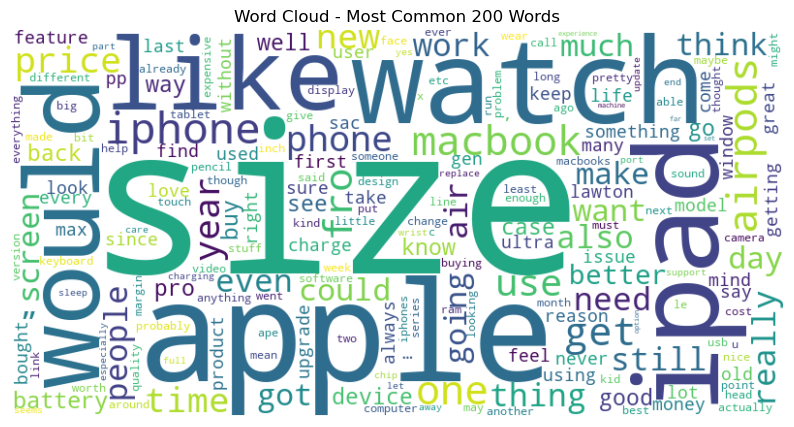

In [137]:
from wordcloud import WordCloud

all_comments = ' '.join(df['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words')
plt.show()


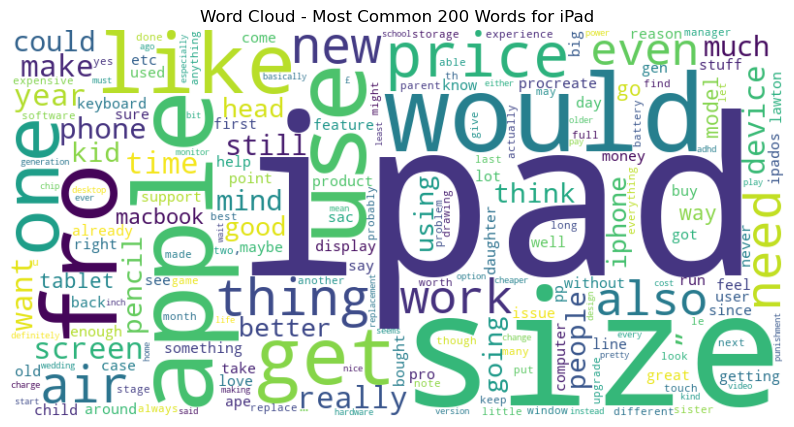

In [138]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad')
plt.show()


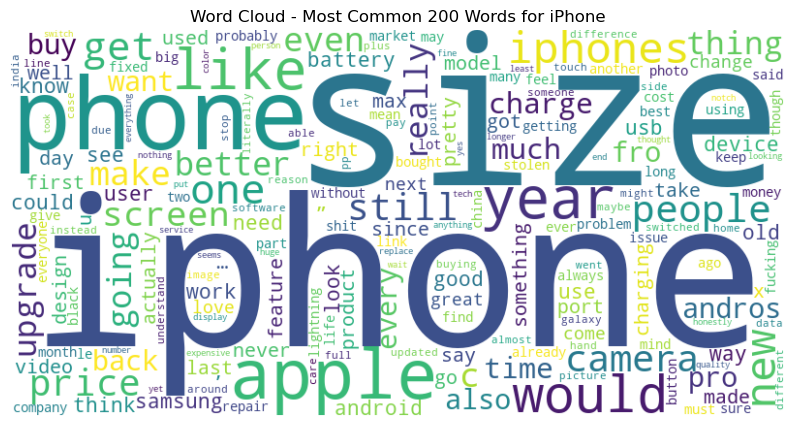

In [139]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone')
plt.show()


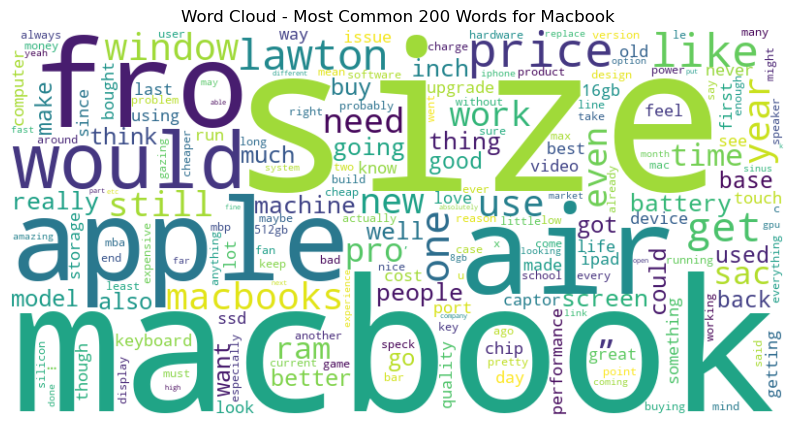

In [140]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook')
plt.show()


In [141]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch')
plt.show()


In [142]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods')
plt.show()


**24. Extracting noun phrases with TextBlob**

In [143]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases:
size year: 123
iphone size: 85
battery life: 58
series size: 52
macbook air: 46
size size: 44
apple product: 37
ipad fro: 35
new ipad: 34
new iphone: 31


In [144]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook:
macbook air: 38
size year: 32
macbook fro: 23
size macbook fro: 17
size size: 16
new macbook: 13
size macbook: 11
apple product: 9
window lawton: 9
size inch: 8


In [145]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPhone:
iphone size: 81
new iphone: 30
size year: 22
new phone: 22
usb c: 13
size size: 10
iphone user: 10
pro max: 9
size fro: 8
u c: 8


In [146]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Apple Watch:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Apple Watch:
series size: 52
battery life: 39
apple patch: 25
size year: 22
heart rate: 22
new apple: 17
size day: 14
size month: 11
regular apple: 10
size size: 9


In [147]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad:
size year: 38
new ipad: 34
ipad fro: 32
ipad air: 24
stage manager: 22
ipad size: 19
ipad mind: 14
apple pencil: 13
ipad procreate: 10
size inch: 9


In [148]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods:
airpods max: 19
pro size: 18
airpods fro size: 18
airpods fro: 17
sound quality: 13
new airpods: 11
airpods size: 10
usb c: 9
size year: 9
gen airpods: 8


**24. Performing the LDA Topic Modelling**

In [150]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_iphone['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_iphone['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_iphone['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2661475112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.021*"iphone" + 0.010*"apple" + 0.010*"like" + 0.008*"china" + 0.007*"look" + 0.007*"c" + 0.006*"video" + 0.006*"would" + 0.006*"usb" + 0.005*"iphones" | Comment Count: 60
Topic 1: 0.029*"iphone" + 0.025*"phone" + 0.013*"size" + 0.013*"apple" + 0.009*"one" + 0.009*"screen" + 0.007*"iphones" + 0.006*"…" + 0.006*"want" + 0.006*"new" | Comment Count: 135
Topic 2: 0.033*"size" + 0.032*"iphone" + 0.014*"apple" + 0.012*"camera" + 0.010*"phone" + 0.010*"would" + 0.008*"like" + 0.007*"iphones" + 0.007*"still" + 0.006*"price" | Comment Count: 161
Topic 3: 0.021*"iphone" + 0.017*"port" + 0.015*"charge" + 0.014*"iphones" + 0.013*"apple" + 0.012*"lightning" + 0.012*"c" + 0.011*"charging" + 0.010*"size" + 0.007*"usb" | Comment Count: 89
Topic 4: 0.062*"size" + 0.052*"iphone" + 0.019*"phone" + 0.013*"apple" + 0.013*"year" + 0.009*"like" + 0.009*"new" + 0.008*"would" + 0.008*"get" + 0.007*"one" | Comment Count: 555


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2661475112.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


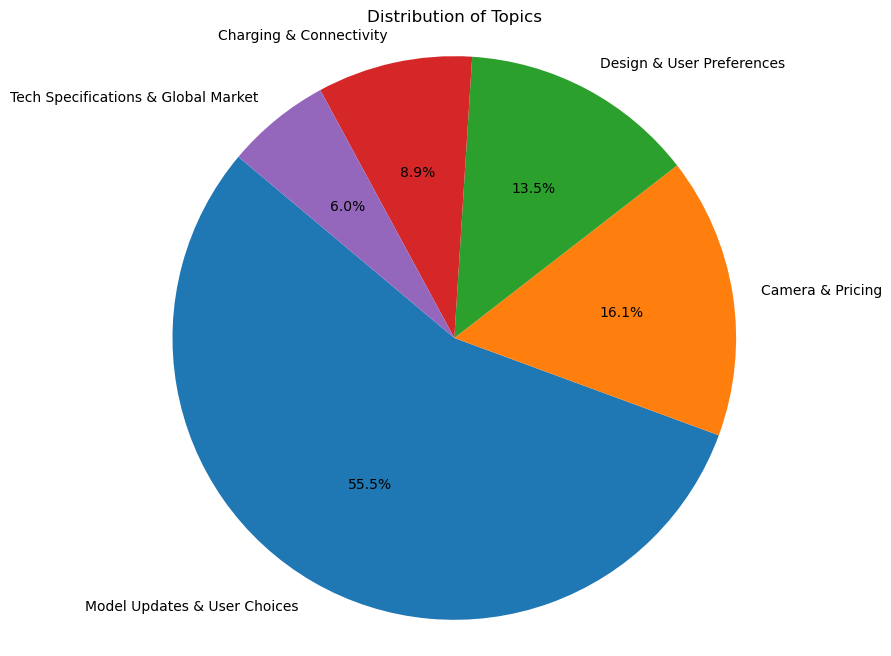

In [156]:
topic_labels = {
    0: 'Tech Specifications & Global Market',
    1: "Design & User Preferences",
    2: 'Camera & Pricing',
    3: "Charging & Connectivity",
    4: "Model Updates & User Choices"
}

topic_counts = df_iphone['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - "Tech Specifications & Global Market"**: This topic seems to focus on the technical aspects of the iPhone (like USB, video features) and its presence in global markets (noted by the mention of "China"). The words "video" and "USB" suggest a discussion about hardware features, while "China" implies a geographical or market-based context.

2. **Topic 1 - "Design & User Preferences"**: The frequent mention of "size," "screen," and "want" indicates discussions about the iPhone's design and size preferences among users. This topic likely captures conversations about the physical attributes of the iPhone that users find appealing or unappealing.

3. **Topic 2 - "Camera & Pricing"**: This topic includes words like "camera" and "price," which suggests a focus on the iPhone's camera features and its pricing strategy. Discussions here are probably centered around the quality of the iPhone camera, how it compares to other phones, and considerations of cost.

4. **Topic 3 - "Charging & Connectivity"**: The presence of words like "port," "charge," "lightning," and "USB" indicates discussions about charging methods and connectivity options in iPhones. This could involve conversations about the efficiency of charging ports, the transition from lightning to USB-C, and the general charging experience.

5. **Topic 4 - "Model Updates & User Choices"**: The dominance of words like "size," "year," "new," and "get" suggests discussions about the different iPhone models released each year, the changes or updates in these models, and the choices users make when getting a new phone. This topic probably encompasses user opinions on annual iPhone releases and their decision-making process in upgrading or choosing a model.

In [151]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_mac['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_mac['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_mac['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2265032275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.043*"size" + 0.041*"macbook" + 0.017*"fro" + 0.013*"air" + 0.011*"”" + 0.010*"apple" + 0.009*"would" + 0.009*"new" + 0.008*"still" + 0.007*"got" | Comment Count: 231
Topic 1: 0.065*"size" + 0.033*"macbook" + 0.015*"air" + 0.015*"price" + 0.014*"fro" + 0.010*"apple" + 0.009*"would" + 0.009*"ram" + 0.008*"like" + 0.008*"get" | Comment Count: 355
Topic 2: 0.034*"size" + 0.028*"macbook" + 0.013*"would" + 0.011*"apple" + 0.010*"price" + 0.009*"well" + 0.009*"year" + 0.008*"lawton" + 0.008*"air" + 0.007*"get" | Comment Count: 182
Topic 3: 0.029*"macbook" + 0.014*"size" + 0.012*"one" + 0.011*"like" + 0.010*"would" + 0.009*"window" + 0.008*"use" + 0.008*"work" + 0.008*"thing" + 0.007*"apple" | Comment Count: 174
Topic 4: 0.026*"macbook" + 0.011*"apple" + 0.006*"would" + 0.006*"like" + 0.006*"one" + 0.005*"issue" + 0.005*"macbooks" + 0.005*"look" + 0.005*"people" + 0.004*"computer" | Comment Count: 58


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2265032275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


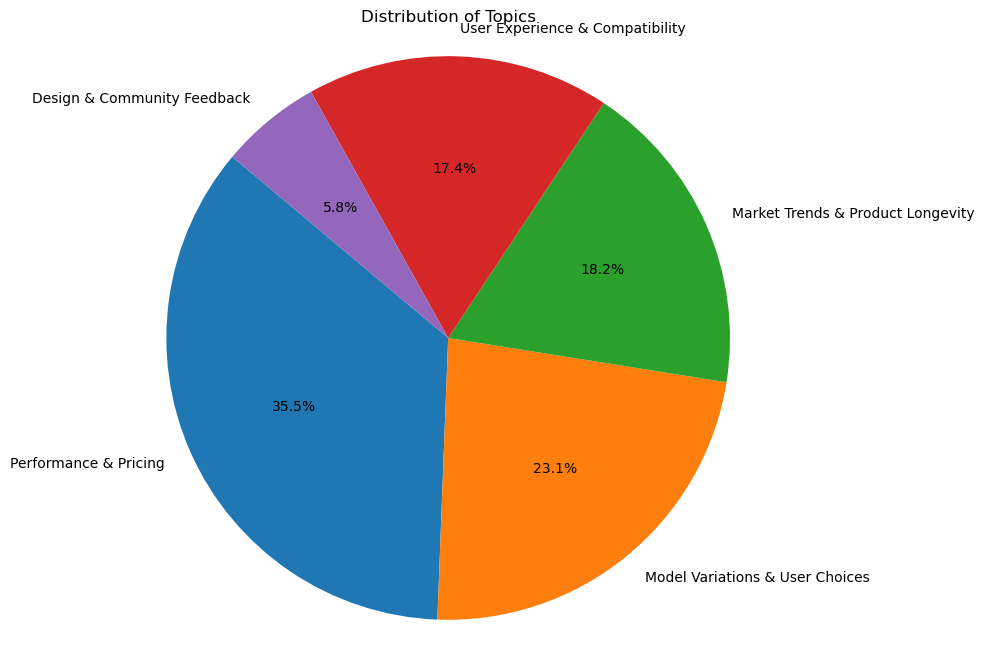

In [157]:
topic_labels = {
    0: 'Model Variations & User Choices',
    1: "Performance & Pricing",
    2: 'Market Trends & Product Longevity',
    3: "User Experience & Compatibility",
    4: "Design & Community Feedback"
}

topic_counts = df_mac['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - "Model Variations & User Choices"**: The presence of words like "size," "MacBook," "Air," and "new" suggests discussions around the different MacBook models and sizes, particularly focusing on the MacBook Air. Users are likely sharing their experiences and preferences regarding the various options available, including any new models.

2. **Topic 1 - "Performance & Pricing"**: With words like "size," "price," "RAM," and "MacBook," this topic seems to be centered around the performance aspects (like RAM) and the pricing of MacBooks. The discussion likely involves balancing the cost against the performance features of different MacBook models.

3. **Topic 2 - "Market Trends & Product Longevity"**: This topic, indicated by words like "size," "price," "year," and "MacBook," could be about how MacBooks fare over time in the market and their pricing trends. The word "year" suggests a discussion on the longevity or annual updates of MacBook models.

4. **Topic 3 - "User Experience & Compatibility"**: Keywords like "window," "use," "work," and "MacBook" indicate discussions about the user experience, possibly focusing on how MacBooks are used for work or their compatibility with other software (like Windows). It's about practical usage and how MacBooks fit into various work or personal scenarios.

5. **Topic 4 - "Design & Community Feedback"**: With mentions of "look," "people," "issue," and "MacBook," this topic likely revolves around the design aspects of MacBooks and community feedback, including any issues or concerns raised by users. This might include discussions on aesthetics, user experience, and common problems faced by MacBook owners.

In [152]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_ipad['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_ipad['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_ipad['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1621576080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.036*"ipad" + 0.016*"size" + 0.014*"apple" + 0.010*"use" + 0.007*"like" + 0.007*"fro" + 0.007*"would" + 0.007*"mind" + 0.006*"get" + 0.006*"much" | Comment Count: 166
Topic 1: 0.042*"size" + 0.037*"ipad" + 0.010*"use" + 0.010*"fro" + 0.008*"apple" + 0.008*"price" + 0.008*"get" + 0.008*"year" + 0.007*"procreate" + 0.007*"like" | Comment Count: 203
Topic 2: 0.020*"ipad" + 0.011*"phone" + 0.011*"would" + 0.009*"thing" + 0.008*"get" + 0.007*"also" + 0.006*"kid" + 0.006*"help" + 0.006*"know" + 0.005*"need" | Comment Count: 107
Topic 3: 0.042*"ipad" + 0.037*"size" + 0.014*"fro" + 0.014*"apple" + 0.012*"would" + 0.011*"use" + 0.009*"price" + 0.008*"air" + 0.008*"like" + 0.007*"one" | Comment Count: 397
Topic 4: 0.018*"ipad" + 0.012*"would" + 0.012*"one" + 0.010*"kid" + 0.010*"get" + 0.009*"like" + 0.009*"size" + 0.009*"thing" + 0.008*"daughter" + 0.008*"new" | Comment Count: 127


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1621576080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


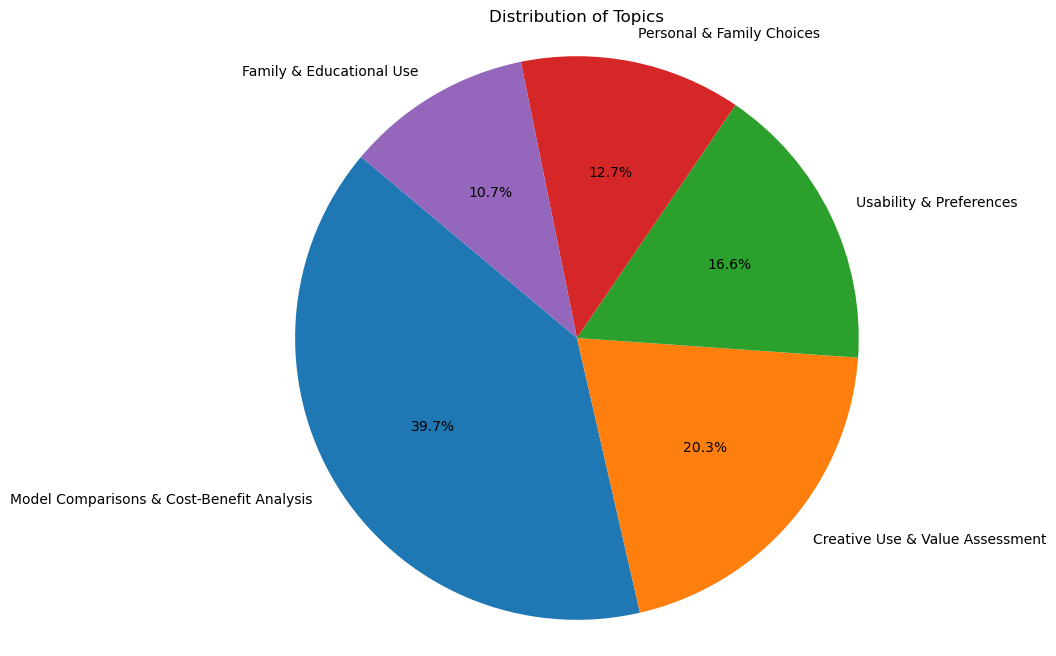

In [158]:
topic_labels = {
    0: 'Usability & Preferences',
    1: "Creative Use & Value Assessment",
    2: 'Family & Educational Use',
    3: "Model Comparisons & Cost-Benefit Analysis",
    4: "Personal & Family Choices"
}

topic_counts = df_ipad['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - "Usability & Preferences"**: This topic, with words like "size," "use," "mind," and "iPad," seems to be discussing the usability of the iPad and user preferences, particularly in terms of size and functionality. It appears to focus on how users perceive and utilize the iPad in their daily tasks.

2. **Topic 1 - "Creative Use & Value Assessment"**: The mention of "size," "use," "price," and "procreate" suggests discussions around using the iPad for creative purposes (like drawing with Procreate) and assessing its value in terms of price and features. This could include conversations about the iPad as a tool for artists and hobbyists.

3. **Topic 2 - "Family & Educational Use"**: With keywords like "phone," "kid," "help," and "iPad," this topic likely revolves around the use of iPads in family settings or for educational purposes. It could include how iPads serve as learning tools for children or as devices for family entertainment.

4. **Topic 3 - "Model Comparisons & Cost-Benefit Analysis"**: This topic, characterized by words such as "size," "price," "air," and "iPad," seems to focus on comparing different iPad models, particularly the iPad Air, and analyzing their cost relative to their features. Discussions might include considerations of which model offers the best value for specific needs.

5. **Topic 4 - "Personal & Family Choices"**: The presence of words like "kid," "daughter," "one," and "iPad" indicates discussions about personal and family choices regarding iPads. This could involve parents sharing their reasons for choosing specific iPad models for their kids or personal experiences with using iPads in a family context.

In [153]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_watch['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_watch['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_watch['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1214900019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.036*"size" + 0.034*"watch" + 0.031*"apple" + 0.011*"time" + 0.011*"like" + 0.009*"year" + 0.008*"one" + 0.007*"would" + 0.007*"also" + 0.006*"day" | Comment Count: 152
Topic 1: 0.063*"watch" + 0.040*"apple" + 0.012*"size" + 0.012*"would" + 0.010*"wear" + 0.008*"use" + 0.008*"day" + 0.008*"time" + 0.008*"like" + 0.008*"phone" | Comment Count: 393
Topic 2: 0.043*"watch" + 0.035*"apple" + 0.022*"size" + 0.008*"like" + 0.007*"one" + 0.007*"ultra" + 0.006*"margin" + 0.006*"also" + 0.006*"would" + 0.006*"day" | Comment Count: 268
Topic 3: 0.034*"size" + 0.031*"watch" + 0.030*"apple" + 0.014*"x" + 0.011*"fro" + 0.010*"like" + 0.008*"series" + 0.007*"airpods" + 0.006*"ipad" + 0.006*"work" | Comment Count: 66
Topic 4: 0.043*"size" + 0.029*"apple" + 0.029*"watch" + 0.009*"ultra" + 0.007*"time" + 0.006*"get" + 0.006*"one" + 0.006*"pp" + 0.006*"need" + 0.006*"could" | Comment Count: 121


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1214900019.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


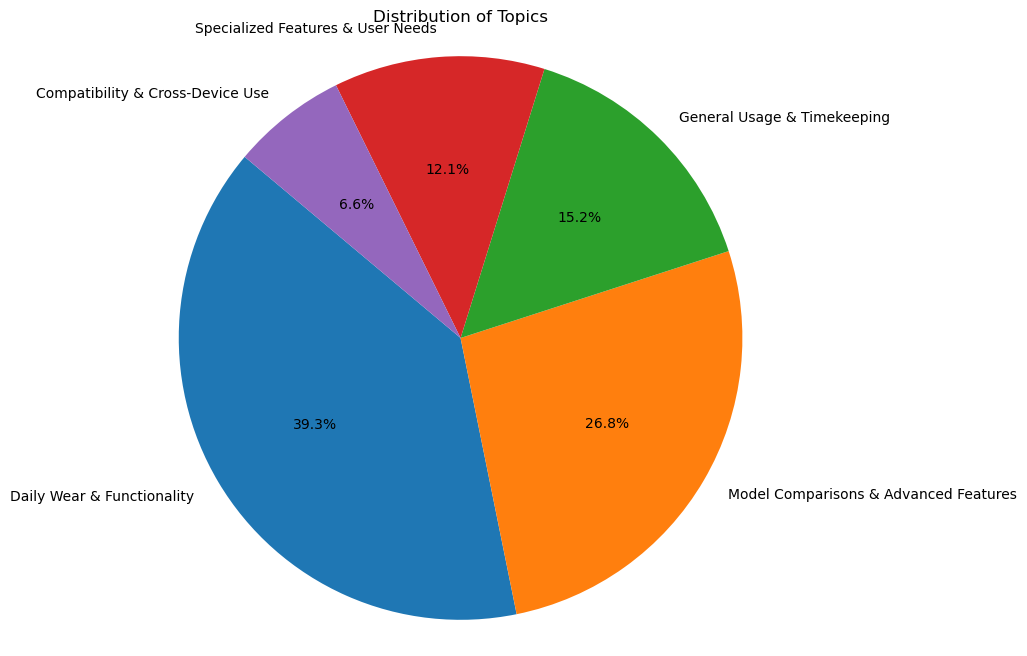

In [159]:
topic_labels = {
    0: 'General Usage & Timekeeping',
    1: "Daily Wear & Functionality",
    2: 'Model Comparisons & Advanced Features',
    3: "Compatibility & Cross-Device Use",
    4: "Specialized Features & User Needs"
}

topic_counts = df_watch['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - "General Usage & Timekeeping"**: This topic, with keywords like "time," "year," "day," and "watch," seems to focus on the general usage of the Apple Watch, particularly its timekeeping and daily wear aspects. It likely includes discussions on how the watch fits into daily routines and its utility over the years.

2. **Topic 1 - "Daily Wear & Functionality"**: With words like "wear," "use," "day," and "watch," this topic appears to be about the daily wearing experience of the Apple Watch and its functionality. Discussions might include comfort, practicality, and how the watch integrates with other devices like phones.

3. **Topic 2 - "Model Comparisons & Advanced Features"**: The presence of "ultra," "margin," and "watch" suggests discussions around specific Apple Watch models, possibly comparing features like the Apple Watch Ultra. This topic likely covers advanced features, design margins, and user preferences for different models.

4. **Topic 3 - "Compatibility & Cross-Device Use"**: With terms like "x," "fro," "airpods," "ipad," and "watch," this topic seems to revolve around the compatibility of the Apple Watch with other Apple products like AirPods and iPads, and how it works within the Apple ecosystem. It could include discussions on synchronizing devices and using the watch in conjunction with other products.

5. **Topic 4 - "Specialized Features & User Needs"**: Keywords like "ultra," "pp," "need," and "watch" indicate a focus on specialized features of the Apple Watch and how they meet specific user needs. This might involve discussions about the Apple Watch Ultra, personalization options, and considerations for different user requirements.

In [154]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_airpods['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_airpods['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_airpods['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3152854227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.030*"airpods" + 0.013*"like" + 0.010*"size" + 0.009*"one" + 0.008*"work" + 0.006*"get" + 0.006*"fro" + 0.006*"music" + 0.006*"would" + 0.006*"call" | Comment Count: 97
Topic 1: 0.050*"airpods" + 0.008*"apple" + 0.008*"get" + 0.007*"one" + 0.007*"take" + 0.006*"would" + 0.006*"like" + 0.006*"people" + 0.006*"back" + 0.005*"time" | Comment Count: 248
Topic 2: 0.047*"airpods" + 0.030*"size" + 0.015*"fro" + 0.014*"apple" + 0.010*"case" + 0.009*"max" + 0.008*"noise" + 0.007*"sound" + 0.007*"one" + 0.007*"new" | Comment Count: 378
Topic 3: 0.042*"airpods" + 0.020*"size" + 0.014*"would" + 0.012*"like" + 0.007*"case" + 0.007*"ear" + 0.006*"apple" + 0.006*"get" + 0.006*"phone" + 0.006*"headphone" | Comment Count: 198
Topic 4: 0.028*"airpods" + 0.015*"price" + 0.014*"got" + 0.014*"size" + 0.009*"get" + 0.009*"brother" + 0.008*"like" + 0.007*"anything" + 0.007*"know" + 0.006*"apple" | Comment Count: 79


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3152854227.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


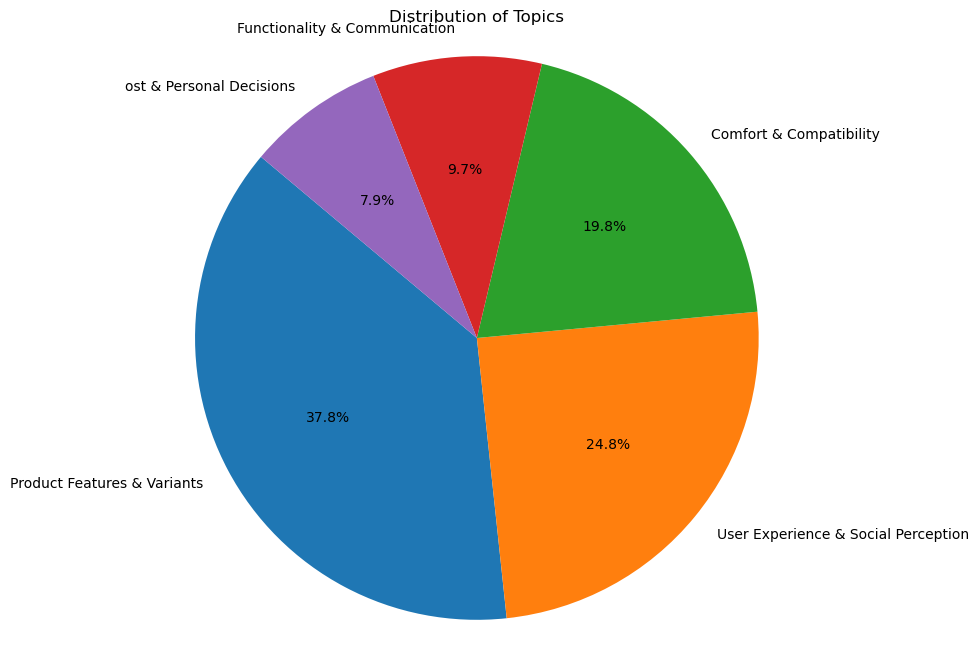

In [160]:
topic_labels = {
    0: 'Functionality & Communication',
    1: "User Experience & Social Perception",
    2: 'Product Features & Variants',
    3: "Comfort & Compatibility",
    4: "ost & Personal Decisions"
}

topic_counts = df_airpods['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - "Functionality & Communication"**: This topic, with keywords like "work," "music," "call," and "airpods," seems to focus on the functional aspects of AirPods, particularly in contexts like music listening and making calls. It likely covers how AirPods perform during everyday tasks and their effectiveness in communication.

2. **Topic 1 - "User Experience & Social Perception"**: The presence of words like "take," "people," "back," and "airpods" suggests discussions about the user experience with AirPods and how they are perceived socially. This topic might include conversations about the convenience of using AirPods and their impact on social interactions.

3. **Topic 2 - "Product Features & Variants"**: With terms like "case," "max," "noise," "sound," and "airpods," this topic appears to revolve around specific features of AirPods, such as noise cancellation and sound quality, and different variants like the AirPods Max. It likely includes discussions about the technical aspects and different models available.

4. **Topic 3 - "Comfort & Compatibility"**: Keywords like "ear," "case," "phone," and "headphone" indicate a focus on the comfort and compatibility of AirPods with other devices. This topic probably covers how AirPods fit in the ear, their case design, and how they work with phones and other headphones.

5. **Topic 4 - "Cost & Personal Decisions"**: With words like "price," "got," "brother," and "know," this topic seems to be about the pricing of AirPods and personal decisions related to purchasing them. Discussions might include considerations about whether AirPods are worth their price and anecdotes about buying them for oneself or as gifts.

**25. Conduct a sentiment analysis with VADER model**

**25.1 iPhone**

In [167]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_VADER'] = df_iphone['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_iphone[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3845702056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3845702056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

Sentiment_Comment  SentimentScore_VADER  \
4000  # * * Stop personal photo and video from poppi...                0.9628   
4001  Took , I cannot fucking stand Apple products ....               -0.9682   
4002  I worked for Apple for most of a decade , incl...                0.9711   
4003  I have the lip , literally writing this commen...                0.9914   
4004  I switched to iPhone last year after trying an...                0.9835   
...                                                 ...                   ...   
4995  The new phone are very boring and operative . ...               -0.6644   
4996  iphone X . I miss those rounded edges so much ...                0.7809   
4997  He sitting here with my iPhone [ SIZE ] and so...                0.0000   
4998  Yes ll , work in a phone shop and NEVER see bu...                0.7003   
4999  Very year iPhones have to return to their plac...                0.0000   

     SentimentCategory_VADER  
4000                Positive  
4001                Negative  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Negative  
4996                Positive  
4997                 Neutral  
4998                Positive  
4999                 Neutral  

[1000 rows x 3 columns]

In [168]:
df_iphone.SentimentScore_VADER.describe()

count    1000.000000
mean        0.149601
std         0.530113
min        -0.996100
25%        -0.275500
50%         0.131050
75%         0.620825
max         0.991400
Name: SentimentScore_VADER, dtype: float64

In [169]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 I have the flip, literally writing this comment on it.  After a year of use my review is thus:
1. I actually really like the folding capability and the type of material they use for the screen.  It feels really nice.  As someone who dropped their phone all the freaking time, I always had a cracked screen after 6 months with a phone, even with the expensive otterbox for that version of phone.  With the flip it protects the interior screen, and it's made out of a plastic instead of glass so it won't really Crack, it is more susceptible to scratching though.
2.  They NEED better screen protectors, the phone itself is fine, but I have yet to get a screen protector that doesn't get air bubbles under it or rip at the fold.  Also the exterior screen didn't come with one and now it's scratched.
3. I like having it folded to talk on speakerphone, feels more like talking on a radio or something than a phone
4. I absolutely love being able to use the flashlight and setting it down in a half ope

In [170]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 Apple users are so dumb. "Oh BuT I cAn SeE tHe ThIeF oN "FiNd My GaY iPhOnE!!!"  

What you don't realize is that when your phone gets stolen, the actual thief turns the phone off instantly and then restores it on iTunes/music and then turns off the location services, if they know what they are doing. 

After they do this they very quickly sell the phone to someone who buys iphones with blocked IMEI numbers. From there, the phone gets sold to china where they know how to bypass any security measures. 

The reason the cops can't do anything about stolen devices is because the item has most likely already been sold to someone else who has no clue it was stolen to begin with. 

There was a video on youtube about a dude who's iphone got stolen. He was tracking the iphone with the "Find my Gay iPhone" app. He ended up finding the person with the phone and beat him up real bad. The guy actually had no clue it was stolen, he was just some dude who bought the phone from someone else. The dud

In [172]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_iphone['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.2 Macbook**

In [173]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_VADER'] = df_mac['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_mac[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2233685362.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2233685362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac[

Sentiment_Comment  SentimentScore_VADER  \
2000  > is the Of that much better than the Of ? Its...                0.9984   
2001  Feeling electricity or a mild electrical sensa...                0.9478   
2002  Eight is a big deal . To not you want to take ...                0.9726   
2003  The hardware " build quality " everybody rates...                0.8916   
2004  I guns . of here . He currently use Kandji as ...                0.9778   
...                                                 ...                   ...   
2995  I thought they learned the lesson when they de...                0.0000   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...                0.4588   
2997  Honestly , my Of Macbook Fro is simply perfect...                0.7717   
2998  of manager here - this is not even close to th...               -0.5267   
2999  Late MacBook batteries when they do this ! Mus...                0.0000   

     SentimentCategory_VADER  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                 Neutral  
2996                Positive  
2997                Positive  
2998                Negative  
2999                 Neutral  

[1000 rows x 3 columns]

In [174]:
df_mac.SentimentScore_VADER.describe()

count    1000.000000
mean        0.250379
std         0.534275
min        -0.956100
25%        -0.121625
50%         0.353800
75%         0.726900
max         0.998400
Name: SentimentScore_VADER, dtype: float64

In [175]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 >is the M2 that much better than the M1? 

Its better. Matter of opinion if its 'that much better'. 

>Do you honestly think it’s worth the extra $200? 

I think the base model is worth $1000. Sucks that Apple is starting the price at $1200.  
I'd say its worth it though in that the new design looks quite good. The keyboard is very comfortable to type on. The slightly taller screen is very nice even if its just to place the menu bar, you are still getting a bit more screen space for the desktop. The webcam is nicer. The M2 is very impressive and a tad better in performance than the M1. The battery life is truly amazing. The new color options are very stylish. 

>I keep hearing that they only support their laptops for like 5 yrs, so I’m assuming they will support their M2 for a longer period of time.

Yea, in recent times, Apple has given devices a solid 5 years of OS support. Potentially a good 7 years depending on how drastically different the newer OS iterations will be by that poi

In [176]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 I don’t understand why this is a thing. A metal chassis is either grounded or it’s supposed to be at ground potential and connected to circuit ground, which in DC circuits should be at zero volts and should be traveling out of the “ground” or negative line back to the power supply. Feeling current when touching it means the chassis/PSU is no longer the path of least resistance, *you* are. Current always follows the path of least resistance. 

In the US, the third “ground” plug doesn’t actually go back to earth anywhere, it’s simply a short circuit path back to the neutral so that stray AC currents that touch the chassis go back to neutral, and theoretically pop the breaker if they’re bad enough. If the MacBook doesn’t do this when connected to the third pin in a “grounded” plug, then there are stray currents leaking in the MacBook and there’s something wrong with the PSU design. “My Dell does it too” as some commenters have said isn’t an excuse as much as it is indicative of an indus

In [177]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_mac['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.3 iPad**

In [178]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_VADER'] = df_ipad['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_ipad[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/571326633.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/571326633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad

Sentiment_Comment  SentimentScore_VADER  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...                0.9975   
3001  Not To say , I disagree pretty whole - heartil...                0.9990   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...                0.9985   
3003  * * " There is no bad product , just bad price...                0.9933   
3004  I think you answered your own question . Of pu...               -0.9916   
...                                                 ...                   ...   
3995  Of you moderately push on the right side of th...                0.1280   
3996  Result : Yelled at / grounded / no video games...               -0.8706   
3997  I am beyond impressed with mine . The older i ...                0.7783   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...                0.4840   
3999  I had this exact same thing happen to me a few...                0.2732   

     SentimentCategory_VADER  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Negative  
...                      ...  
3995                Positive  
3996                Negative  
3997                Positive  
3998                Positive  
3999                Positive  

[1000 rows x 3 columns]

In [179]:
df_ipad.SentimentScore_VADER.describe()

count    1000.000000
mean        0.305736
std         0.655005
min        -0.994800
25%        -0.310025
50%         0.564400
75%         0.882175
max         0.999000
Name: SentimentScore_VADER, dtype: float64

In [180]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 Gotta say, I disagree pretty whole-heartedly with this article. I have been really enjoying stage manager, and it actually convinced me not to get the new MacBook Air (I’ve been living without a personal Mac for a while now, considering my iPad is already better than my 2015 MacBook).

>	An iPad that lets users run as many windows on one screen as they want, like a Mac, would be terrific

Yea, that’d be nice if it worked well. Apple claims it doesn’t, and that they have to limit the number of running apps so that every app remains immediately responsive to touch no matter the circumstances. That’s an important goal in my opinion, though I can’t comment on how truthful their claim is that you can’t go beyond their limits without breaking that promise. I do think that they probably should let you have 8 to a group, at least in full screen mode - I find that the iPad screen itself isn’t very useful when plugged in and would rather put all 8 of my apps on the external monitor.

>	The abi

In [181]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 Apple terms of Vintage is SEVEN years and Obsolete is NINE years. This applies to computers and i-devices.

I have an iPad Air that was three years old, and one month past Applecare+ warranty. It stopped charging. The power management chip failed and would cost $300 to repair, or send it out to a 3rd party for $250 repair + sh. It was $349 to replace with newer model (still working). I swear Apple knew of this power management chip issue but no recall ever occurred. 

 I seem to be accumulating Apple junk... (dead iPad, dead iPods, dead iphones, dead iMac, dead MacbookAir, dead macbook (white), dead G4 and G5 Macpro... )..
1 I think you answered your own question. If punishment for situations like this caused you lifelong guilt, why would you want your child who shares your disorder to have lifelong guilt or worse as well?

I was completely undiagnosed as a child so my situation was different from your child, who you know has ADHD. I also know this next part is probably easier said t

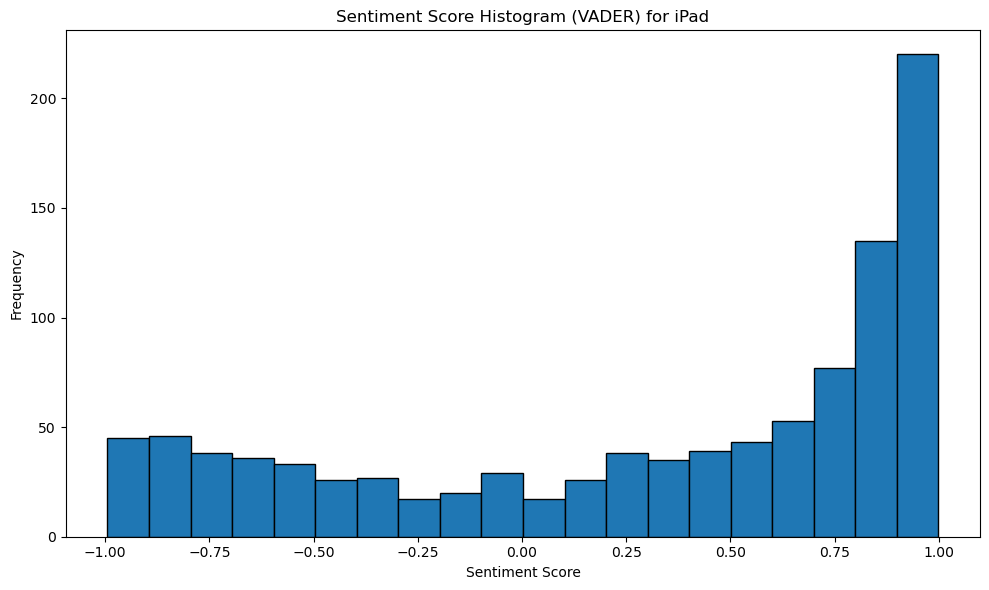

In [182]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_ipad['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.4 AirPods**

In [183]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_VADER'] = df_airpods['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_airpods[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1128605631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1128605631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Sentiment_Comment  SentimentScore_VADER  \
0    Comparing these to my AirPods Max … Bony has b...                0.9995   
1    His was a mistake . But it is [ SIZE ] % your ...               -0.9929   
2    Wait so the only person who cared enough about...                0.7199   
3    Picked up the Fro gen is today as well , migra...                0.9845   
4    I all , I would like to warn anyone buying Air...                0.9808   
..                                                 ...                   ...   
995  You want to ruin your hearing , wear airpods w...               -0.5423   
996  In india airpods are for [ SIZE ] $ after so m...                0.0000   
997  Must throw on transparent mode and your AirPod...                0.0000   
998  when i drop it , the airpods always fall out o...               -0.2732   
999  Would love to see the ability to play losses o...                0.7351   

    SentimentCategory_VADER  
0                  Positive  
1                  Negative  
2                  Positive  
3                  Positive  
4                  Positive  
..                      ...  
995                Negative  
996                 Neutral  
997                 Neutral  
998                Negative  
999                Positive  

[1000 rows x 3 columns]

In [184]:
df_airpods.SentimentScore_VADER.describe()

count    1000.000000
mean        0.111140
std         0.542497
min        -0.992900
25%        -0.320375
50%         0.103200
75%         0.579050
max         0.999500
Name: SentimentScore_VADER, dtype: float64

In [185]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
In conclusion, the AirPods Max and Sony XM5 are at the top. It really boils down to this despite the differences between the two... If you have an iPhone, get the AirPods Max. If you have an Android phone, get the Sony XM5s.
1 Lossless support/better sound quality would be nice, but honestly I’ve never found myself for wishing for that - my AirPods are great at being an awesome portable experience, if I want great audio quality I just sit at my desk with a good pair of over-head headphones. Not that I’m complaining but I don’t think I would see it as a reason to upgrade.  

Proper Find My integration would be great, hopefully it’s not just the case being able to make a sound but also the location tracking. It would be amazing to have it for the buds as well but I doubt the hardware can be scaled down that much. Still unless the design changes a lot I can see Apple also just selling the upgraded case.  

I do wish they focuses 

In [186]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 This was a mistake. But it’s 99% your wife’s mistake. You left your AirPods in your own lunchbox, you’re wife doesn’t usually clean it for you, and there was no reason you should have anticipated she would in this situation. So if you want the validation of an internet stranger you got it. 

But if your wife doesn’t want to admit it and wants to blame you, then you have to ask yourself what is more important to you. Take the L and move on (knowing deep down that you aren’t to blame) or force the issue and have at least a conversation with your wife. I’m not saying one is definitely better than the other. It depends on a lot more than this one incident, and I’d think about the following:

Is this normal for your wife? Does she usually seek to assign blame for accidents and does she usually assign the blame to you? Does she normally take accountability when she does something wrong? If this is out of character then ask yourself why it’s important for her in this moment to blame you. Is

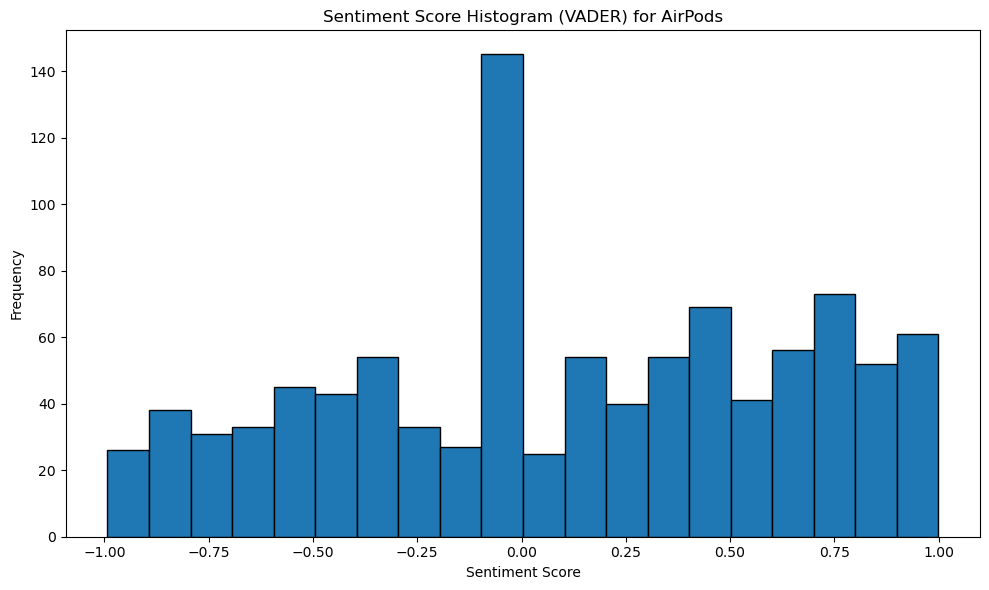

In [187]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_airpods['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.5 Apple Watch**

In [188]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_VADER'] = df_watch['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_watch[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1356089718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1356089718.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

Sentiment_Comment  SentimentScore_VADER  \
1000  It this point it is really a matter of prefere...                0.9975   
1001  Honestly , this is difficult to answer . Until...                0.9918   
1002  Smart watch enthusiast here , I have been usin...                0.9966   
1003  I discovered this year that I have had insomni...               -0.8367   
1004  Aimed engineer here and boy do I got several p...                0.9108   
...                                                 ...                   ...   
1995  I love my Apple Watch ! When I worked in the h...                0.6114   
1996  Why is generally apple watch battery life so l...                0.5265   
1997  I am buying it for the bigger size . Wounds si...                0.6187   
1998  Of you want a Apple Watch you do not have to b...               -0.6486   
1999  Had take . I work in finance and [ SIZE ] % of...                0.6088   

     SentimentCategory_VADER  
1000                Positive  
1001                Positive  
1002                Positive  
1003                Negative  
1004                Positive  
...                      ...  
1995                Positive  
1996                Positive  
1997                Positive  
1998                Negative  
1999                Positive  

[1000 rows x 3 columns]

In [189]:
df_watch.SentimentScore_VADER.describe()

count    1000.000000
mean        0.341552
std         0.558863
min        -0.990100
25%         0.000000
50%         0.508300
75%         0.816275
max         0.997500
Name: SentimentScore_VADER, dtype: float64

In [190]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 At this point it's really a matter of preference and platform.

Garmin has a special place in my heart as my first Garmin I had 10 years ago I used to train for a marathon, which then realized was too much work and backed out last minute and ran the 5K and got first place for my age group. But the thing is, there was no metrics out side of just distance. Not even heart rate.

I've tried 3 different Garmin over the last year (Fenix 6, Forerunner 245 Music, Forerunner 955) and after the initial excitement wears off, I just don't think the value is there. I continue to have the original instinct, which bye far is my favorite watch I every owned and wear it occasionally. Body battery, readiness, training status are all great things, but anyone who is mildly seriously about fitness is pretty good about knowing how they feel. If my watch says I'm not ready, but I feel good and I know I can rest appropriately in the day after, I'm going to run. As mentioned, alot of the metrics on Garmin ar

In [191]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 My doctors completely dismissed my PoTS and heart problems until I got an Apple Watch. I got the watch to track my exercises and overall daily activity, but it showed my HR going up to 170 and dropping to 25 right as I had a fainting episode. I am so glad I finally had proof of my heart problems.

I went to three different doctors at my doctors office. The doctors kept dismissing me when I said I had chest pains and was blacking out. They said it was anxiety and panic. I was like “I know what anxiety and panic attacks feel like, this is not it.” 

Never let your general practitioners or specialists know you have PTSD. It doesn’t matter that lifelong child abuse is actually linked to multiple illnesses and lifelong physical health problems. They will only use it to dismiss and invalidate you. I ended up having multiple heart problems. Probably because I was exposed to meth as an infant and toddler. I have had symptoms my entire life but I didn’t know what they meant, and everyone just

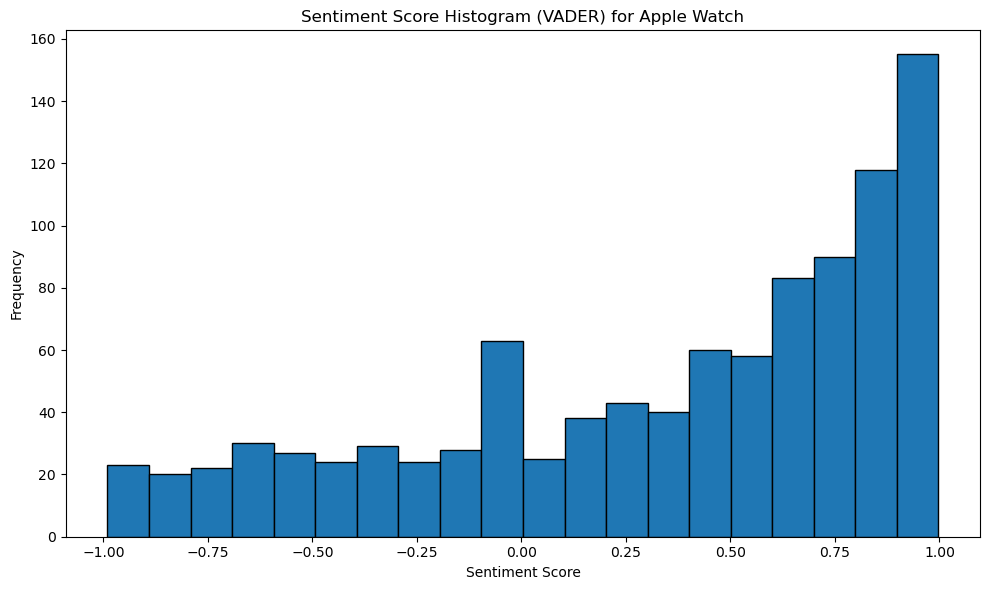

In [192]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_watch['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**26. Conduct a sentiment analysis with TextBlob sentiment classifier**

***26.1. iPhone***

In [193]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

def get_sentiment_textblob(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment
    if sentiment.p_pos >= 0.6:
        return "Positive"
    elif sentiment.p_neg >= 0.6:
        return "Negative"
    return "Neutral"

df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)

df_iphone[['Sentiment_Comment', 'SentimentCategory_Bayes']]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2934576485.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
4000  # * * Stop personal photo and video from poppi...   
4001  Took , I cannot fucking stand Apple products ....   
4002  I worked for Apple for most of a decade , incl...   
4003  I have the lip , literally writing this commen...   
4004  I switched to iPhone last year after trying an...   
...                                                 ...   
4995  The new phone are very boring and operative . ...   
4996  iphone X . I miss those rounded edges so much ...   
4997  He sitting here with my iPhone [ SIZE ] and so...   
4998  Yes ll , work in a phone shop and NEVER see bu...   
4999  Very year iPhones have to return to their plac...   

     SentimentCategory_Bayes  
4000                Positive  
4001                Negative  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Negative  
4996                Positive  
4997                 Neutral  
4998                Negative  
4999                Positive  

[1000 rows x 2 columns]

In [194]:
df_iphone[df_iphone.SentimentCategory_Bayes != df_iphone.SentimentCategory_VADER]

Search                                            Comment  \
4005  iPhone  Apple users are so dumb. "Oh BuT I cAn SeE tHe...   
4007  iPhone  I'm sick of brain dead Apple fans thinking the...   
4009  iPhone  Very interesting. I don't think this should ha...   
4010  iPhone  From the article: The Brazilian Ministry of Ju...   
4012  iPhone  >\tStaab issued the search warrant the day aft...   
...      ...                                                ...   
4992  iPhone  I love how the iPhone looks like it has a crac...   
4993  iPhone  That's a hard pass straight for the iPhone, wh...   
4994  iPhone  If i was that girl i would stay atleast 10 met...   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
4005  apple user dumb oh thief iphone realize phone ...   
4007  sick brain dead apple fan thinking upgrade eve...   
4009  interesting think happen device know community...   
4010  article brazilian ministry justice ordered sep...   
4012  stab issued search warrant day white truck tex...   
...                                                 ...   
4992  love iphone look like crack screen true classi...   
4993        hard pas straight iphone would sell apple ™   
4994  girl would stay least size peter away smoking ...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  \
4005  Apple users are so dumb . " Oh but I can he th...    1549   
4007  I am sick of brain dead Apple fan thinking the...    1530   
4009  Very interesting . I do not think this should ...    1405   
4010  From the article : The Brazilian Ministry of J...    1349   
4012  > Stab issued the search warrant the day after...    1161   
...                                                 ...     ...   
4992  I love how the iPhone looks like it has a crac...      84   
4993  That is a hard pass straight for the iPhone , ...      84   
4994  Of i was that girl i would stay least [ SIZE ]...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  Very year iPhones have to return to their plac...      83   

                                      Tokenized_Comment  Topic  \
4005  [apple, user, dumb, oh, thief, iphone, realize...      4   
4007  [sick, brain, dead, apple, fan, thinking, upgr...      2   
4009  [interesting, think, happen, device, know, com...      4   
4010  [article, brazilian, ministry, justice, ordere...      3   
4012  [stab, issued, search, warrant, day, white, tr...      4   
...                                                 ...    ...   
4992  [love, iphone, look, like, crack, screen, true...      0   
4993  [hard, pas, straight, iphone, would, sell, app...      4   
4994  [girl, would, stay, least, size, peter, away, ...      4   
4998  [yes, work, phone, shop, never, see, burn, iph...      2   
4999  [year, iphones, return, place, birth, annual, ...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
4005               -0.9961                Negative                Positive  
4007               -0.9419                Negative                Positive  
4009               -0.2361                Negative                 Neutral  
4010               -0.2500                Negative                Positive  
4012               -0.8930                Negative                Positive  
...                    ...                     ...                     ...  
4992                0.8687                Positive                 Neutral  
4993                0.1280                Positive                 Neutral  
4994                0.0000                 Neutral                Negative  
4998                0.7003                Positive                Negative  
4999                0.0000                 Neut

***26.2. Macbook***

In [195]:
df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)

df_mac[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3820655831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
2000  > is the Of that much better than the Of ? Its...   
2001  Feeling electricity or a mild electrical sensa...   
2002  Eight is a big deal . To not you want to take ...   
2003  The hardware " build quality " everybody rates...   
2004  I guns . of here . He currently use Kandji as ...   
...                                                 ...   
2995  I thought they learned the lesson when they de...   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...   
2997  Honestly , my Of Macbook Fro is simply perfect...   
2998  of manager here - this is not even close to th...   
2999  Late MacBook batteries when they do this ! Mus...   

     SentimentCategory_Bayes  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                Positive  
2996                Negative  
2997                Positive  
2998                Negative  
2999                Negative  

[1000 rows x 2 columns]

In [196]:
df_mac[df_mac.SentimentCategory_Bayes != df_mac.SentimentCategory_VADER]

Search                                            Comment  \
2007  Macbook  I've been very disappointed by reviews being t...   
2009  Macbook  I don't like the black - I like the space grey...   
2017  Macbook  I actually got a free MacBook Pro upgrade from...   
2020  Macbook  This era of MBP is literally the worst era of ...   
2028  Macbook  It's not just about the hardware and the price...   
...       ...                                                ...   
2992  Macbook  Damn Im staring to get confused with Macbook l...   
2994  Macbook  Too close to the price of the 14” MacBook Pro ...   
2995  Macbook  I thought they learned the lesson when they de...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2999  Macbook  Hate MacBook batteries when they do this! Just...   

                                        Cleaned_Comment  \
2007  disappointed review complacent apple charging ...   
2009  like black like space grey unique boring capto...   
2017  actually got free macbook fro upgrade exact th...   
2020  era mbp literally worst era macbook fro touchb...   
2028  hardware price edu market passively cheap chro...   
...                                                 ...   
2992  damn staring get confused macbook line imagine...   
2994  close price size ” macbook fro would rather pa...   
2995  thought learned lesson decided remove touch ba...   
2996  laughed size macbook pro throttle 800mhz size ...   
2999  late macbook battery must paid size old sac ba...   

                                      Sentiment_Comment  Length  \
2007  I have been very disappointed by reviews being...    1529   
2009  I do not like the black - I like the space gre...    1459   
2017  I actually got a free MacBook Fro upgrade from...    1234   
2020  His era of MBP is literally the worst era of M...    1179   
2028  It is not just about the hardware and the pric...    1057   
...                                                 ...     ...   
2992  Damn I Am staring to get confused with Macbook...      92   
2994  Too close to the price of the [ SIZE ] ” MacBo...      92   
2995  I thought they learned the lesson when they de...      92   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92   
2999  Late MacBook batteries when they do this ! Mus...      92   

                                      Tokenized_Comment  Topic  \
2007  [disappointed, review, complacent, apple, char...      1   
2009  [like, black, like, space, grey, unique, borin...      1   
2017  [actually, got, free, macbook, fro, upgrade, e...      0   
2020  [era, mbp, literally, worst, era, macbook, fro...      3   
2028  [hardware, price, edu, market, passively, chea...      2   
...                                                 ...    ...   
2992  [damn, staring, get, confused, macbook, line, ...      0   
2994  [close, price, size, ”, macbook, fro, would, r...      1   
2995  [thought, learned, lesson, decided, remove, to...      3   
2996  [laughed, size, macbook, pro, throttle, 800mhz...      0   
2999  [late, macbook, battery, must, paid, size, old...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
2007               -0.8478                Negative                Positive  
2009               -0.8595                Negative                Positive  
2017               -0.8551                Negative                Positive  
2020                0.7493                Positive                Negative  
2028                0.5927                Positive                 Neutral  
...                    ...                     ...                     ...  
2992               -0.6124                Negative                 Neutral  
2994               -0.1027                Negative                Positive  
2995                0.0000                 Neutral                Positive  
2996                0.4588                Positive                Negative  
2999                0.0000          

***26.3. iPad***

In [197]:
df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)

df_ipad[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/691724193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...   
3001  Not To say , I disagree pretty whole - heartil...   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...   
3003  * * " There is no bad product , just bad price...   
3004  I think you answered your own question . Of pu...   
...                                                 ...   
3995  Of you moderately push on the right side of th...   
3996  Result : Yelled at / grounded / no video games...   
3997  I am beyond impressed with mine . The older i ...   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...   
3999  I had this exact same thing happen to me a few...   

     SentimentCategory_Bayes  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Positive  
...                      ...  
3995                 Neutral  
3996                Negative  
3997                Positive  
3998                Positive  
3999                Positive  

[1000 rows x 2 columns]

In [198]:
df_ipad[df_ipad.SentimentCategory_Bayes != df_ipad.SentimentCategory_VADER]

Search                                            Comment  \
3004   iPad  I think you answered your own question. If pun...   
3009   iPad  I think sitting down with her and talking abou...   
3013   iPad  Gonna go against the grain on this one, may be...   
3017   iPad  This, probably, requires a little bit of infor...   
3019   iPad  Im about to totally change how you parent. \nT...   
...     ...                                                ...   
3990   iPad  Best bet if there was money to be made by offe...   
3991   iPad  Keeping the 1st Gen Pencil and old Smart Conne...   
3992   iPad  Imma hold on to this iPad Pro 2020 and my iPho...   
3993   iPad  unnecessary cord. the new ipad comes with a ti...   
3995   iPad  If you moderately push on the right side of th...   

                                        Cleaned_Comment  \
3004  think answered question punishment situation l...   
3009  think sitting talking frustration breaking thi...   
3013  going go grain one may downvoted hell reading ...   
3017  probably requires little bit information advan...   
3019  totally change parent difference punishment di...   
...                                                 ...   
3990  west bet money made offering would data know m...   
3991  keeping st men pencil old smart connector make...   
3992  going hold ipad fro size iphone12 long new stu...   
3993  unnecessary cord new ipad come tiny adapted li...   
3995  moderately push right side back ipad air get r...   

                                      Sentiment_Comment  Length  \
3004  I think you answered your own question . Of pu...    3477   
3009  I think sitting down with her and talking abou...    2526   
3013  Going To go against the grain on this one , ma...    2211   
3017  His , probably , requires a little bit of info...    1992   
3019  I Am about to totally change how you parent . ...    1848   
...                                                 ...     ...   
3990  West bet if there was money to be made by offe...     288   
3991  Keeping the st Men Pencil and old Smart Connec...     287   
3992  I Am Going To hold on to this iPad Fro [ SIZE ...     287   
3993  unnecessary cord . the new ipad comes with a t...     287   
3995  Of you moderately push on the right side of th...     286   

                                      Tokenized_Comment  Topic  \
3004  [think, answered, question, punishment, situat...      2   
3009  [think, sitting, talking, frustration, breakin...      4   
3013  [going, go, grain, one, may, downvoted, hell, ...      2   
3017  [probably, requires, little, bit, information,...      4   
3019  [totally, change, parent, difference, punishme...      2   
...                                                 ...    ...   
3990  [west, bet, money, made, offering, would, data...      3   
3991  [keeping, st, men, pencil, old, smart, connect...      3   
3992  [going, hold, ipad, fro, size, iphone12, long,...      0   
3993  [unnecessary, cord, new, ipad, come, tiny, ada...      2   
3995  [moderately, push, right, side, back, ipad, ai...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
3004               -0.9916                Negative                Positive  
3009                0.9957                Positive                Negative  
3013               -0.6161                Negative                Positive  
3017               -0.8622                Negative                Positive  
3019               -0.8911                Negative                Positive  
...                    ...                     ...                     ...  
3990               -0.4019                Negative                Positive  
3991               -0.2732                Negative                Positive  
3992                0.0000                 Neutral                Positive  
3993               -0.3612                Negative                Positive  
3995                0.1280                Positive        

***26.4. AirPods***

In [199]:
df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)

df_airpods[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2190496483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment SentimentCategory_Bayes
0    Comparing these to my AirPods Max … Bony has b...                Positive
1    His was a mistake . But it is [ SIZE ] % your ...                Positive
2    Wait so the only person who cared enough about...                Positive
3    Picked up the Fro gen is today as well , migra...                Positive
4    I all , I would like to warn anyone buying Air...                Positive
..                                                 ...                     ...
995  You want to ruin your hearing , wear airpods w...                 Neutral
996  In india airpods are for [ SIZE ] $ after so m...                Positive
997  Must throw on transparent mode and your AirPod...                Negative
998  when i drop it , the airpods always fall out o...                 Neutral
999  Would love to see the ability to play losses o...                Positive

[1000 rows x 2 columns]

In [200]:
df_airpods[df_airpods.SentimentCategory_Bayes != df_airpods.SentimentCategory_VADER]

Search                                            Comment  \
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
14   AirPods  I had issues with multiple pairs of these, fro...   
18   AirPods  We’re having the same issue in my hospital wit...   
22   AirPods  As a HUC, I had a preceptee taking personal ca...   
25   AirPods  From the article: Apple may be using the Septe...   
..       ...                                                ...   
994  AirPods  If you ever drop your AirPods into the Aegean ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   

                                       Cleaned_Comment  \
1    mistake size wife ’ mistake left airpods lunch...   
14   issue multiple pair time bought december size ...   
18   issue hospital ev wear headphone coemnintkt ro...   
22   huc precept taking personal call desk airpods ...   
25   article apple may using september size iphone ...   
..                                                 ...   
994        ever drop airpods began tea let go man gone   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   

                                     Sentiment_Comment  Length  \
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
14   I had issues with multiple pairs of these , fr...    1324   
18   He are having the same issue in my hospital wi...    1273   
22   Is a HUC , I had a precepts taking personal ca...    1162   
25   From the article : Apple may be using the Sept...    1077   
..                                                 ...     ...   
994  Of you ever drop your AirPods into the Began T...      89   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   

                                     Tokenized_Comment  Topic  \
1    [mistake, size, wife, ’, mistake, left, airpod...      2   
14   [issue, multiple, pair, time, bought, december...      2   
18   [issue, hospital, ev, wear, headphone, coemnin...      1   
22   [huc, precept, taking, personal, call, desk, a...      3   
25   [article, apple, may, using, september, size, ...      2   
..                                                 ...    ...   
994  [ever, drop, airpods, began, tea, let, go, man...      1   
995  [want, ruin, hearing, wear, airpods, get, rati...      2   
996  [india, airpods, size, many, tax, station, wal...      2   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      3   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
1                 -0.9929                Negative                Positive  
14                -0.9705                Negative                Positive  
18                -0.4358                Negative                Positive  
22                -0.7402                Negative                Positive  
25                 0.0000                 Neutral                Positive  
..                    ...                     ...                     ...  
994               -0.2732                Negative                 Neutral  
995               -0.5423                Negative                 Neutral  
996                0.0000                 Neutral                Positive  
997                0.0000                 Neutral                Negative  
998               -0.2732                Negative                 Neutral  

[534 rows x 10 co

***26.5. Apple Watch***

In [201]:
df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)

df_watch[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1921659000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
1000  It this point it is really a matter of prefere...   
1001  Honestly , this is difficult to answer . Until...   
1002  Smart watch enthusiast here , I have been usin...   
1003  I discovered this year that I have had insomni...   
1004  Aimed engineer here and boy do I got several p...   
...                                                 ...   
1995  I love my Apple Watch ! When I worked in the h...   
1996  Why is generally apple watch battery life so l...   
1997  I am buying it for the bigger size . Wounds si...   
1998  Of you want a Apple Watch you do not have to b...   
1999  Had take . I work in finance and [ SIZE ] % of...   

     SentimentCategory_Bayes  
1000                Positive  
1001                Positive  
1002                Positive  
1003                Positive  
1004                Positive  
...                      ...  
1995                Positive  
1996                Positive  
1997                Positive  
1998                Negative  
1999                Positive  

[1000 rows x 2 columns]

In [202]:
df_watch[df_watch.SentimentCategory_Bayes != df_watch.SentimentCategory_VADER]

Search                                            Comment  \
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1008  Apple Watch  Source: [9to5mac](https://9to5mac.com/2022/10/...   
1011  Apple Watch  So I guess no one is supposed to notice that t...   
1018  Apple Watch  I wish Apple watches were compatible with Andr...   
1020  Apple Watch  In short, with an iPhone at your side it’s kin...   
...           ...                                                ...   
1986  Apple Watch  I have had an Apple Watch since the series 3 c...   
1987  Apple Watch  I have my doubts as the series 7 just changed ...   
1989  Apple Watch  My Garmin Instinct does this. This isn't some ...   
1990  Apple Watch  Ask him to send you a video of how the apple w...   
1991  Apple Watch  I’ve never worn a case on my Apple Watch and I...   

                                        Cleaned_Comment  \
1003  discovered year insomnia long time acknowledge...   
1008  source 9to5mac link full next apple watch seri...   
1011  guess one supposed notice background appear ma...   
1018  wish apple watch compatible android phone wear...   
1020  short iphone side kind redundant need better f...   
...                                                 ...   
1986  apple watch since series size came used third ...   
1987  doubt series size changed size mmm display goi...   
1989  margin instinct fancy apple watch thing would ...   
1990  ask send video apple watch work usually tell f...   
1991  never worn case apple watch rocked series size...   

                                      Sentiment_Comment  Length  \
1003  I discovered this year that I have had insomni...    3674   
1008  Source : [ 9to5mac ] ( [ LINK ] Full Next : In...    2457   
1011  To I guess no one is supposed to notice that t...    2117   
1018  I wish Apple watches were compatible with Andr...    1637   
1020  In short , with an iPhone at your side it is k...    1606   
...                                                 ...     ...   
1986  I have had an Apple Watch since the series [ S...     175   
1987  I have my doubts as the series [ SIZE ] just c...     175   
1989  My Margin Instinct does this . His is not some...     175   
1990  Ask him to send you a video of how the apple w...     174   
1991  I have never worn a case on my Apple Watch and...     174   

                                      Tokenized_Comment  Topic  \
1003  [discovered, year, insomnia, long, time, ackno...      1   
1008  [source, 9to5mac, link, full, next, apple, wat...      2   
1011  [guess, one, supposed, notice, background, app...      2   
1018  [wish, apple, watch, compatible, android, phon...      4   
1020  [short, iphone, side, kind, redundant, need, b...      0   
...                                                 ...    ...   
1986  [apple, watch, since, series, size, came, used...      3   
1987  [doubt, series, size, changed, size, mmm, disp...      0   
1989  [margin, instinct, fancy, apple, watch, thing,...      1   
1990  [ask, send, video, apple, watch, work, usually...      2   
1991  [never, worn, case, apple, watch, rocked, seri...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
1003               -0.8367                Negative                Positive  
1008               -0.4675                Negative                Positive  
1011               -0.0618                Negative                Positive  
1018                0.5849                Positive                 Neutral  
1020               -0.9373                Negative                Positive  
...                    ...                     ...                     ...  
1986                0.6808                Positive                Negative  
1987               -0.2960                Negative                Positive  
1989                0.0000                 Neutral                Negative  
1990               -0.2500                Negative                 Ne

**27. Conduct a sentiment analysis with SocialSent**

In [203]:
df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]
df_lex

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [204]:
df_lex["sentiment"].describe()

count    4924.000000
mean        0.000014
std         0.737869
min        -3.900000
25%        -0.290000
50%         0.050000
75%         0.350000
max         2.760000
Name: sentiment, dtype: float64

In [205]:
df_lex.sort_values(by='sentiment', ascending=True)

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [206]:
df_lex.sort_values(by='sentiment', ascending=False)

word  sentiment  std.dev
4923  wonderful       2.76     0.71
4922  beautiful       2.73     0.69
4921   delicate       2.72     0.93
4920   romantic       2.70     0.76
4919  perfectly       2.69     0.83
...         ...        ...      ...
4         drunk      -3.28     1.16
3      terrible      -3.38     1.55
2        intent      -3.49     1.67
1       painful      -3.69     1.53
0          ugly      -3.90     1.16

[4924 rows x 3 columns]

In [207]:
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
  mapping[row["word"]] = row["sentiment"]
mapping

{'ugly': -3.9,
 'painful': -3.69,
 'intent': -3.49,
 'terrible': -3.38,
 'drunk': -3.28,
 'tragedy': -3.26,
 'awful': -3.21,
 'weak': -3.12,
 'worst': -3.1,
 'accident': -3.03,
 'nightmare': -3.02,
 'victim': -3.01,
 'destruction': -2.95,
 'faced': -2.93,
 'damned': -2.92,
 'souls': -2.92,
 'scary': -2.92,
 'poverty': -2.89,
 'suicide': -2.85,
 'events': -2.85,
 'sorts': -2.84,
 'trapped': -2.83,
 'monster': -2.82,
 'lonely': -2.8,
 'circles': -2.8,
 'scream': -2.79,
 'ridiculous': -2.76,
 'situations': -2.75,
 'fate': -2.69,
 'stupid': -2.67,
 'bitter': -2.66,
 'rural': -2.66,
 'harsh': -2.66,
 'fault': -2.62,
 're': -2.6,
 'occurred': -2.6,
 'circumstances': -2.59,
 'blame': -2.59,
 'housing': -2.58,
 'snake': -2.58,
 'bored': -2.56,
 'blacks': -2.55,
 'sick': -2.53,
 'dragon': -2.51,
 'complained': -2.51,
 'nasty': -2.5,
 'tired': -2.49,
 'acts': -2.48,
 'bloody': -2.48,
 'beast': -2.47,
 'smelled': -2.44,
 'minority': -2.43,
 'incident': -2.42,
 'boring': -2.42,
 'creatures': -2.42

***27.1. iPhone***

In [209]:
def sentiment_score(row):
  text = row["Sentiment_Comment"].lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0

df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1900151924.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  The new iphones are very boring and iterative....   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  The new phone are very boring and operative . ...      83   
4996  iphone X . I miss those rounded edges so much ...      83   
4997  He sitting here with my iPhone [ SIZE ] and so...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  Very year iPhones have to return to their plac...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      1   
4001  [took, fucking, stand, apple, product, pp, guy...      2   
4002  [worked, apple, decade, including, long, stint...      2   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      4   
...                                                 ...    ...   
4995  [new, phone, boring, operative, surprised, gro...      1   
4996  [iphone, x, miss, rounded, edge, much, feel, c...      4   
4997  [sitting, iphone, size, popcorn, watching, dra...      4   
4998  [yes, work, phone, shop, never, see, burn, iph...      2   
4999  [year, iphones, return, place, birth, annual, ...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.6644                Negative                Negative   
4996                0.7809                Positive                Positive   
4997                0.0000                 Neutral                 Neutral   
4998                0.7003                Positive                Negative   
4999                0.0000          

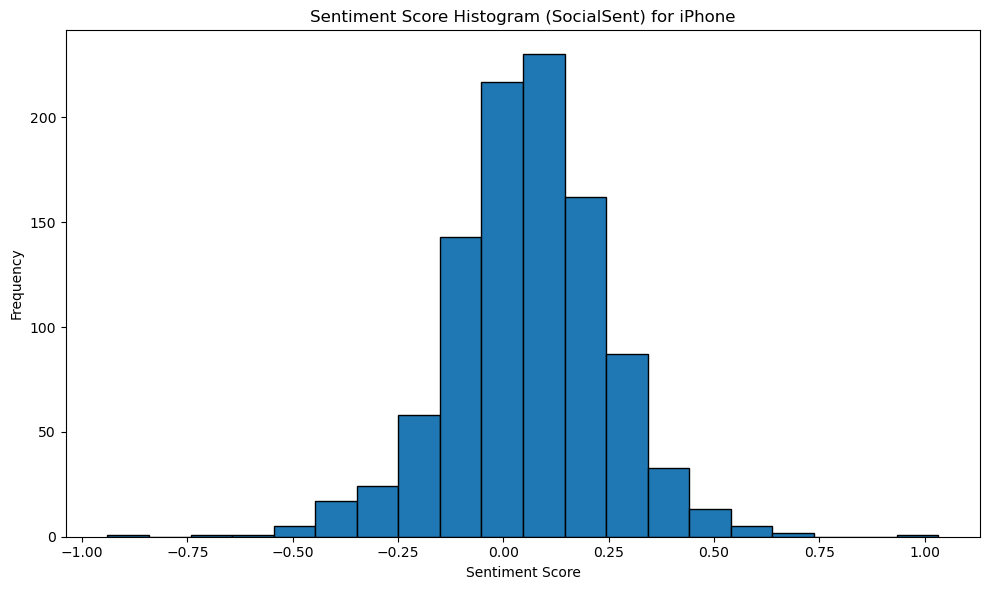

In [210]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [213]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 This isn't apple sucks. They discounted the latest iphone by $100. How nice of them!
---------------------------------------------------------------------------------------------------
1 Every year iPhones have to return to their place of birth for an annual celebration
---------------------------------------------------------------------------------------------------
2 I was a diehard Android user from the HTC incredible all the way through a Galaxy Edge.  I switched to an iPhone 11 Pro when the Galaxy was underwhelming that year and…I absolutely prefer the iPhone.  Yes the Apple ecosystem is a walled garden but for me at least it’s a pretty nice garden.
---------------------------------------------------------------------------------------------------
3 You say it’s looking more like android but I see more customizations. I’m glad iPhone is more customizable for the user
---------------------------------------------------------------------------------------------------
4 Two of my 

In [215]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Are they fucking stupid tell me there fucking stupid the iPhone fixes stability after the video is done you smartass
---------------------------------------------------------------------------------------------------
1 That is one ugly phone.

Bring back the smoothed bezel of the iPhone 7/8 that the 11 had.
---------------------------------------------------------------------------------------------------
2 The new iphones are very boring and iterative. I'm not surprised growth is slowing.
---------------------------------------------------------------------------------------------------
3 Wouldn’t it be just as cheap for iPhones to be made in Mexico or another Latin America country? Serious question…
---------------------------------------------------------------------------------------------------
4 Shenzhen is like the elephant graveyard.  Your iPhone was probably sick and just went home to die.
--------------------------------------------------------------------------------------

In [216]:
# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_iphone


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1686458130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  The new iphones are very boring and iterative....   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  The new phone are very boring and operative . ...      83   
4996  iphone X . I miss those rounded edges so much ...      83   
4997  He sitting here with my iPhone [ SIZE ] and so...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  Very year iPhones have to return to their plac...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      1   
4001  [took, fucking, stand, apple, product, pp, guy...      2   
4002  [worked, apple, decade, including, long, stint...      2   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      4   
...                                                 ...    ...   
4995  [new, phone, boring, operative, surprised, gro...      1   
4996  [iphone, x, miss, rounded, edge, much, feel, c...      4   
4997  [sitting, iphone, size, popcorn, watching, dra...      4   
4998  [yes, work, phone, shop, never, see, burn, iph...      2   
4999  [year, iphones, return, place, birth, annual, ...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.6644                Negative                Negative   
4996                0.7809                Positive                Positive   
4997                0.0000                 Neutral                 Neutral   
4998                0.7003                Positive                Negative   
4999                0.0000          

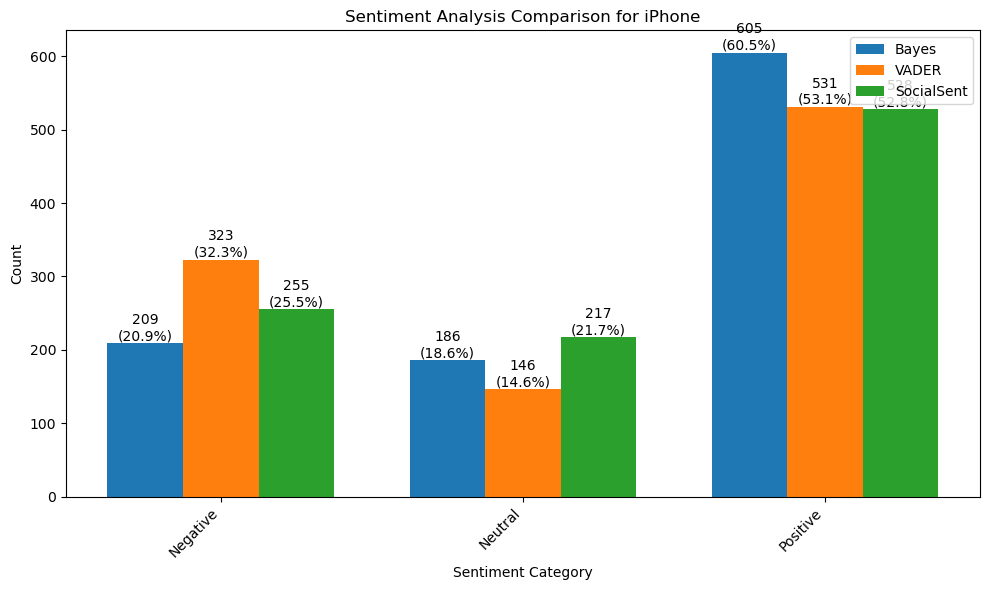

In [250]:
vader_counts = df_iphone['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_iphone['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_iphone['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPhone')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.2. Macbook***

In [220]:
df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2924118264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  I thought they learned the lesson when they de...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2997  Macbook  Honestly, my M1 Macbook Pro is simply perfect....   
2998  Macbook  IT manager here - this is not even close to th...   
2999  Macbook  Hate MacBook batteries when they do this! Just...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  thought learned lesson decided remove touch ba...   
2996  laughed size macbook pro throttle 800mhz size ...   
2997  honestly macbook fro simply perfect see reason...   
2998  manager even close stupidest thing seen done m...   
2999  late macbook battery must paid size old sac ba...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  I thought they learned the lesson when they de...      92   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92   
2997  Honestly , my Of Macbook Fro is simply perfect...      92   
2998  of manager here - this is not even close to th...      92   
2999  Late MacBook batteries when they do this ! Mus...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      3   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      3   
2004  [gun, currently, use, kandji, mmm, server, lin...      1   
...                                                 ...    ...   
2995  [thought, learned, lesson, decided, remove, to...      3   
2996  [laughed, size, macbook, pro, throttle, 800mhz...      0   
2997  [honestly, macbook, fro, simply, perfect, see,...      1   
2998  [manager, even, close, stupidest, thing, seen,...      3   
2999  [late, macbook, battery, must, paid, size, old...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Positive   
2996                0.4588                Positive                Negative   
2997                0.7717                Positive                Positive   
2998               -0.5267                Negative                Negative   
2999                0.000

In [221]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [222]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 MacBook 12 was absolutely beautiful. 

If they repeat it with MagSafe+USB-C that would be my next MacBook for sure.
---------------------------------------------------------------------------------------------------
1 Good for Linus. I'm happy for him. Great. That's great. So cool. Oh my God he uses a MacBook, woah that's cool. Okay cool. Yeah. Whatever, next :)
---------------------------------------------------------------------------------------------------
2 Surprisingly enough that's a feature of the MacBook, I think it has an infrared sensor on the top
---------------------------------------------------------------------------------------------------
3 Apple sure knows how to design and architecture a CPU.

I have 0 complaints with my M1 Pro MacBook Pro. 😁
---------------------------------------------------------------------------------------------------
4 2012 MacBook Pro, I have one as well, still works great, but sadly can't update to the latest macOS on it.
----------------

In [223]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 After spilling a single shot on my MacBook and it just fucking dying, I know that thing is a goner.


And you know what? I was drunk. That's my excuse. This is just fucking dumb.
---------------------------------------------------------------------------------------------------
1 I have an M1 MacBook Air. I love my M1 MacBook Air. 

I will gladly upgrade to a 15" M2 MacBook "Air".
---------------------------------------------------------------------------------------------------
2 I scrolled past an advertisement for the new MacBook Air and this was the next post. Peak irony.
---------------------------------------------------------------------------------------------------
3 I love this! Though i bet the battery in the macbook itself is going to suffer being plugged in all the time
---------------------------------------------------------------------------------------------------
4 Finally. I’ve been trying to get my Macbook to crash for years now to no avail… now that I can install

In [224]:
# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_mac


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2596257996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  I thought they learned the lesson when they de...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2997  Macbook  Honestly, my M1 Macbook Pro is simply perfect....   
2998  Macbook  IT manager here - this is not even close to th...   
2999  Macbook  Hate MacBook batteries when they do this! Just...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  thought learned lesson decided remove touch ba...   
2996  laughed size macbook pro throttle 800mhz size ...   
2997  honestly macbook fro simply perfect see reason...   
2998  manager even close stupidest thing seen done m...   
2999  late macbook battery must paid size old sac ba...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  I thought they learned the lesson when they de...      92   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92   
2997  Honestly , my Of Macbook Fro is simply perfect...      92   
2998  of manager here - this is not even close to th...      92   
2999  Late MacBook batteries when they do this ! Mus...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      3   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      3   
2004  [gun, currently, use, kandji, mmm, server, lin...      1   
...                                                 ...    ...   
2995  [thought, learned, lesson, decided, remove, to...      3   
2996  [laughed, size, macbook, pro, throttle, 800mhz...      0   
2997  [honestly, macbook, fro, simply, perfect, see,...      1   
2998  [manager, even, close, stupidest, thing, seen,...      3   
2999  [late, macbook, battery, must, paid, size, old...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Positive   
2996                0.4588                Positive                Negative   
2997                0.7717                Positive                Positive   
2998               -0.5267                Negative                Negative   
2999                0.000

In [249]:
vader_counts = df_mac['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_mac['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_mac['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Macbook')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.3. iPad***

In [226]:
df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1361102979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      1   
3001  [say, disagree, pretty, whole, heartily, artic...      3   
3002  [love, ipad, fro, size, reactor, property, man...      3   
3003  [bad, product, bad, price, techtuber, heard, p...      3   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      0   
3996  [result, yelled, grounded, video, game, new, i...      4   
3997  [beyond, impressed, mine, older, get, le, use,...      0   
3998  [got, ipad, size, fro, since, size, besides, s...      0   
3999  [exact, thing, happen, month, back, order, exa...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

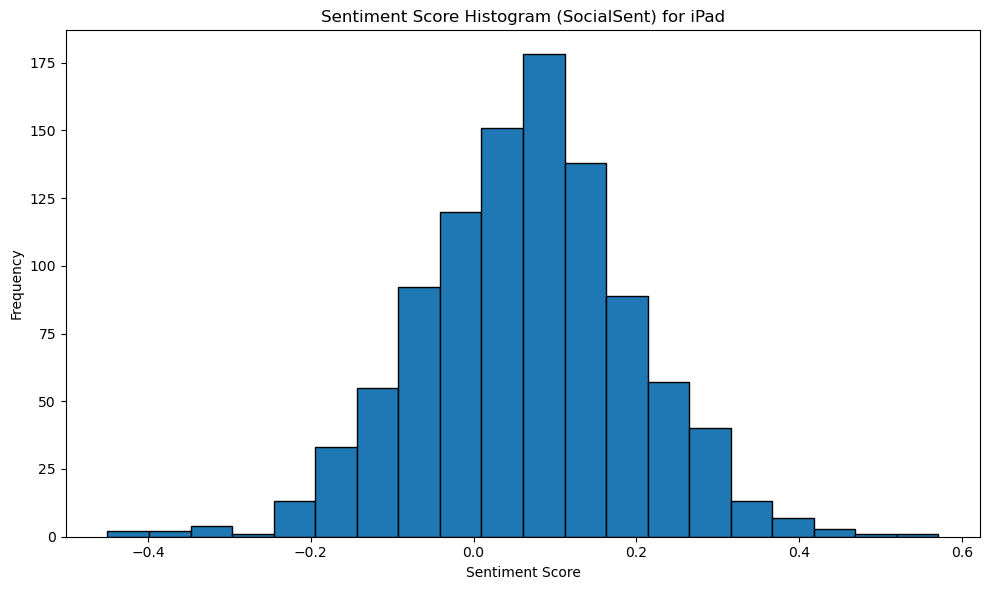

In [227]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [228]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 So here’s the deal from a previous bride…..  wedding dresses have to be ordered most of the time.  They usually don’t do alterations until the dress is paid in full.  The wedding is in three months, so the dress should already be ordered.  A new iPad is what 500 dollarsish?  My whole wedding dress was $500.00 and it was beautiful…. Not a designer dress. But beautiful.  A wedding dress does not have to be expensive to be gorgeous, and classy.  The Fiancé’s daughter broke the iPad that she was specifically told not to touch.  I feel you were within your rights to buy a new your daughter a new iPad out of your JOINT account.  Not the AH.
---------------------------------------------------------------------------------------------------
1 this will be very welcome.

having resizable windows and more control will be a great bonus, but whats truly holding the ipad back is really the lack of pro apps. it has a pro chip, with some excellent third party apps (photoshop, lumafusion, etc) but i

In [229]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The apps need go get better.   I can do the Lightroom ai noise reduction on my MacBook Air.  But can’t do it on the iPad Pro.  Even though it’s the same chip.  And it’s just as capable as the MacBook Air.   There’s limits to iPad apps.  And that’s what I am tired of.  These days I use my MacBook more than my iPad.
---------------------------------------------------------------------------------------------------
1 Most of the time, misplacing an object isn't that big of a deal. You would just call up the driver or the store where you left it and go pick it up. The driver *stole* her iPad. She's a victim of a crime regardless of the fact that she left it in the car. Your primary focus should be getting the police and Uber involved in this to prevent other people from falling victim to the same person. Also, punishing her for being a victim is the kind of thing that could make her more reluctant to tell you things in the future.
---------------------------------------------------------

In [230]:
# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_ipad


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1972745783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      1   
3001  [say, disagree, pretty, whole, heartily, artic...      3   
3002  [love, ipad, fro, size, reactor, property, man...      3   
3003  [bad, product, bad, price, techtuber, heard, p...      3   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      0   
3996  [result, yelled, grounded, video, game, new, i...      4   
3997  [beyond, impressed, mine, older, get, le, use,...      0   
3998  [got, ipad, size, fro, since, size, besides, s...      0   
3999  [exact, thing, happen, month, back, order, exa...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

In [247]:
vader_counts = df_ipad['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_ipad['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_ipad['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPad')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.4. AirPods***

In [232]:
df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1246500405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      2   
1    [mistake, size, wife, ’, mistake, left, airpod...      2   
2    [wait, person, cared, enough, give, gift, brot...      4   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      3   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      2   
996  [india, airpods, size, many, tax, station, wal...      2   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      3   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

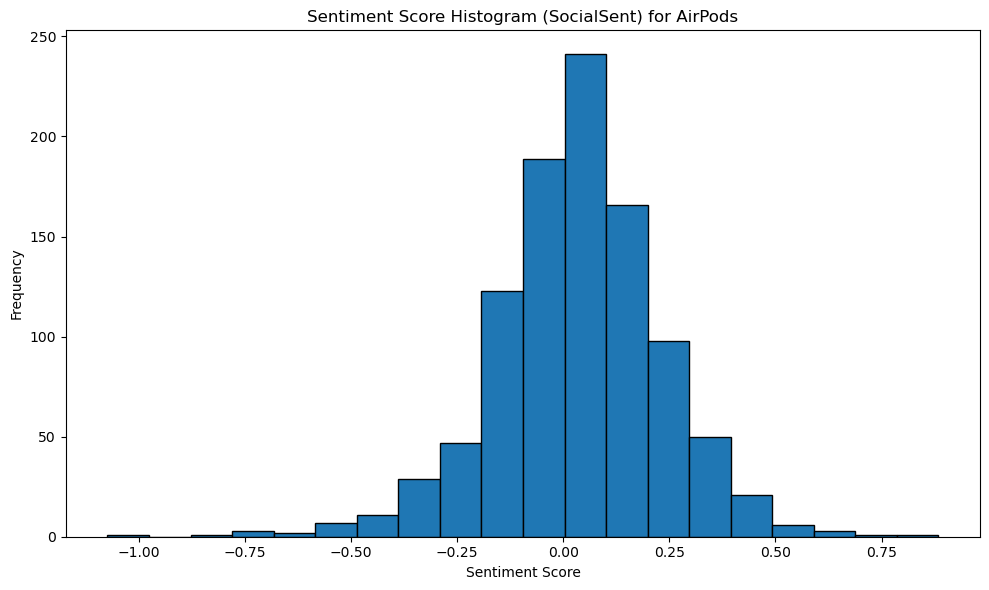

In [233]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [234]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 AirPods cannot connect to iPod classic bc iPod classic uses different Bluetooth connectivity than the AirPods. :)
---------------------------------------------------------------------------------------------------
1 So the 2x improvements are over the detuned ANC and not the original full bore of the Airpods Pro one eh?
---------------------------------------------------------------------------------------------------
2 https://www.glitterbombyourenemies.com.au/product/bag-of-dicks/

Along with a card, "enjoy your airpods, dick"
---------------------------------------------------------------------------------------------------
3 My first gen AirPods are now being used by my mother-in-law and those fit my ears great. My first gen AirPods Pro did not fit my ears, but my partner is using them happily. I would consider getting the third gen AirPods if they get USB-C. 
For people who had first gen and third gen AirPods do you find that they fit about the same?
----------------------------

In [235]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Obviously not her fault. The AirPods are ‘small and stupid’. Yeah, definitely the AirPods fault.
---------------------------------------------------------------------------------------------------
1 Bruh airpods are the ONLY Bluetooth earbuds that dont look fucking ridiculous. This is coming from an Android user. Airpods lowkey fucking slap
---------------------------------------------------------------------------------------------------
2 I don't like sound, so I certainly don't care for Airpods. Steve Jobs would scream, "Get those fucking stupid things out of your ears and pay attention!!"
---------------------------------------------------------------------------------------------------
3 Is it going to fix the noise cancellation of the AirPods Pro 2 that randomly got worse in the few months they’ve been out?
---------------------------------------------------------------------------------------------------
4 This is literally my worst fear. Sometimes my heart will pound while op

In [236]:
# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_airpods


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1346995673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      2   
1    [mistake, size, wife, ’, mistake, left, airpod...      2   
2    [wait, person, cared, enough, give, gift, brot...      4   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      3   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      2   
996  [india, airpods, size, many, tax, station, wal...      2   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      3   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

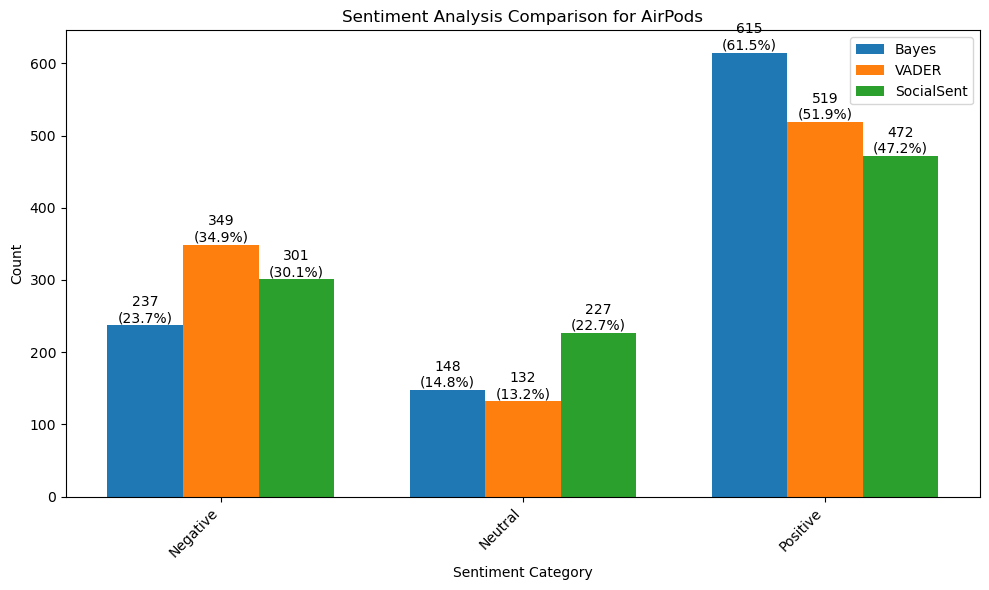

In [246]:
vader_counts = df_airpods['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_airpods['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_airpods['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for AirPods')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.5. Apple Watch***

In [238]:
df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3320060839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      0   
1001  [honestly, difficult, answer, never, really, s...      2   
1002  [smart, watch, enthusiast, using, smart, watch...      0   
1003  [discovered, year, insomnia, long, time, ackno...      1   
1004  [aimed, engineer, boy, got, several, problem, ...      0   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      1   
1996  [generally, apple, watch, battery, life, low, ...      1   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      4   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

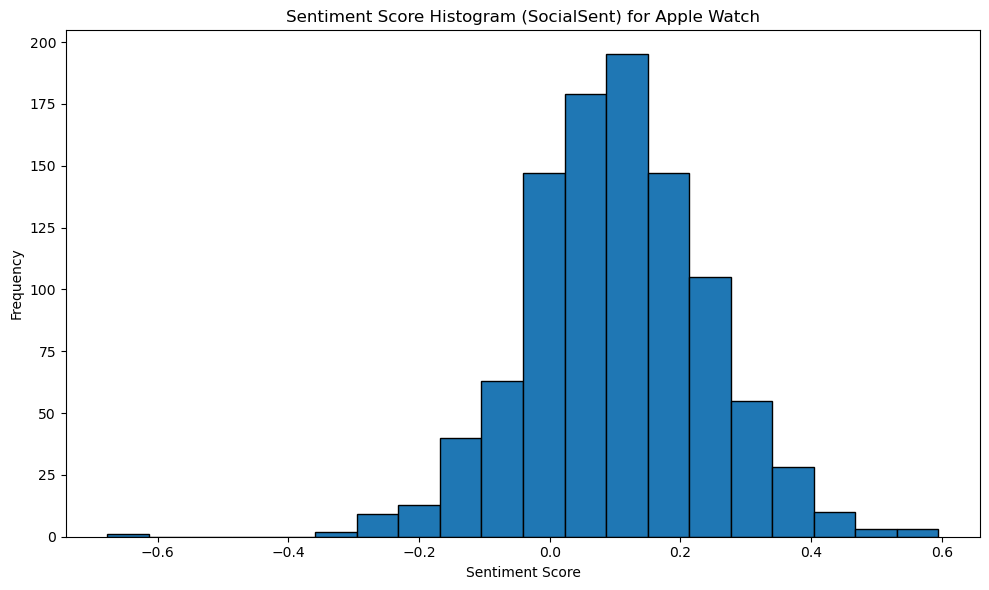

In [239]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [240]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 She just wears the apple watch when you are around to show she is appreciate for the gift. Im sure the wrist computer comes off as soon as you leave so she can be at peace with her rollie
---------------------------------------------------------------------------------------------------
1 Hopefully this is opt-out-able. I have an Apple Watch so don’t need this and don’t want it as it is unquestionably less secure than a full face unlock. 

Great to have the option, but I hope it’s just that - an option that can be enabled/disabled.
---------------------------------------------------------------------------------------------------
2 Pretty neat project and well executed but Apple Watches in themselves aren't all that fashionable. I bet you could come up with a really interesting square / rectangular watch design.
---------------------------------------------------------------------------------------------------
3 My grandfather had on a Rolex and Apple Watch for Christmas Eve. He had 

In [241]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 They're awful. A watch is first and foremost a piece of jewelry and Apple watches are ugly and nerdy looking. Unreal how many people in here are disagreeing with you, what a tragic downfall this sub has had
---------------------------------------------------------------------------------------------------
1 I’ve had several aluminum Apple Watches, and have never used an external case on them. Yes, aluminum is softer and more susceptible to damage, but I’ve never had any major damage. I’ve always been able to sell mine for $250-$300 when they’re 2 years old. The worst damage I’ve ever had was from hitting a door jamb, and it was a minor scratch to the case.
---------------------------------------------------------------------------------------------------
2 The Apple Watches are water resistant however if your device is liquid damage, you’ll have to pay for the service. It’s in the terms and conditions that liquid damage isn’t covered.
-------------------------------------------------

In [242]:
# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_watch


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/4099690096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      0   
1001  [honestly, difficult, answer, never, really, s...      2   
1002  [smart, watch, enthusiast, using, smart, watch...      0   
1003  [discovered, year, insomnia, long, time, ackno...      1   
1004  [aimed, engineer, boy, got, several, problem, ...      0   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      1   
1996  [generally, apple, watch, battery, life, low, ...      1   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      4   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

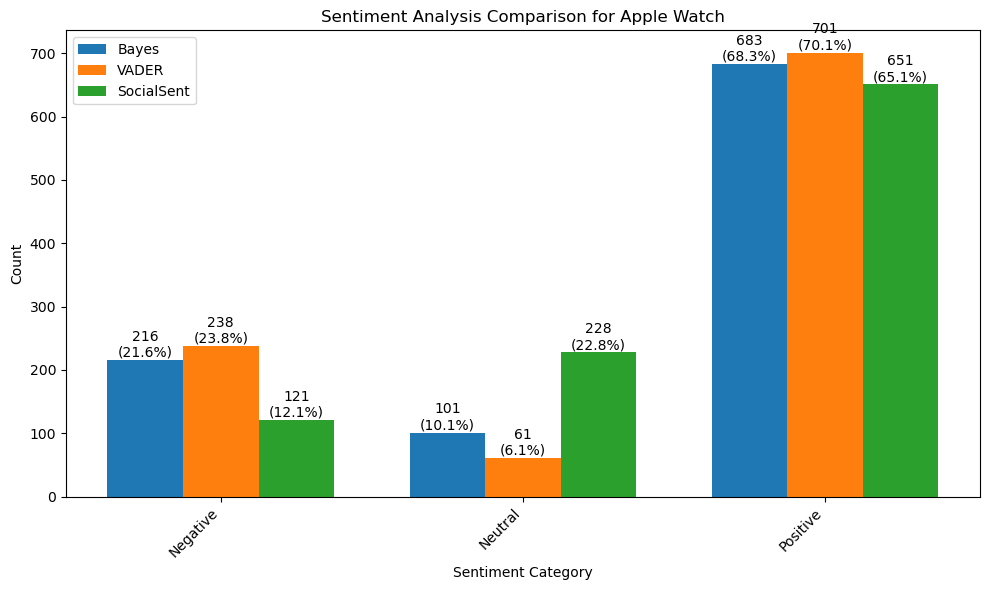

In [245]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_watch' already loaded with the necessary data
# vader_counts = df_watch['SentimentCategory_VADER'].value_counts()
# social_sent_counts = df_watch['SentimentCategory_SocialSent'].value_counts()
# bayes_counts = df_watch['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Apple Watch')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**28. Sentiment analysis with machine learning**

***28.1. iPhone***

In [251]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

def preprocess(row):
    text = row["Sentiment_Comment"].lower()
    keep = []
    for word in text.split():
        if word in stopwords:
            continue
        if word.startswith("@"):
            continue
        if word.startswith("http"):
            continue
        if word.startswith("#"):
            continue
        if word == "follow":
            continue
        if len(word) <= 1:
            continue
        keep.append(word)
    return ' '.join(keep)

df_iphone["cleaned_text"] = df_iphone.apply(preprocess, axis=1)
df_iphone

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/727507324.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone["cleaned_text"] = df_iphone.apply(preprocess, axis=1)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  The new iphones are very boring and iterative....   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  The new phone are very boring and operative . ...      83   
4996  iphone X . I miss those rounded edges so much ...      83   
4997  He sitting here with my iPhone [ SIZE ] and so...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  Very year iPhones have to return to their plac...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      1   
4001  [took, fucking, stand, apple, product, pp, guy...      2   
4002  [worked, apple, decade, including, long, stint...      2   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      4   
...                                                 ...    ...   
4995  [new, phone, boring, operative, surprised, gro...      1   
4996  [iphone, x, miss, rounded, edge, much, feel, c...      4   
4997  [sitting, iphone, size, popcorn, watching, dra...      4   
4998  [yes, work, phone, shop, never, see, burn, iph...      2   
4999  [year, iphones, return, place, birth, annual, ...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.6644                Negative                Negative   
4996                0.7809                Positive                Positive   
4997                0.0000                 Neutral                 Neutral   
4998                0.7003                Positive                Negative   
4999                0.0000          

In [256]:
from textblob.classifiers import NaiveBayesClassifier

train = df_iphone[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.405
Sentiment: Positive


In [257]:
train = df_iphone[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.505
Sentiment: Positive


In [258]:
train = df_iphone[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.605
Sentiment: Positive


***28.2. Macbook***

In [259]:
df_mac["cleaned_text"] = df_mac.apply(preprocess, axis=1)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2514806661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac["cleaned_text"] = df_mac.apply(preprocess, axis=1)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  I thought they learned the lesson when they de...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2997  Macbook  Honestly, my M1 Macbook Pro is simply perfect....   
2998  Macbook  IT manager here - this is not even close to th...   
2999  Macbook  Hate MacBook batteries when they do this! Just...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  thought learned lesson decided remove touch ba...   
2996  laughed size macbook pro throttle 800mhz size ...   
2997  honestly macbook fro simply perfect see reason...   
2998  manager even close stupidest thing seen done m...   
2999  late macbook battery must paid size old sac ba...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  I thought they learned the lesson when they de...      92   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92   
2997  Honestly , my Of Macbook Fro is simply perfect...      92   
2998  of manager here - this is not even close to th...      92   
2999  Late MacBook batteries when they do this ! Mus...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      3   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      3   
2004  [gun, currently, use, kandji, mmm, server, lin...      1   
...                                                 ...    ...   
2995  [thought, learned, lesson, decided, remove, to...      3   
2996  [laughed, size, macbook, pro, throttle, 800mhz...      0   
2997  [honestly, macbook, fro, simply, perfect, see,...      1   
2998  [manager, even, close, stupidest, thing, seen,...      3   
2999  [late, macbook, battery, must, paid, size, old...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Positive   
2996                0.4588                Positive                Negative   
2997                0.7717                Positive                Positive   
2998               -0.5267                Negative                Negative   
2999                0.000

In [260]:
from textblob.classifiers import NaiveBayesClassifier

train = df_mac[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.525
Sentiment: Positive


In [261]:
train = df_mac[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.565
Sentiment: Positive


In [262]:
train = df_mac[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.535
Sentiment: Positive


***28.3. iPad***

In [263]:
df_ipad["cleaned_text"] = df_ipad.apply(preprocess, axis=1)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2405490805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad["cleaned_text"] = df_ipad.apply(preprocess, axis=1)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      1   
3001  [say, disagree, pretty, whole, heartily, artic...      3   
3002  [love, ipad, fro, size, reactor, property, man...      3   
3003  [bad, product, bad, price, techtuber, heard, p...      3   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      0   
3996  [result, yelled, grounded, video, game, new, i...      4   
3997  [beyond, impressed, mine, older, get, le, use,...      0   
3998  [got, ipad, size, fro, since, size, besides, s...      0   
3999  [exact, thing, happen, month, back, order, exa...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

In [264]:
from textblob.classifiers import NaiveBayesClassifier

train = df_ipad[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.705
Sentiment: Positive


In [265]:
train = df_ipad[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.76
Sentiment: Positive


In [266]:
train = df_ipad[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.58
Sentiment: Positive


***28.4. AirPods***

In [267]:
df_airpods["cleaned_text"] = df_airpods.apply(preprocess, axis=1)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/191238021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods["cleaned_text"] = df_airpods.apply(preprocess, axis=1)


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      2   
1    [mistake, size, wife, ’, mistake, left, airpod...      2   
2    [wait, person, cared, enough, give, gift, brot...      4   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      3   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      2   
996  [india, airpods, size, many, tax, station, wal...      2   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      3   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

In [268]:
from textblob.classifiers import NaiveBayesClassifier

train = df_airpods[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.52
Sentiment: Positive


In [269]:
train = df_airpods[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.495
Sentiment: Positive


In [270]:
train = df_airpods[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.575
Sentiment: Positive


***28.5. Apple Watch***

In [271]:
df_watch["cleaned_text"] = df_watch.apply(preprocess, axis=1)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1607139720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch["cleaned_text"] = df_watch.apply(preprocess, axis=1)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      0   
1001  [honestly, difficult, answer, never, really, s...      2   
1002  [smart, watch, enthusiast, using, smart, watch...      0   
1003  [discovered, year, insomnia, long, time, ackno...      1   
1004  [aimed, engineer, boy, got, several, problem, ...      0   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      1   
1996  [generally, apple, watch, battery, life, low, ...      1   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      4   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

In [272]:
from textblob.classifiers import NaiveBayesClassifier

train = df_watch[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with VADER: 0.605
Sentiment: Positive


In [273]:
train = df_watch[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with Bayes: 0.62
Sentiment: Positive


In [274]:
train = df_watch[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


Accuracy with SocialSent: 0.685
Sentiment: Positive


**29. Emotion analysis**

***29.1. iPhone***

In [277]:
from LeXmo import LeXmo

def calculate_emotion(text):
    emo = LeXmo.LeXmo(text)
    emo.pop('text')
    emo.pop('negative')
    emo.pop('positive')
    max_value = max(emo.values())
    max_keys = [key for key, value in emo.items() if value == max_value]
    return " ".join(max_keys)

df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1492879640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  The new iphones are very boring and iterative....   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  The new phone are very boring and operative . ...      83   
4996  iphone X . I miss those rounded edges so much ...      83   
4997  He sitting here with my iPhone [ SIZE ] and so...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  Very year iPhones have to return to their plac...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      1   
4001  [took, fucking, stand, apple, product, pp, guy...      2   
4002  [worked, apple, decade, including, long, stint...      2   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      4   
...                                                 ...    ...   
4995  [new, phone, boring, operative, surprised, gro...      1   
4996  [iphone, x, miss, rounded, edge, much, feel, c...      4   
4997  [sitting, iphone, size, popcorn, watching, dra...      4   
4998  [yes, work, phone, shop, never, see, burn, iph...      2   
4999  [year, iphones, return, place, birth, annual, ...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.6644                Negative                Negative   
4996                0.7809                Positive                Positive   
4997                0.0000                 Neutral                 Neutral   
4998                0.7003                Positive                Negative   
4999                0.0000          

In [278]:
df_iphone[['Comment','Emotion']]

Comment  \
4000  #**Stop personal photos and videos from poppin...   
4001  Look, I can't fucking stand Apple products. I'...   
4002  I worked for Apple for most of a decade, inclu...   
4003  I have the flip, literally writing this commen...   
4004  I switched to iPhone last year after trying an...   
...                                                 ...   
4995  The new iphones are very boring and iterative....   
4996  iphone X. I miss those rounded edges so much, ...   
4997  Me sitting here with my iPhone 8 and some popc...   
4998  Yes lol, work in a phone shop and NEVER see bu...   
4999  Every year iPhones have to return to their pla...   

                                                Emotion  
4000                                               fear  
4001                                            sadness  
4002                                       fear sadness  
4003                                       anticipation  
4004                                              trust  
...                                                 ...  
4995  anger anticipation disgust fear joy sadness su...  
4996                             anticipation joy trust  
4997                                  anticipation fear  
4998                             anticipation joy trust  
4999                        anticipation fear joy trust  

[1000 rows x 2 columns]

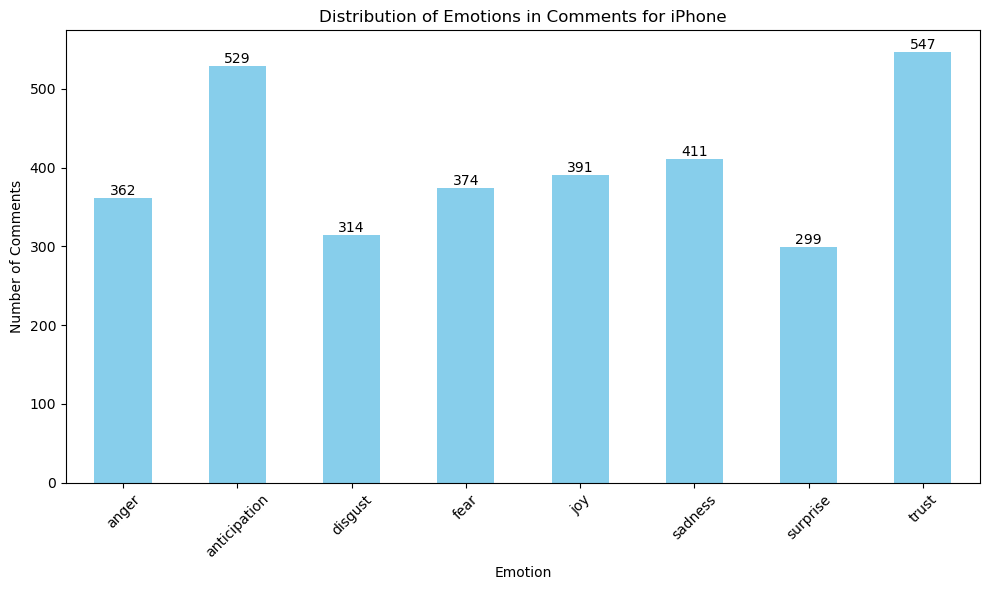

In [295]:
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_iphone.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPhone')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


***29.2. Macbook***

In [280]:
df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/1581698278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  I thought they learned the lesson when they de...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2997  Macbook  Honestly, my M1 Macbook Pro is simply perfect....   
2998  Macbook  IT manager here - this is not even close to th...   
2999  Macbook  Hate MacBook batteries when they do this! Just...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  thought learned lesson decided remove touch ba...   
2996  laughed size macbook pro throttle 800mhz size ...   
2997  honestly macbook fro simply perfect see reason...   
2998  manager even close stupidest thing seen done m...   
2999  late macbook battery must paid size old sac ba...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  I thought they learned the lesson when they de...      92   
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92   
2997  Honestly , my Of Macbook Fro is simply perfect...      92   
2998  of manager here - this is not even close to th...      92   
2999  Late MacBook batteries when they do this ! Mus...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      3   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      3   
2004  [gun, currently, use, kandji, mmm, server, lin...      1   
...                                                 ...    ...   
2995  [thought, learned, lesson, decided, remove, to...      3   
2996  [laughed, size, macbook, pro, throttle, 800mhz...      0   
2997  [honestly, macbook, fro, simply, perfect, see,...      1   
2998  [manager, even, close, stupidest, thing, seen,...      3   
2999  [late, macbook, battery, must, paid, size, old...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Positive   
2996                0.4588                Positive                Negative   
2997                0.7717                Positive                Positive   
2998               -0.5267                Negative                Negative   
2999                0.000

In [281]:
df_mac[['Comment','Emotion']]

Comment  \
2000  >is the M2 that much better than the M1? \n\nI...   
2001  Feeling electricity or a mild electrical sensa...   
2002  Weight is a big deal. Don’t you want to take i...   
2003  The hardware "build quality" everybody raves a...   
2004  Hi guys. IT here. We currently use Kandji as o...   
...                                                 ...   
2995  I thought they learned the lesson when they de...   
2996  \*laughes as my 2018 macbook pro throttles dow...   
2997  Honestly, my M1 Macbook Pro is simply perfect....   
2998  IT manager here - this is not even close to th...   
2999  Hate MacBook batteries when they do this! Just...   

                                                Emotion  
2000                                              trust  
2001                                              trust  
2002                                       anticipation  
2003                                              trust  
2004                                              trust  
...                                                 ...  
2995                                       anticipation  
2996                                           surprise  
2997                                          joy trust  
2998  anger anticipation disgust fear joy sadness su...  
2999                                            sadness  

[1000 rows x 2 columns]

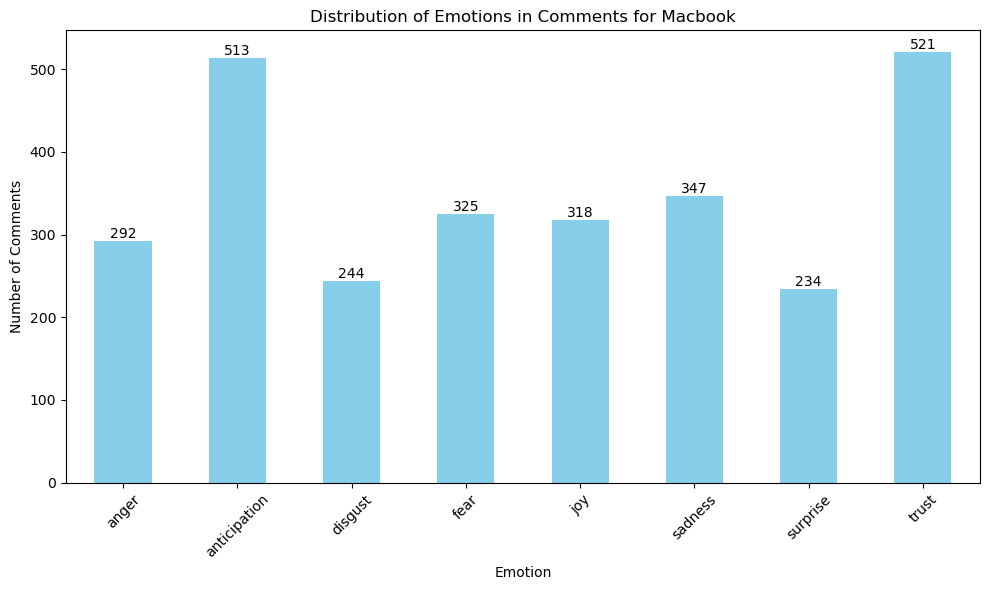

In [297]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_mac.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Macbook')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.3. iPad***

In [283]:
df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/3321922518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      1   
3001  [say, disagree, pretty, whole, heartily, artic...      3   
3002  [love, ipad, fro, size, reactor, property, man...      3   
3003  [bad, product, bad, price, techtuber, heard, p...      3   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      0   
3996  [result, yelled, grounded, video, game, new, i...      4   
3997  [beyond, impressed, mine, older, get, le, use,...      0   
3998  [got, ipad, size, fro, since, size, besides, s...      0   
3999  [exact, thing, happen, month, back, order, exa...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

In [284]:
df_ipad[['Comment','Emotion']]

Comment        Emotion
3000  Caught him in 8K UHD surround sound 16 Gigs ra...          trust
3001  Gotta say, I disagree pretty whole-heartedly w...          trust
3002  Love my M1 iPad Pro 11. I am a Realtor and Pro...   anticipation
3003  **"There's no bad product, just bad prices"-Te...   fear sadness
3004  I think you answered your own question. If pun...   anticipation
...                                                 ...            ...
3995  If you moderately push on the right side of th...   anticipation
3996  Result: Yelled at / grounded / no video games ...   anticipation
3997  I’m beyond impressed with mine. The older i ge...  sadness trust
3998  I've got my iPad 10.5" Pro since 2018 and, bes...   anticipation
3999  I had this exact same thing happen to me a few...   anticipation

[1000 rows x 2 columns]

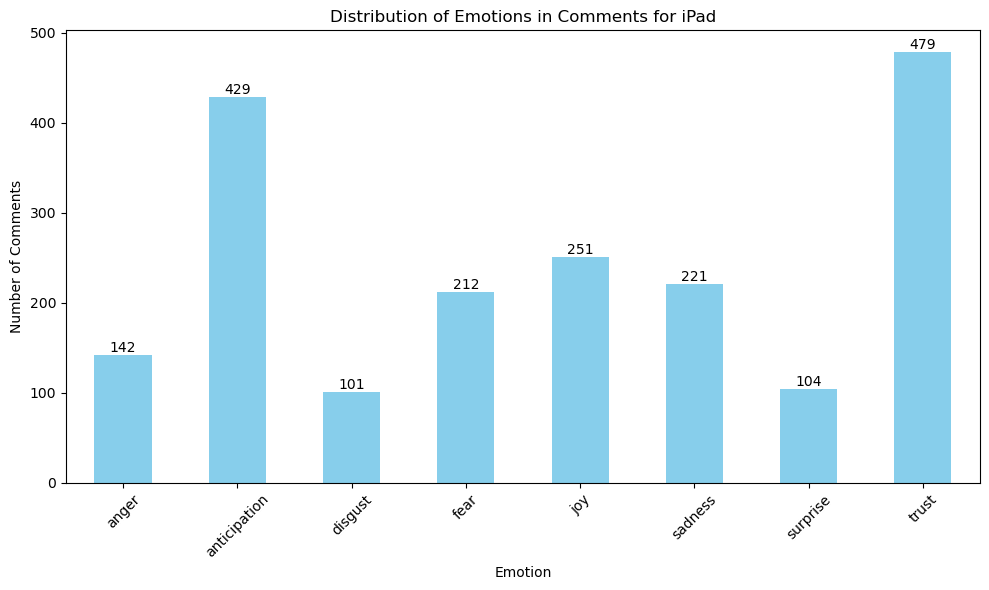

In [298]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_ipad.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPad')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.4. AirPods***

In [286]:
df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/2632544429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      2   
1    [mistake, size, wife, ’, mistake, left, airpod...      2   
2    [wait, person, cared, enough, give, gift, brot...      4   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      3   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      2   
996  [india, airpods, size, many, tax, station, wal...      2   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      3   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

In [287]:
df_airpods[['Comment','Emotion']]

Comment  \
0    Comparing these to my AirPods Max…\r  \n\r  \n...   
1    This was a mistake. But it’s 99% your wife’s m...   
2    Wait so the only person who cared enough about...   
3    Picked up the Pro gen 2s today as well, migrat...   
4    Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..                                                 ...   
995  You want to ruin your hearing, wear airpods wh...   
996  In india airpods are for 250$ after so many ta...   
997  Just throw on transparency mode and your AirPo...   
998  when i drop it, the airpods always fall out of...   
999  Would love to see the ability to play lossless...   

                                               Emotion  
0                                                trust  
1                                                anger  
2                               anticipation joy trust  
3                                              sadness  
4                                                 fear  
..                                                 ...  
995                                 fear sadness trust  
996                                            sadness  
997  anger anticipation disgust fear joy sadness su...  
998                                            sadness  
999                             anger fear joy sadness  

[1000 rows x 2 columns]

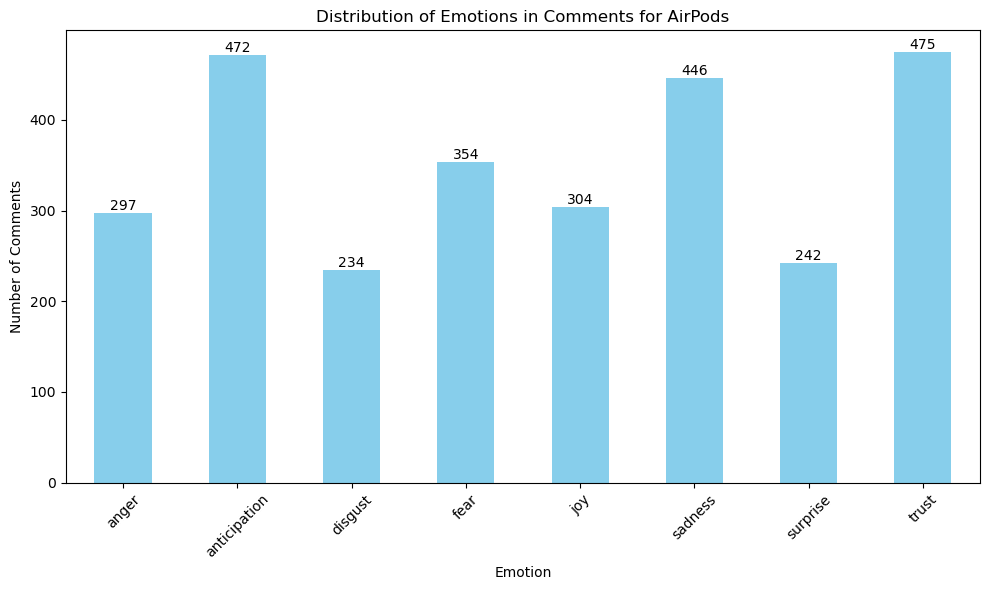

In [300]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_airpods.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for AirPods')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.5. Apple Watch***

In [289]:
df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_56808/164227614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      0   
1001  [honestly, difficult, answer, never, really, s...      2   
1002  [smart, watch, enthusiast, using, smart, watch...      0   
1003  [discovered, year, insomnia, long, time, ackno...      1   
1004  [aimed, engineer, boy, got, several, problem, ...      0   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      1   
1996  [generally, apple, watch, battery, life, low, ...      1   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      4   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

In [290]:
df_watch[['Comment','Emotion']]

Comment            Emotion
1000  At this point it's really a matter of preferen...       anticipation
1001  Honestly, this is difficult to answer. Until n...               fear
1002  Smart watch enthusiast here, I have been using...       anticipation
1003  I discovered this year that I've had insomnia ...       anticipation
1004  Biomed engineer here and boy do I got several ...              trust
...                                                 ...                ...
1995  I love my Apple Watch! When I worked in the ho...       anticipation
1996  Why is generally apple watch battery life so l...  anticipation fear
1997  I’m buying it for the bigger size.\n\nSounds s...               fear
1998  If you want a Apple Watch you don’t have to ba...               fear
1999  Bad take. I work in finance and 80% of the peo...              trust

[1000 rows x 2 columns]

In [301]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_watch.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Apple Watch')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()